In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [32]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

### 아파트 계약년월일 기준 오름차순

In [3]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
data['읍면동구분']=data['시군구'].apply(sort_dong)
def riri(df):
    return int(float(df.replace(',','')))

In [4]:
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]

In [5]:
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'
def year(df):
    return df[:-2]

In [6]:
data['읍면동'].unique()

array(['보람동', '종촌동', '고운동', '아름동', '어진동', '연서면', '조치원읍', '한솔동', '도담동',
       '연동면', '장군면', '나성동', '부강면', '소담동', '금남면', '전의면', '전동면', '소정면',
       '새롬동', '다정동', '대평동', '반곡동', '가람동', '해밀동'], dtype=object)

In [26]:
data

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,"8,600",7,2016,NaN
1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,"27,300",7,2014,NaN
2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN
3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,"30,500",20,2015,NaN
4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,"31,300",6,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23592,202012,31,세종특별자치시 조치원읍 신흥리,398,0,신흥대우푸르지오,126.6976,"50,000",10,2006,NaN
23593,202012,31,세종특별자치시 조치원읍 죽림리,396,0,조치원죽림자이,128.9491,"44,000",2,2008,NaN
23594,202012,31,세종특별자치시 종촌동,656,0,가재마을10단지,84.9365,"73,500",4,2014,NaN
23595,202012,31,세종특별자치시 종촌동,644,0,가재마을6단지,84.6799,"60,000",6,2016,NaN


In [36]:
data['계약년월']=data['계약년월'].astype(str)
#data['계약년']=data['계약년월'].apply(year)
data["평"]=data["전용면적(㎡)"].apply(pyeong)
data['읍면동']=data['시군구'].apply(sort_dong2)
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)

<ipython-input-38-63c372109535>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


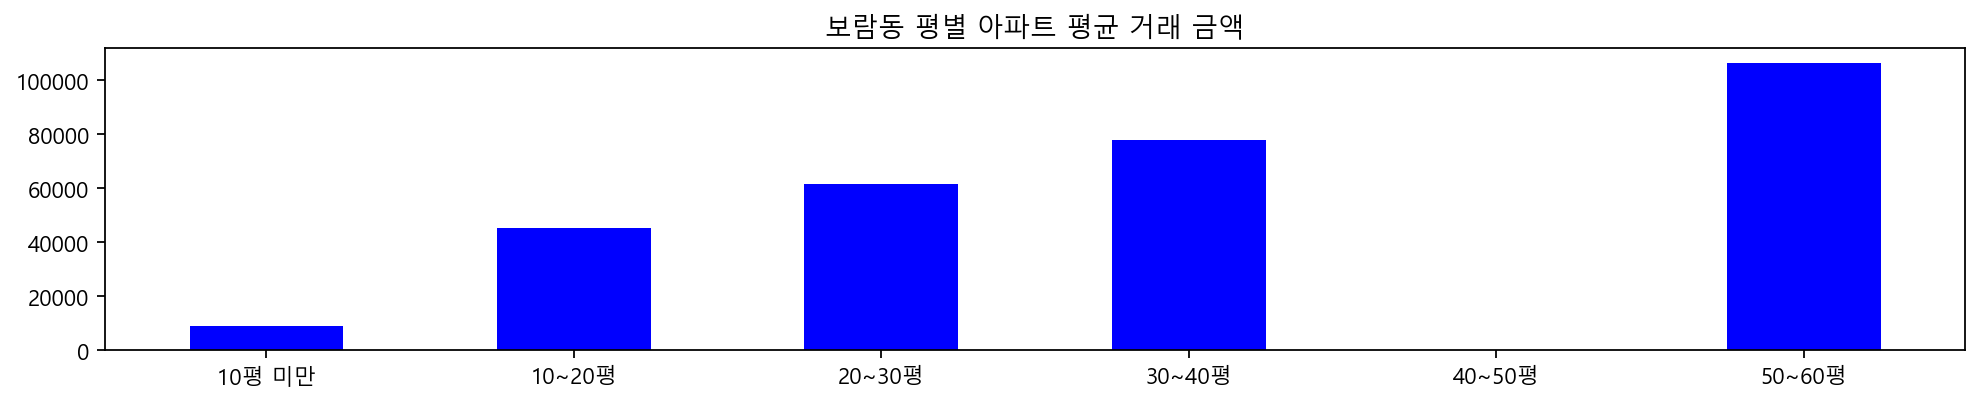

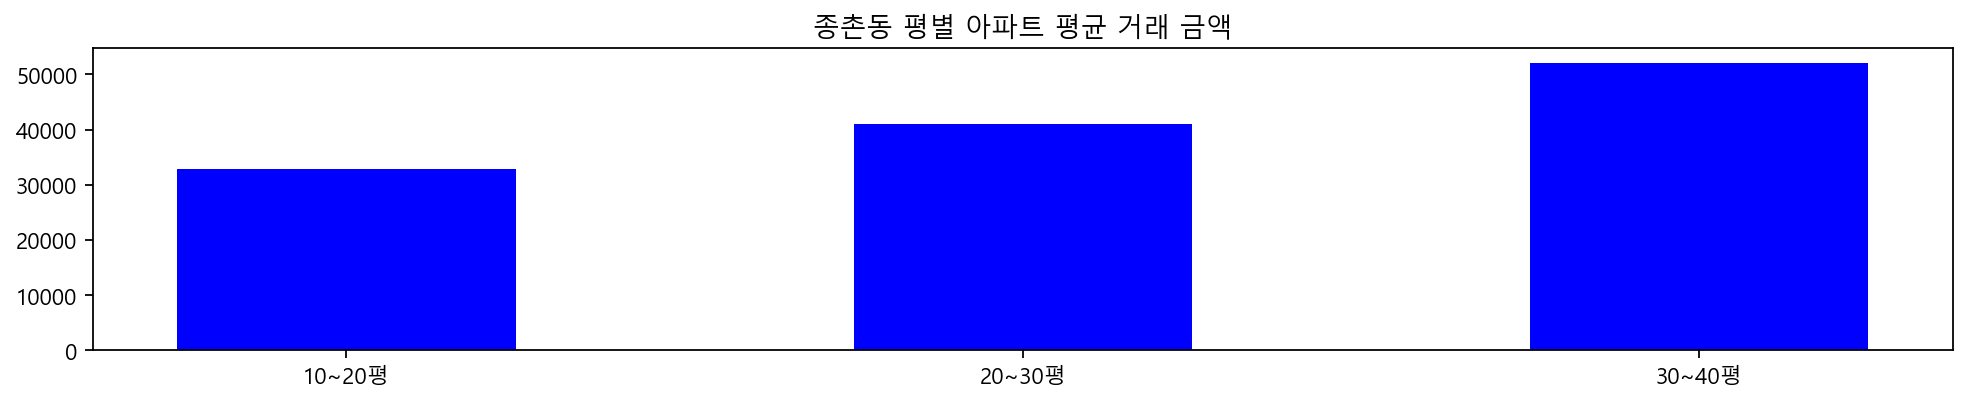

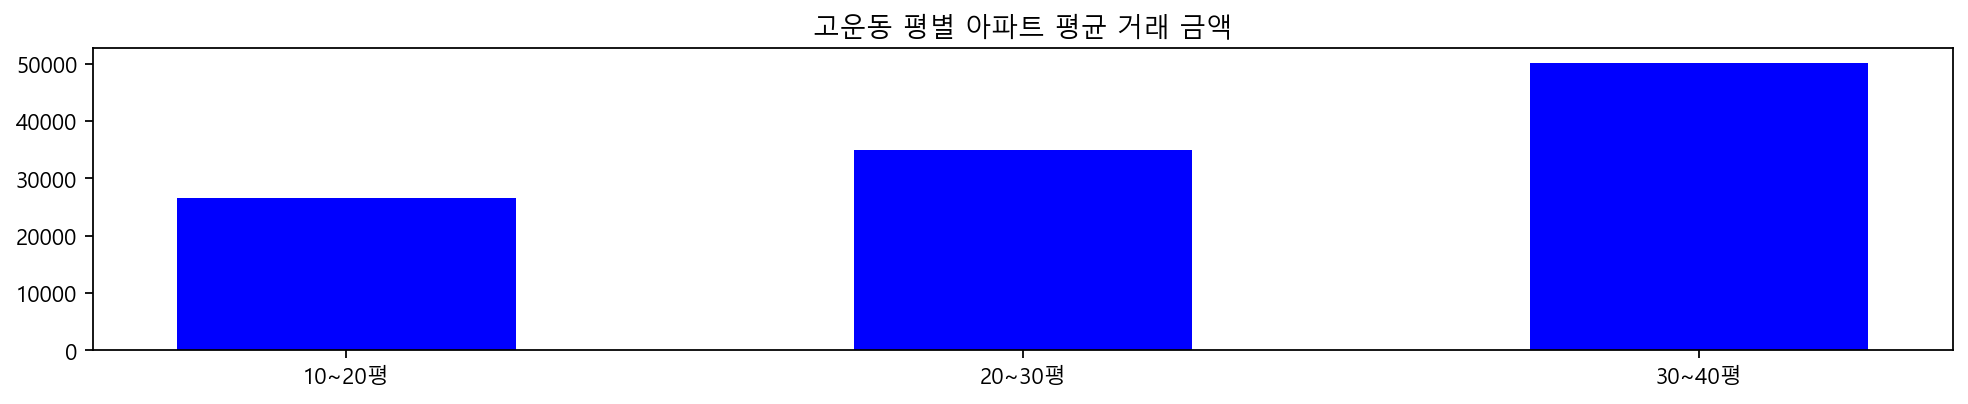

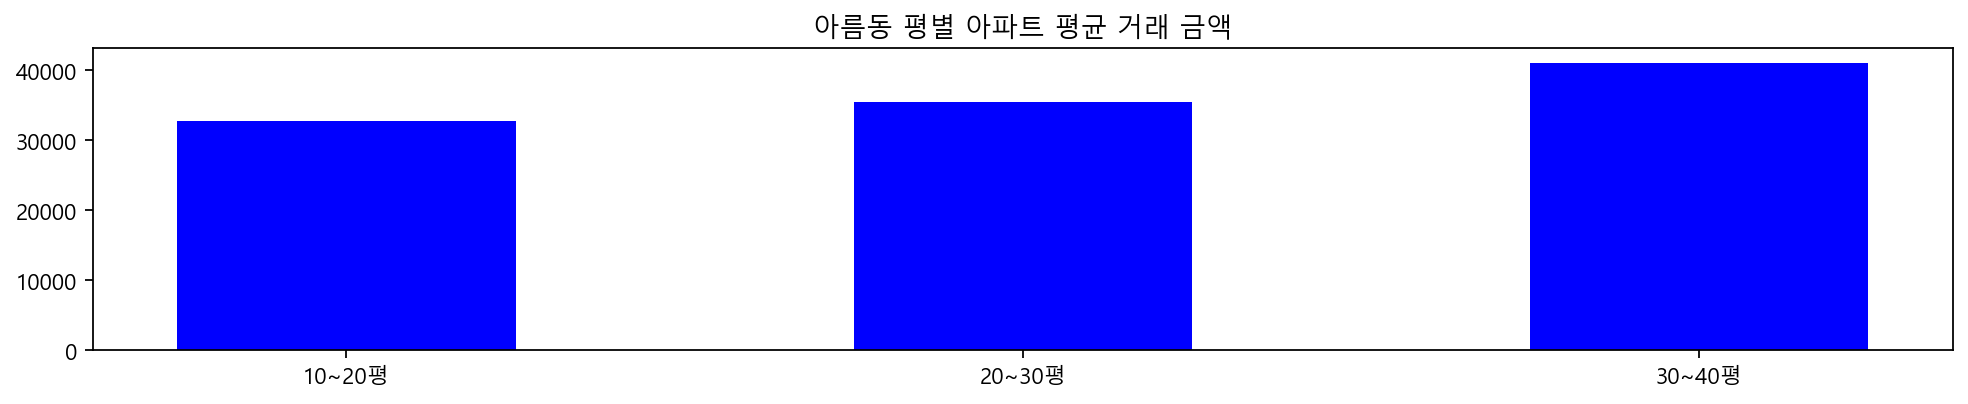

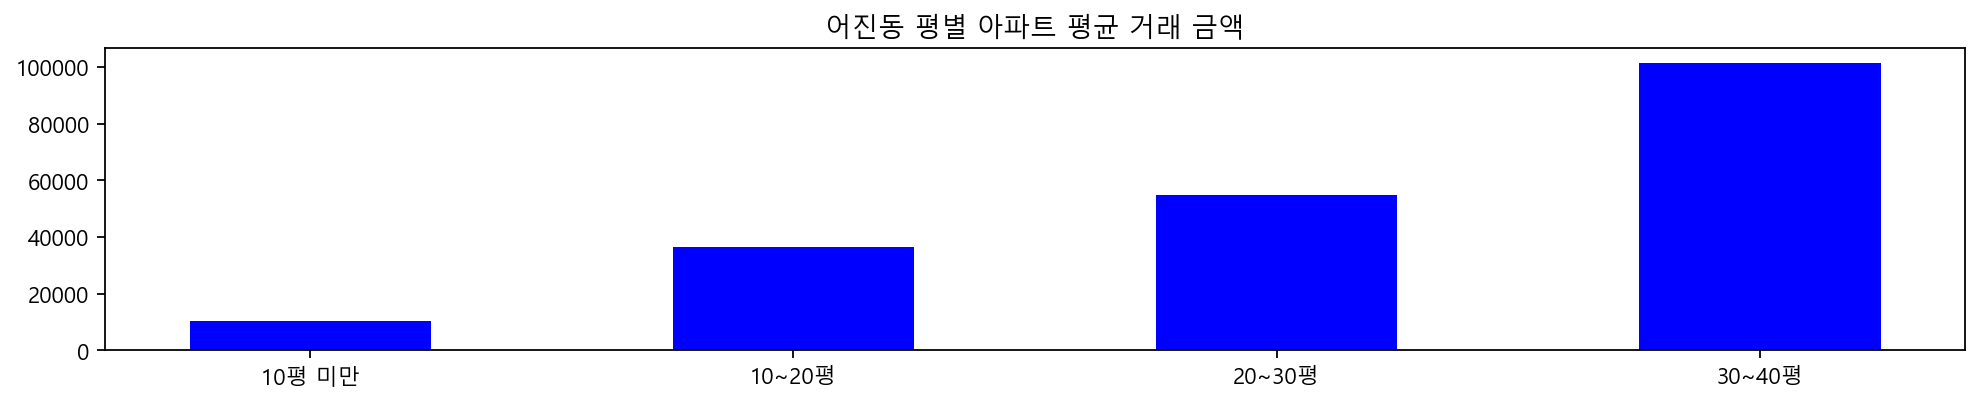

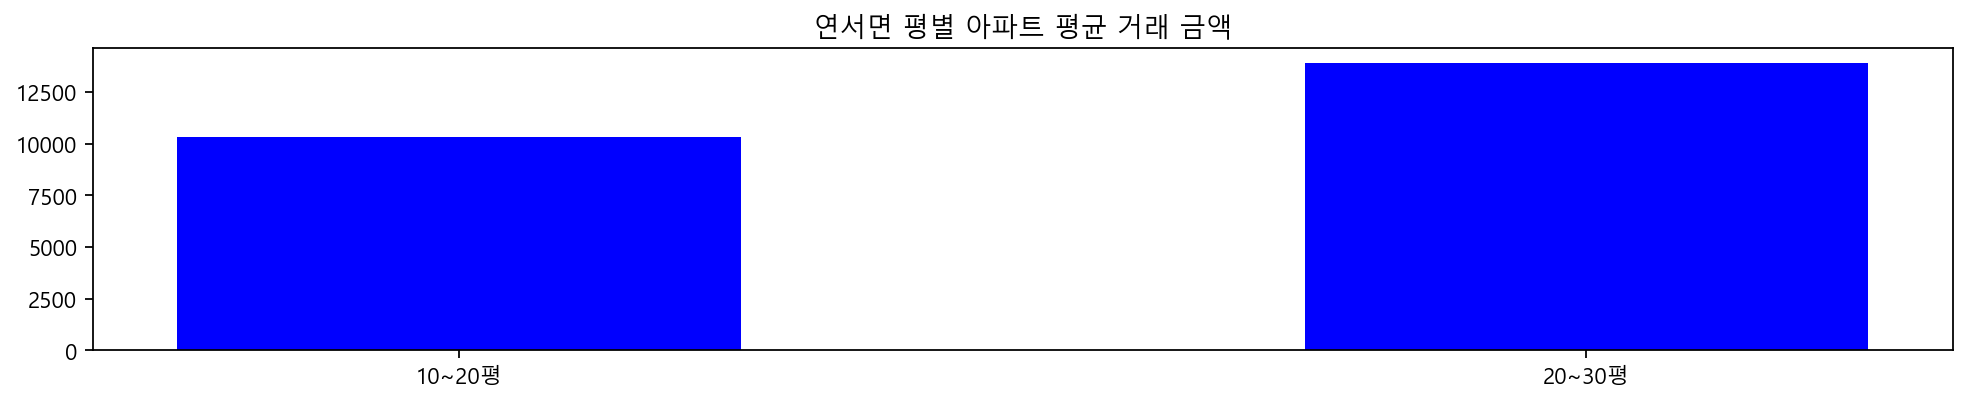

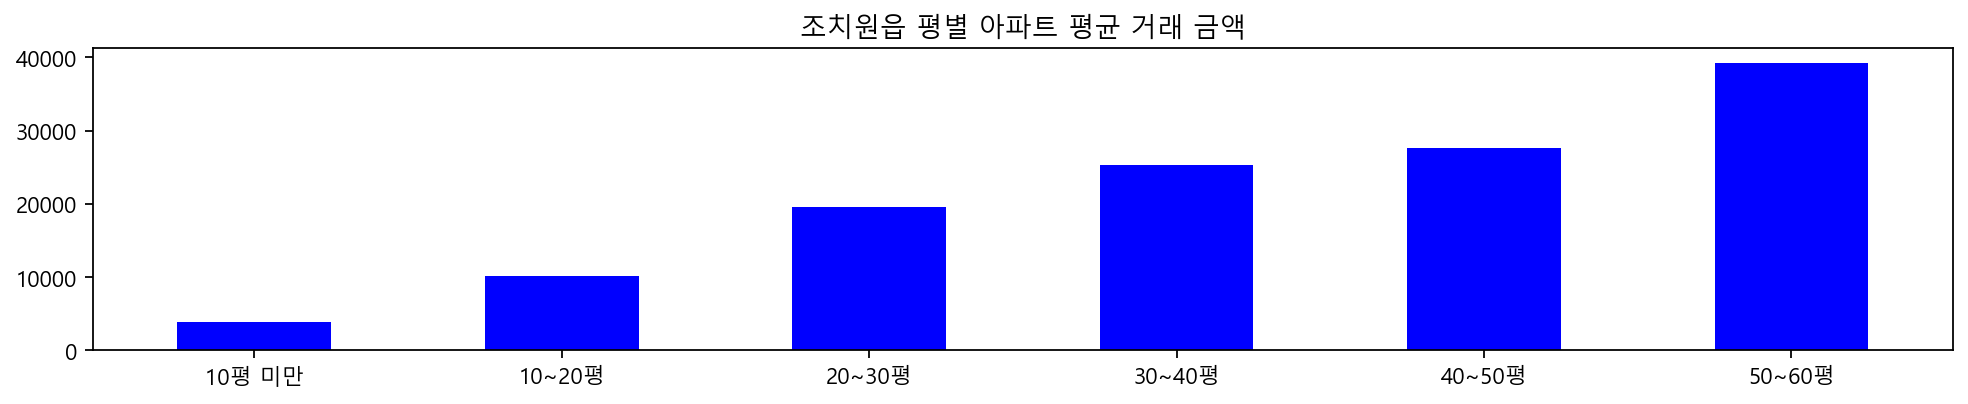

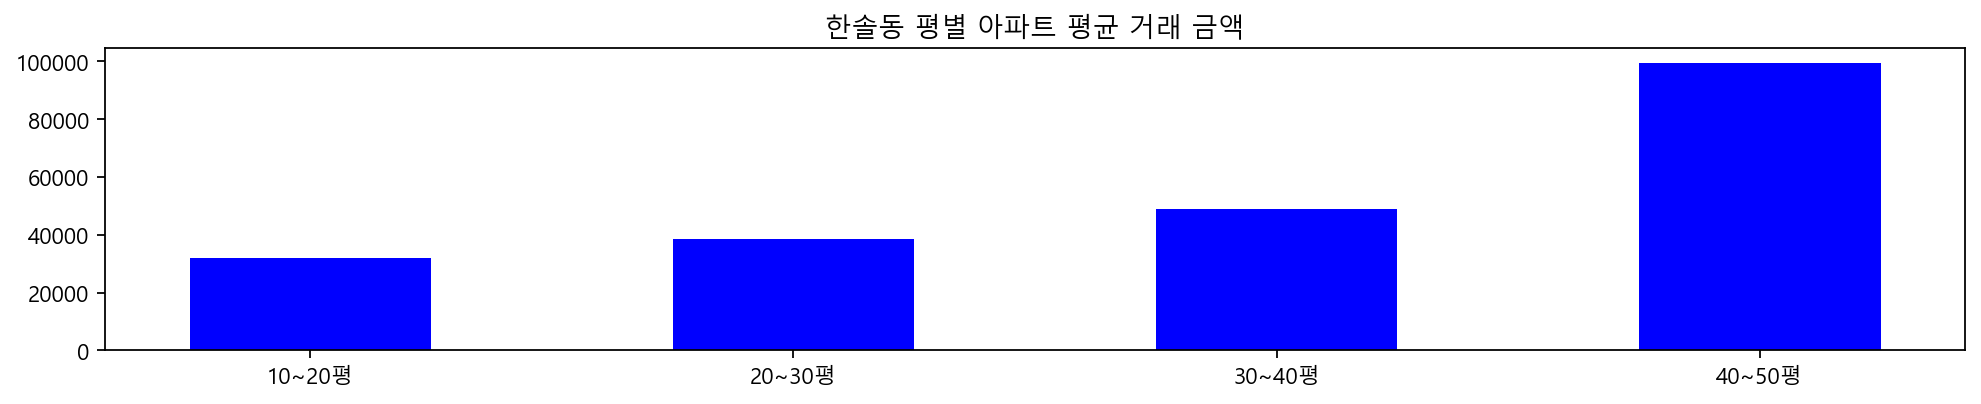

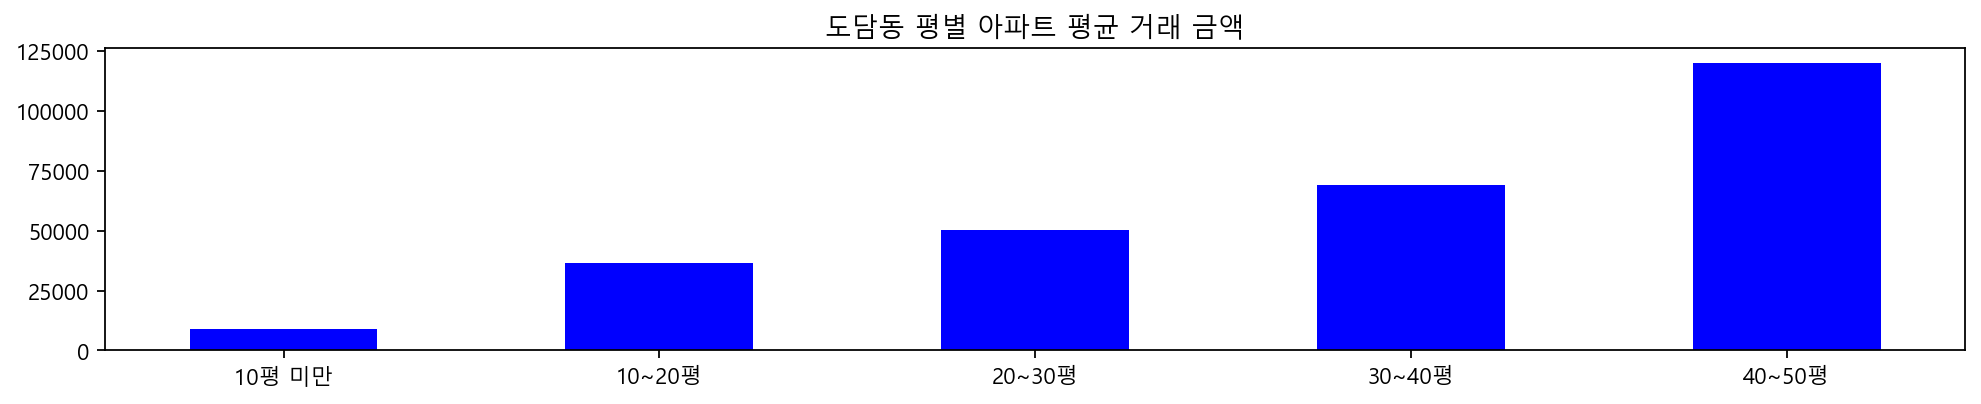

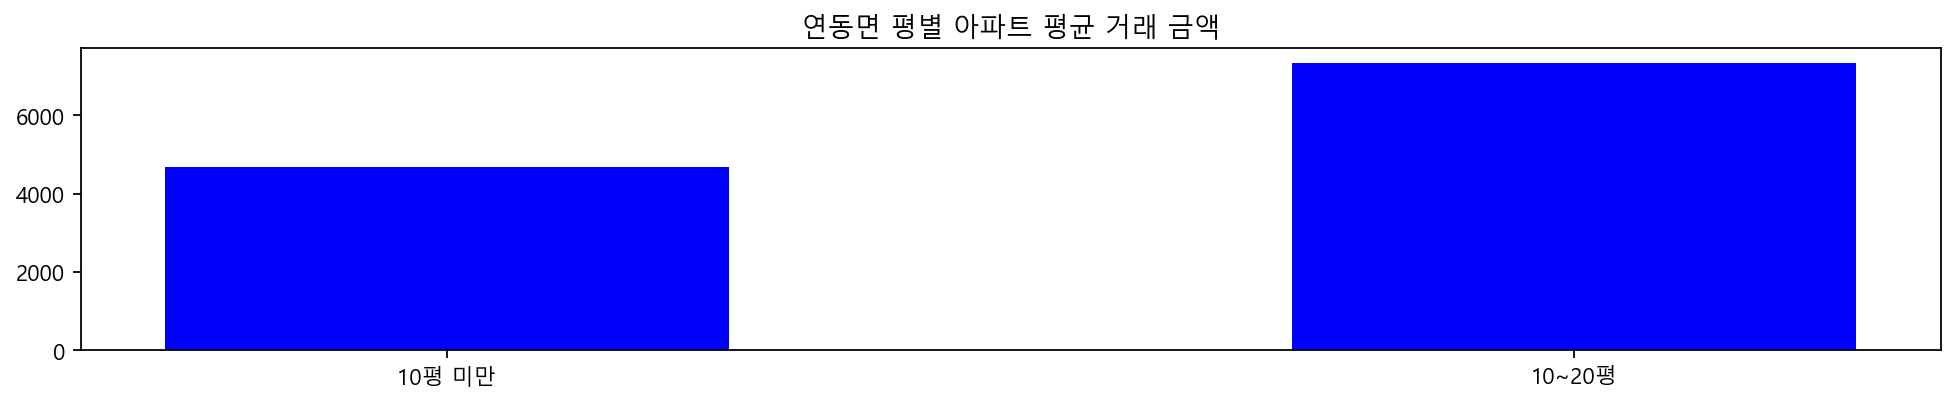

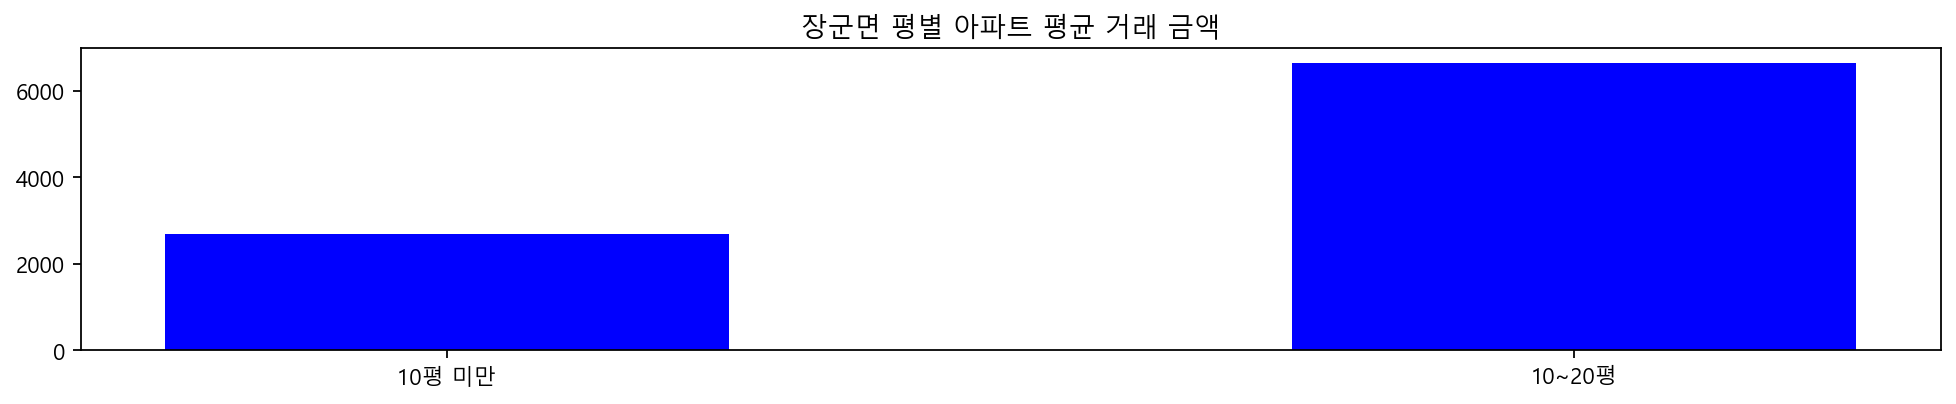

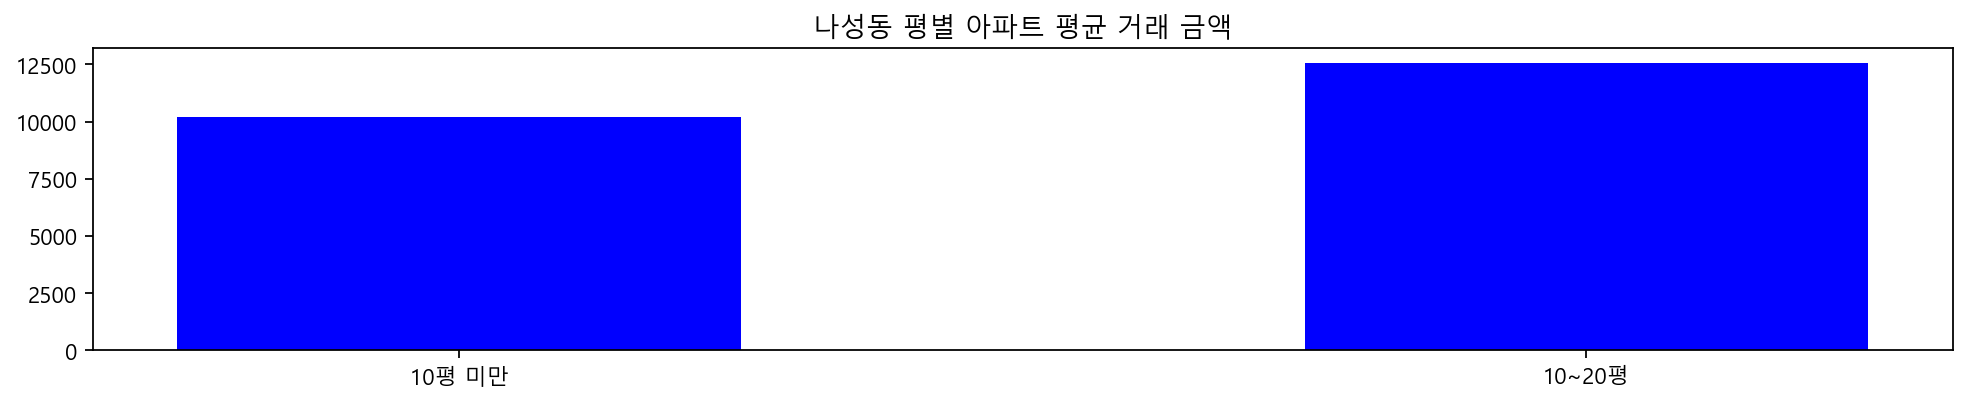

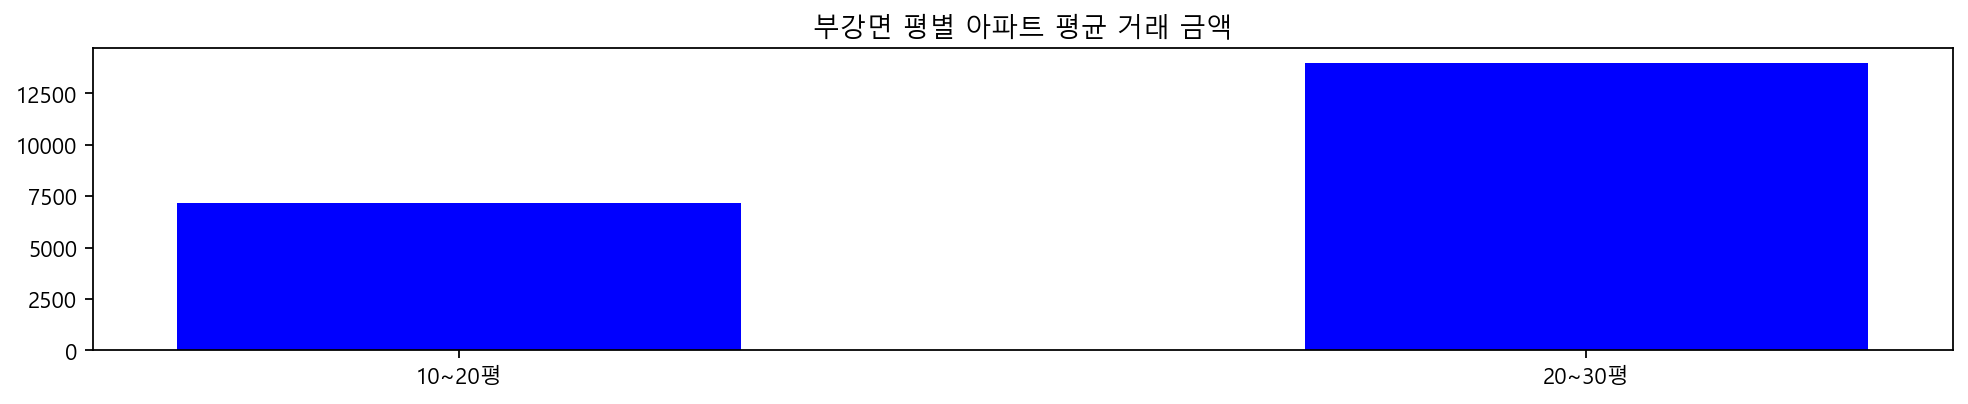

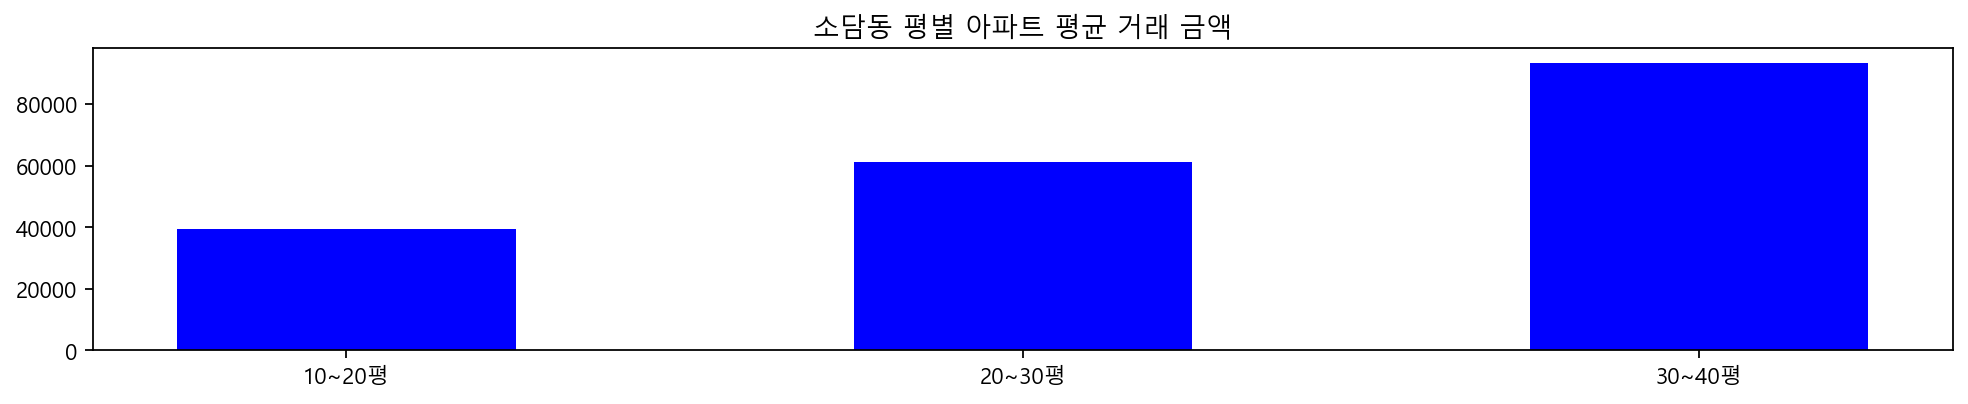

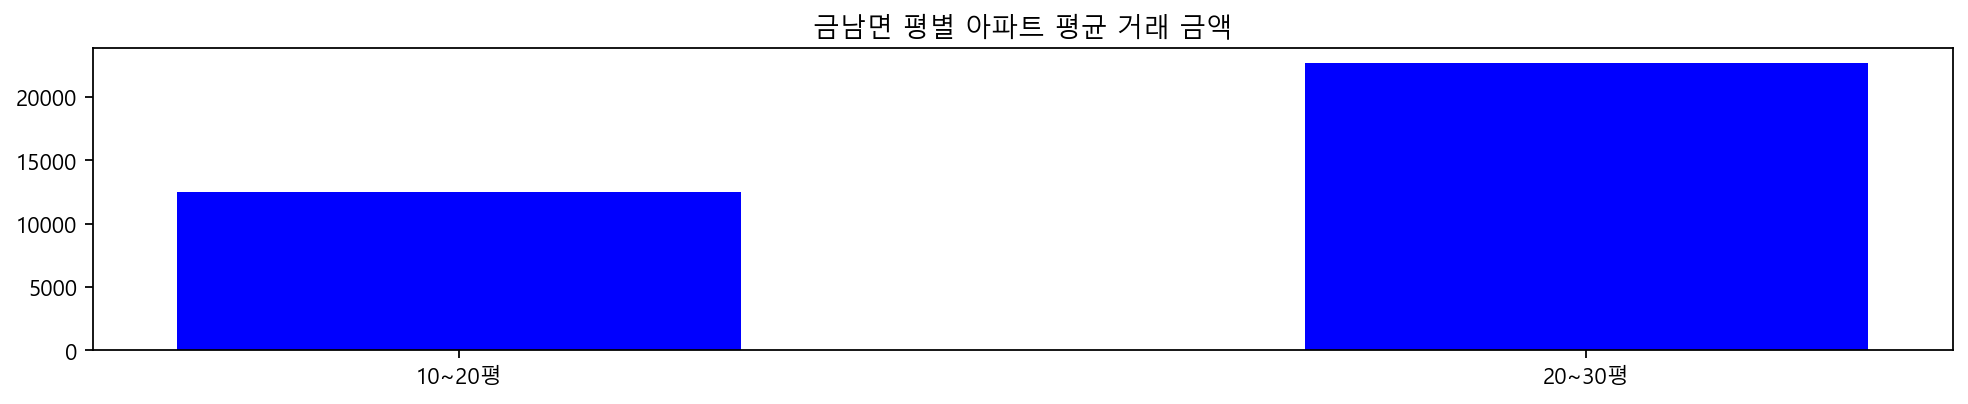

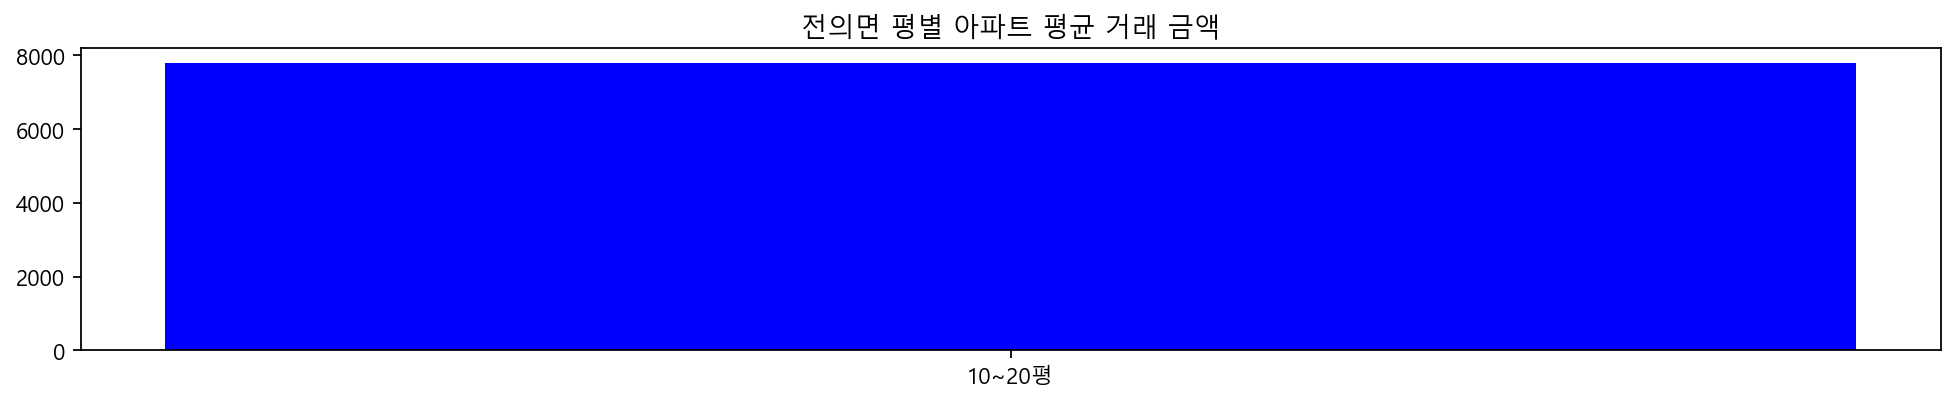

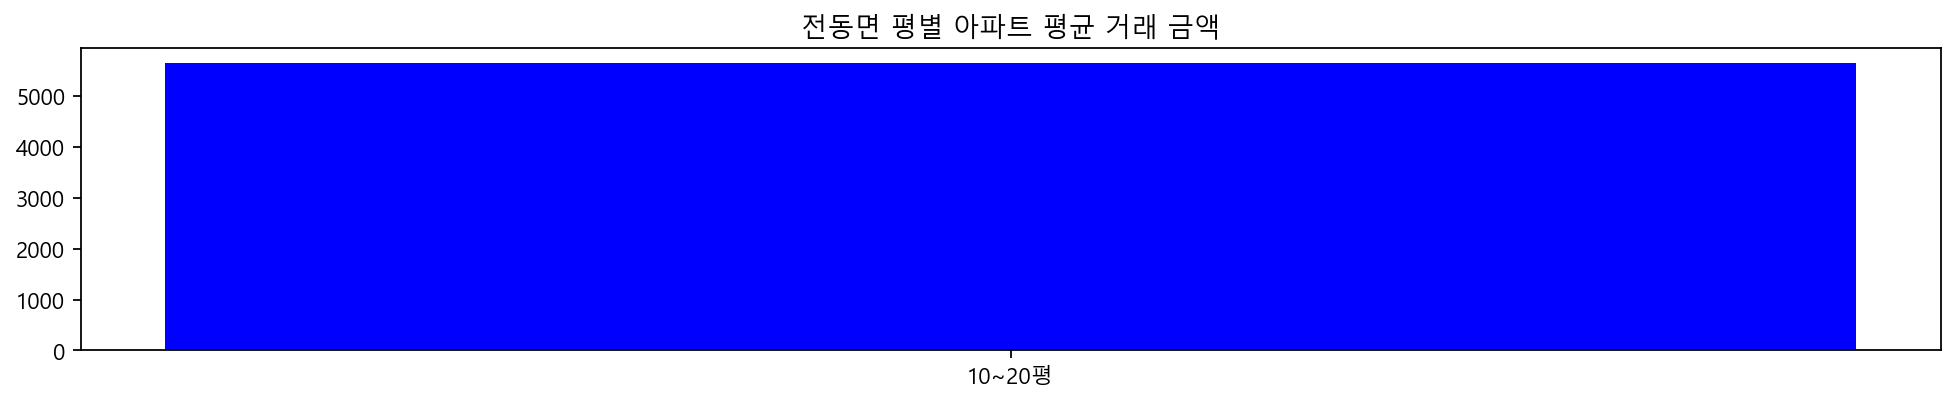

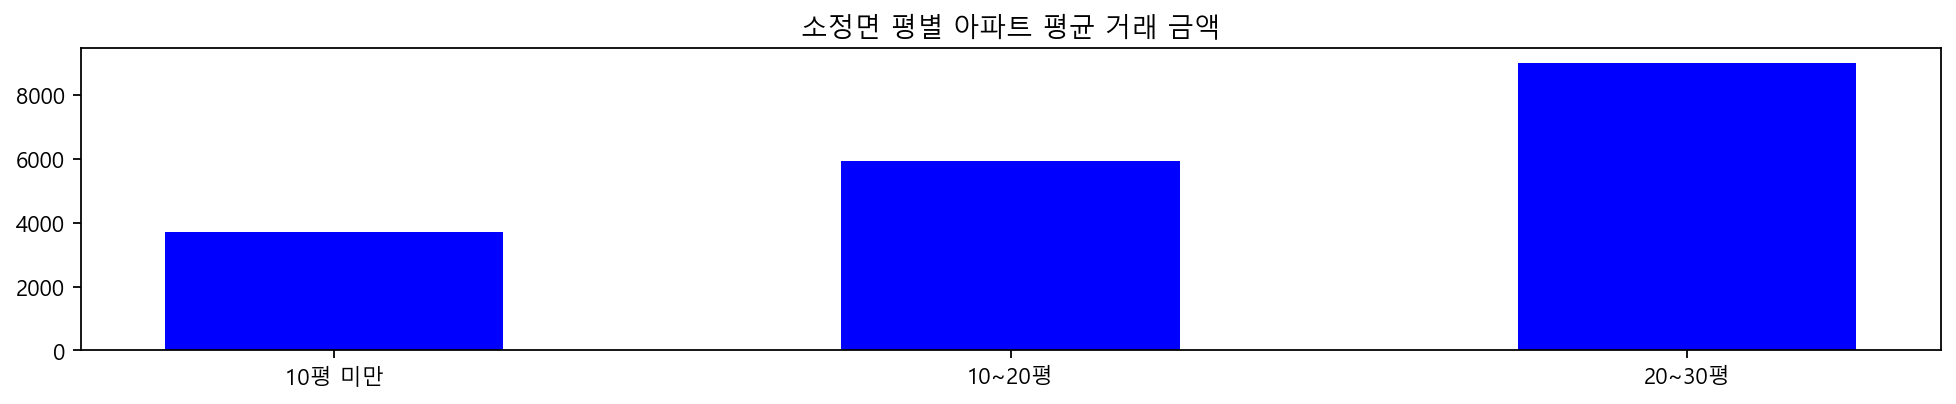

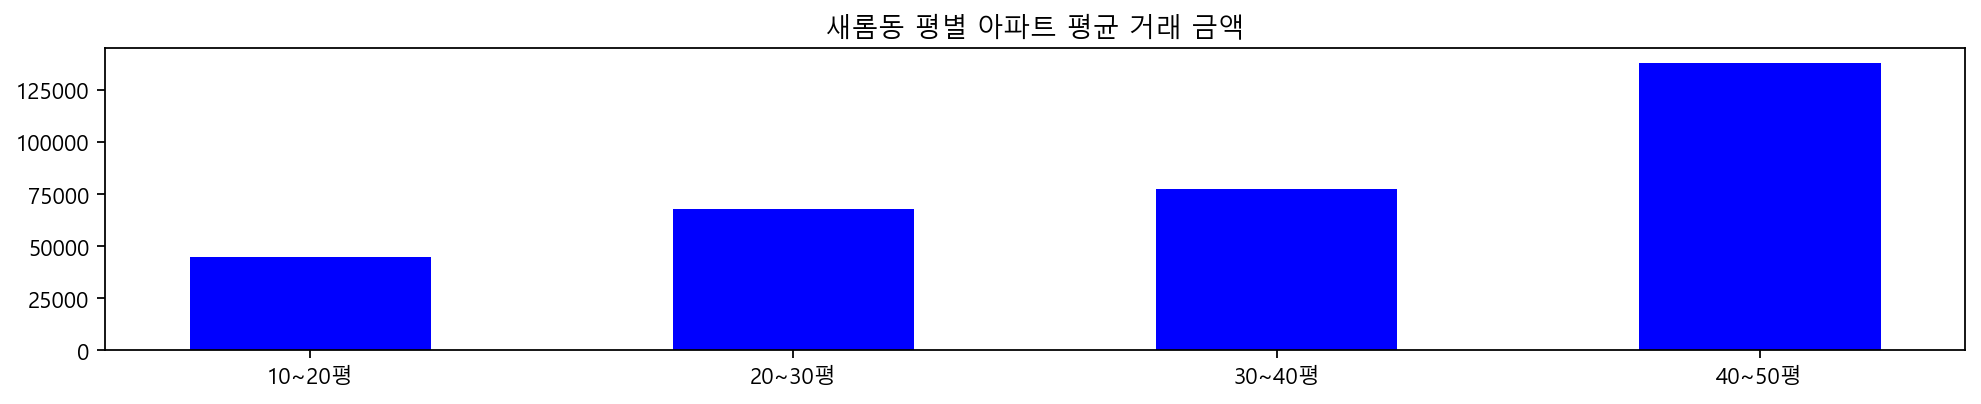

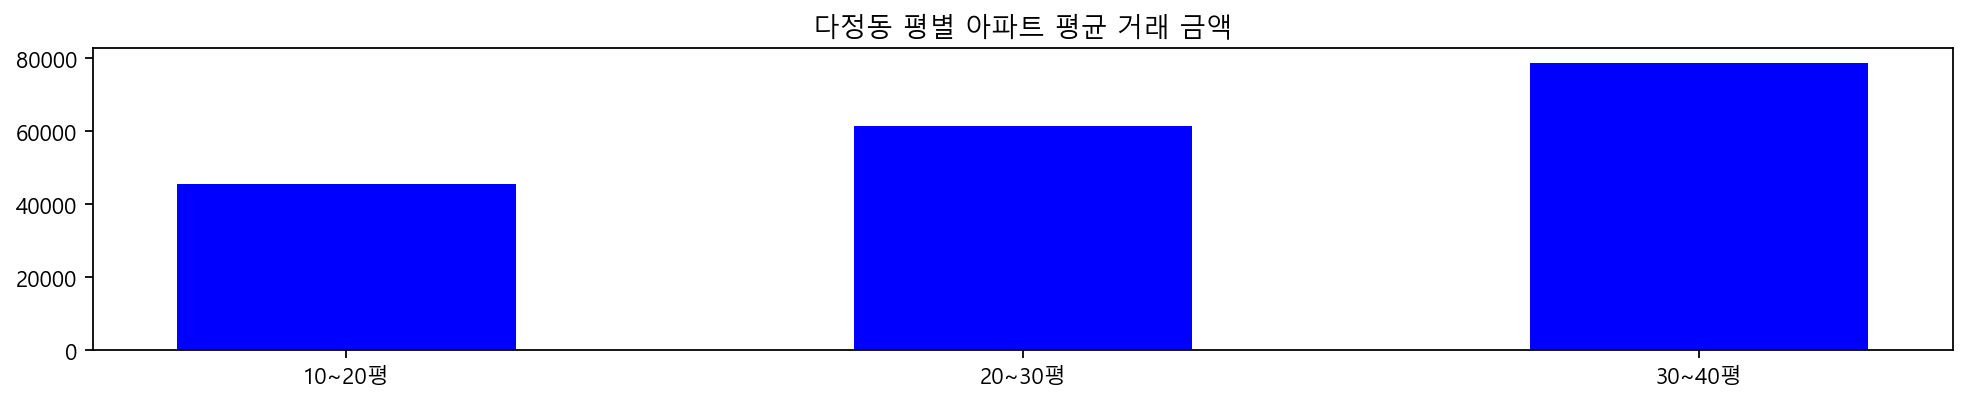

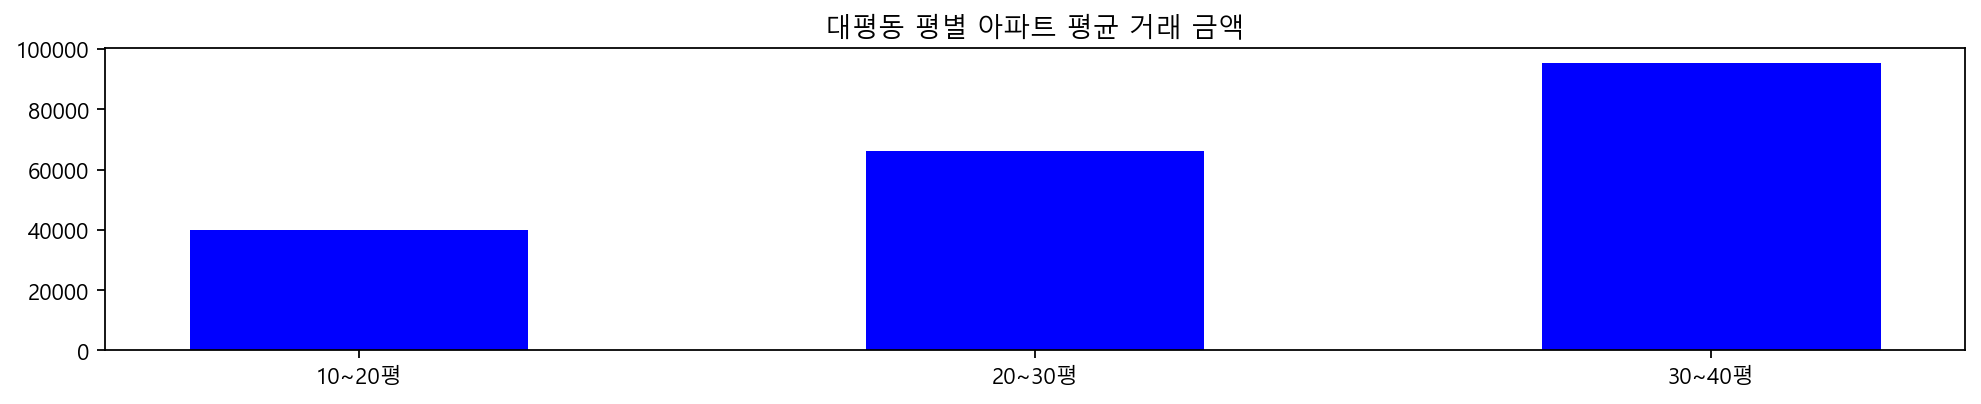

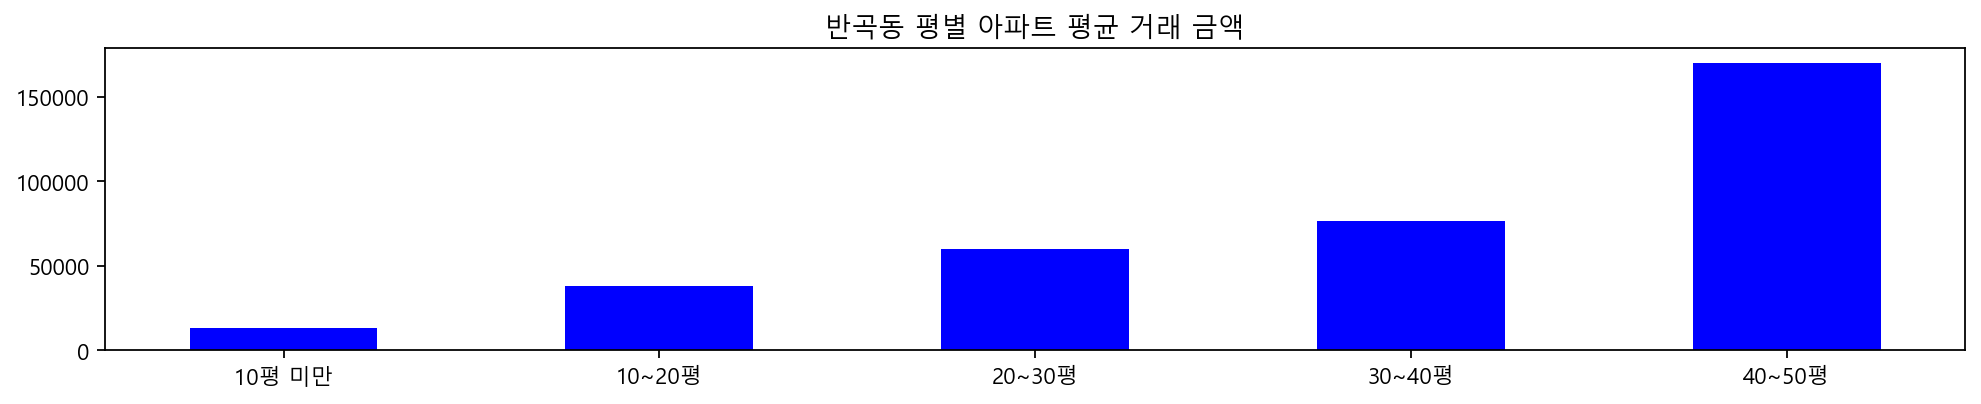

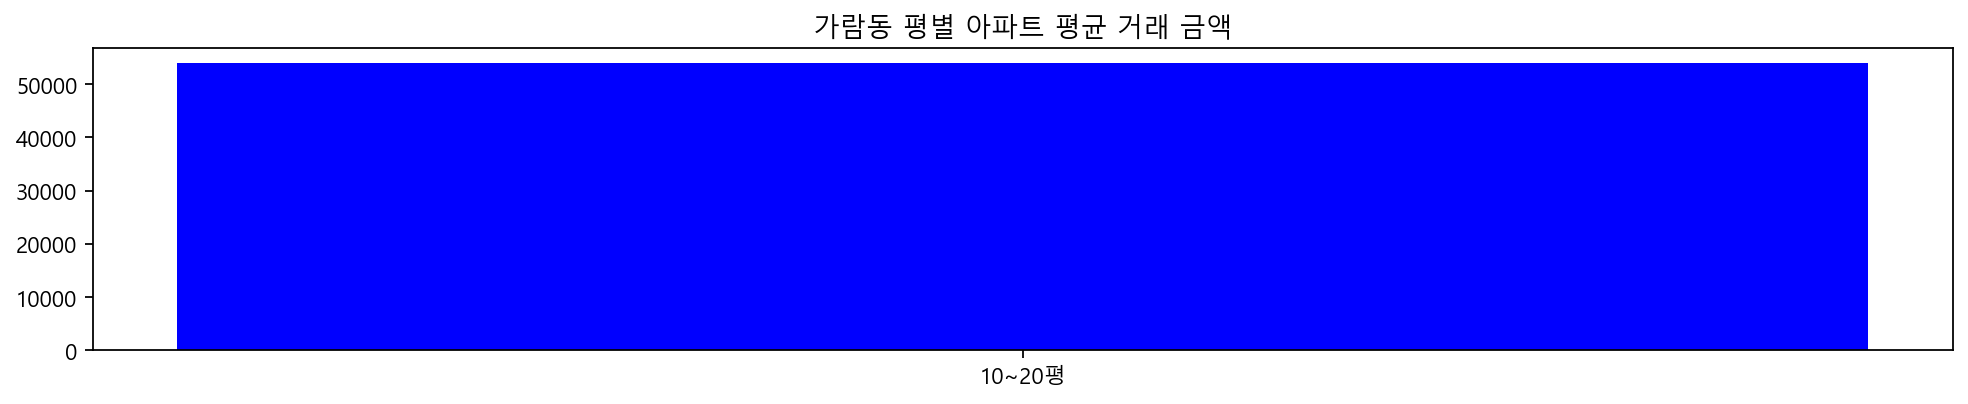

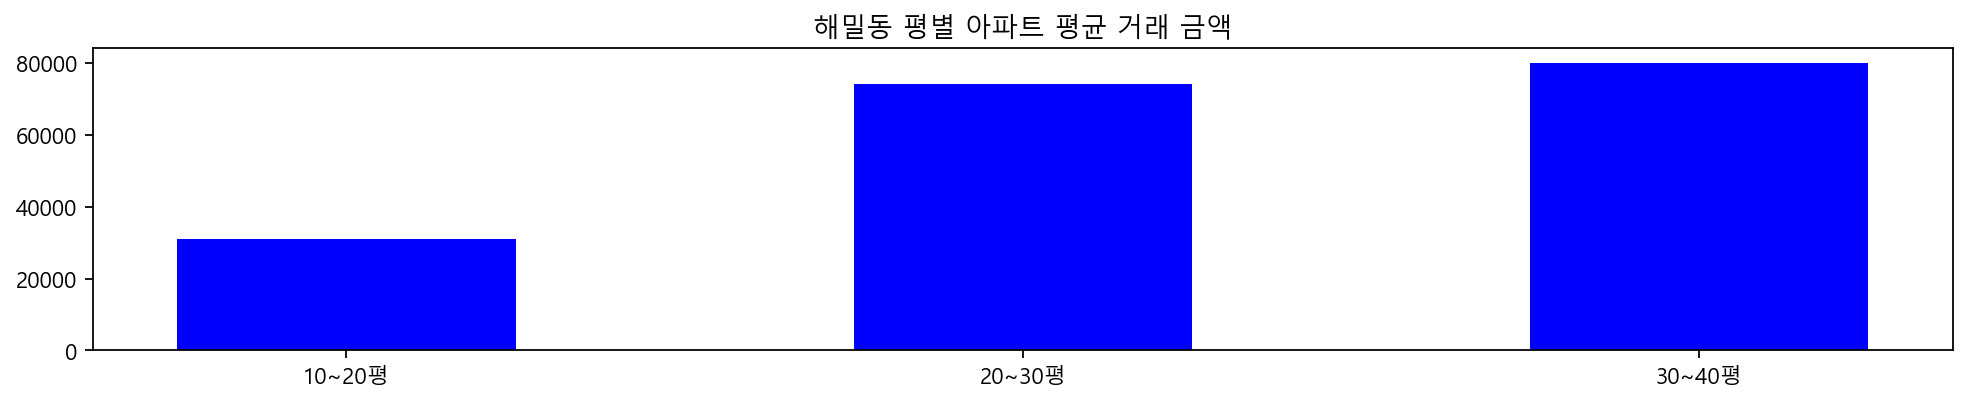

In [38]:
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).mean()
    group_new=group_new.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
    x=group_new['거래금액(만원)'].index
    y=group_new['거래금액(만원)'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+' 평별 아파트 평균 거래 금액'
    plt.title(a)
    plt.savefig(a+'.png')

<ipython-input-7-602edca1e91a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


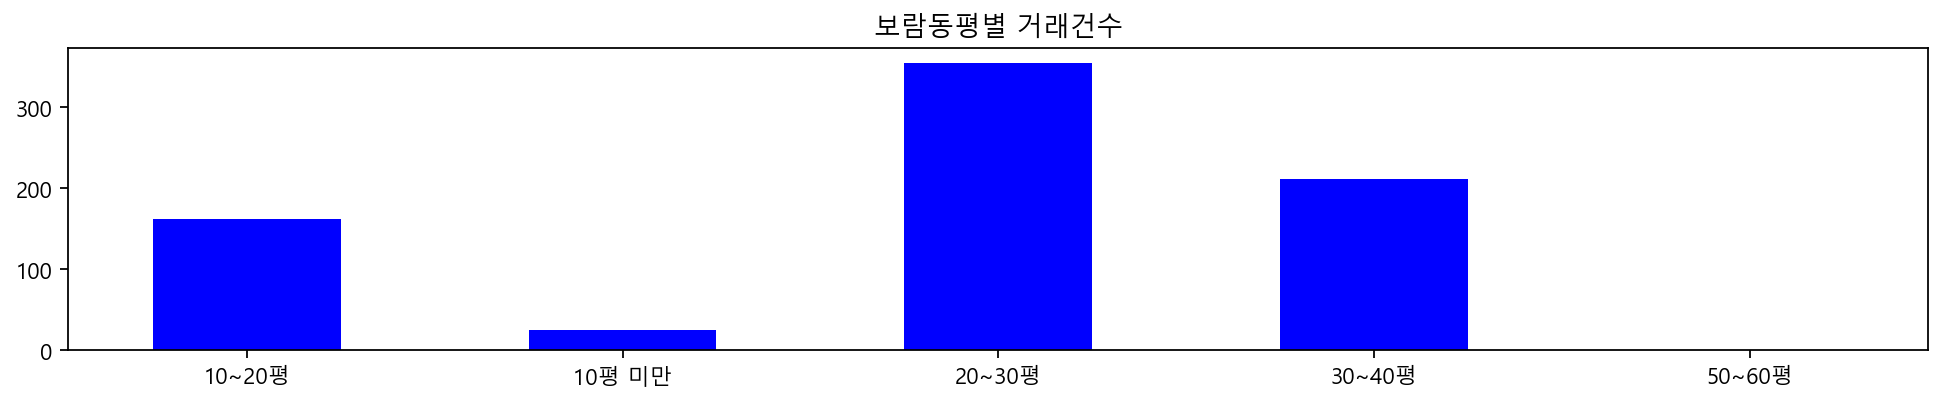

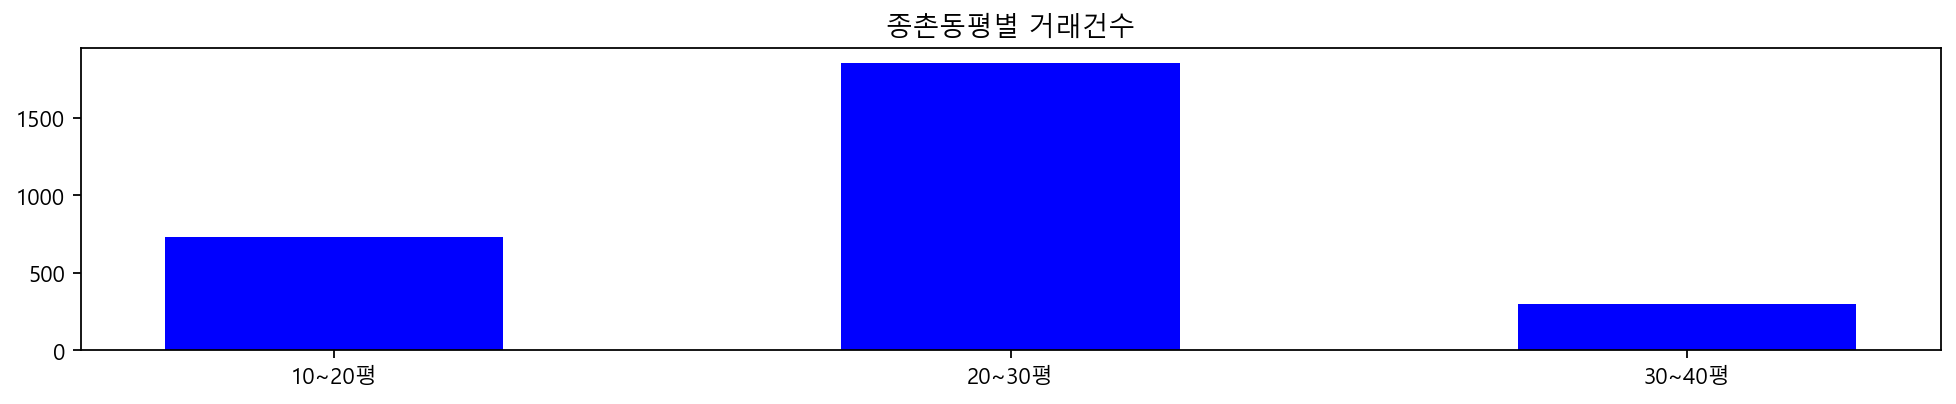

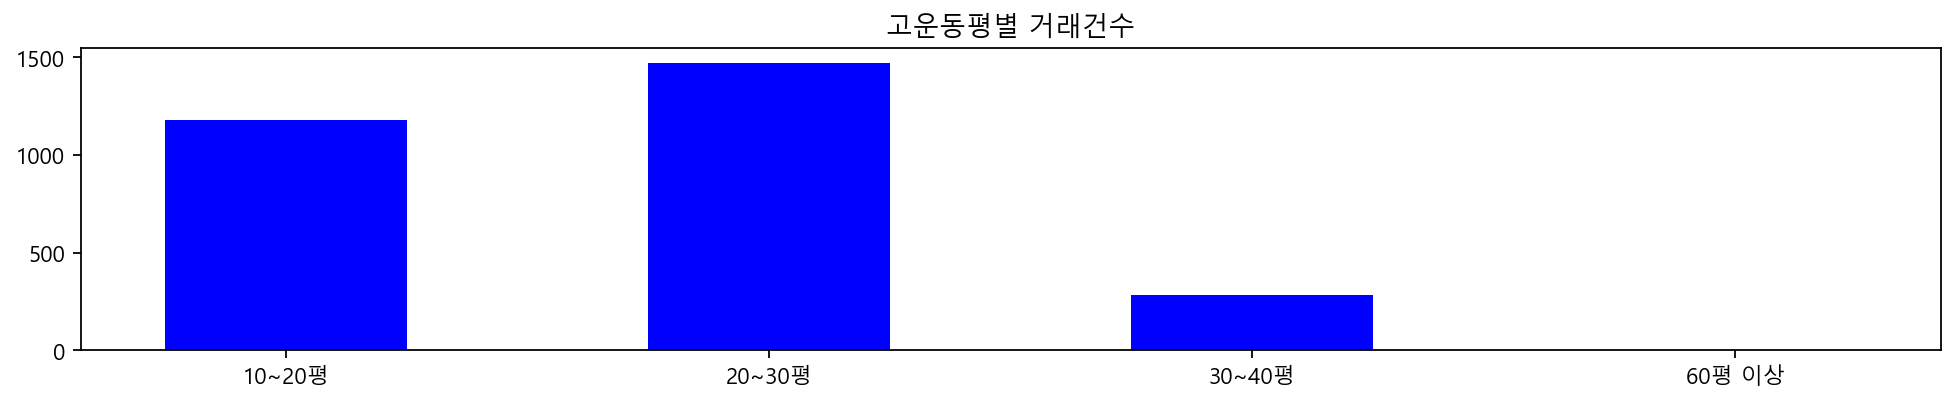

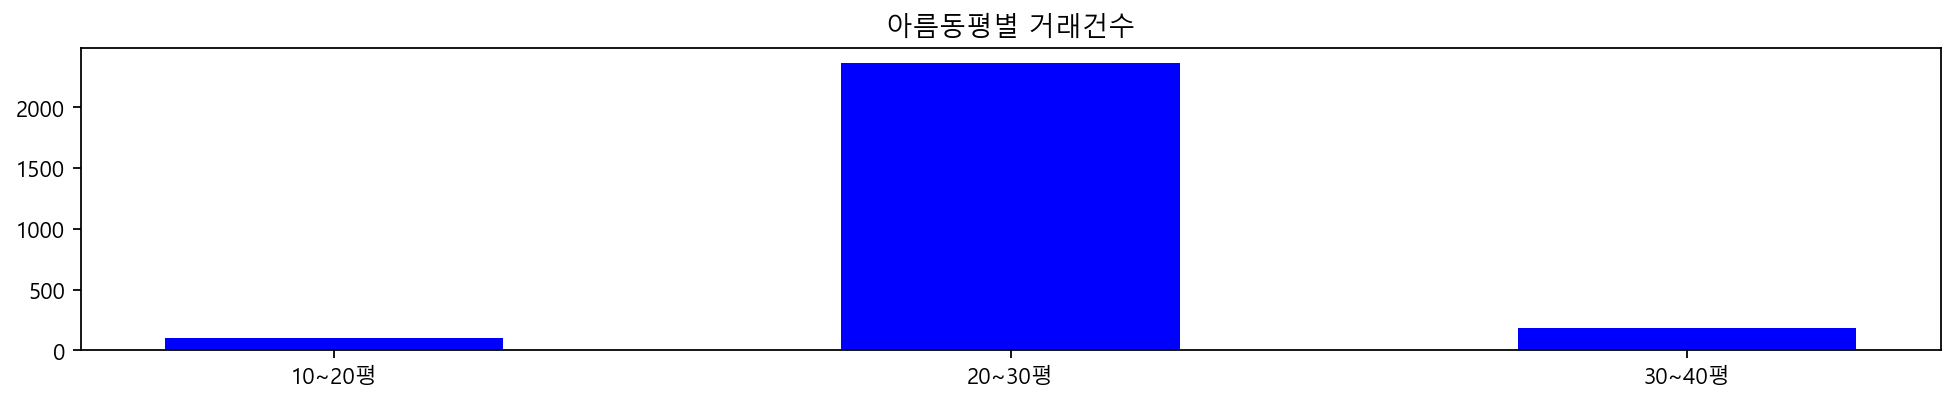

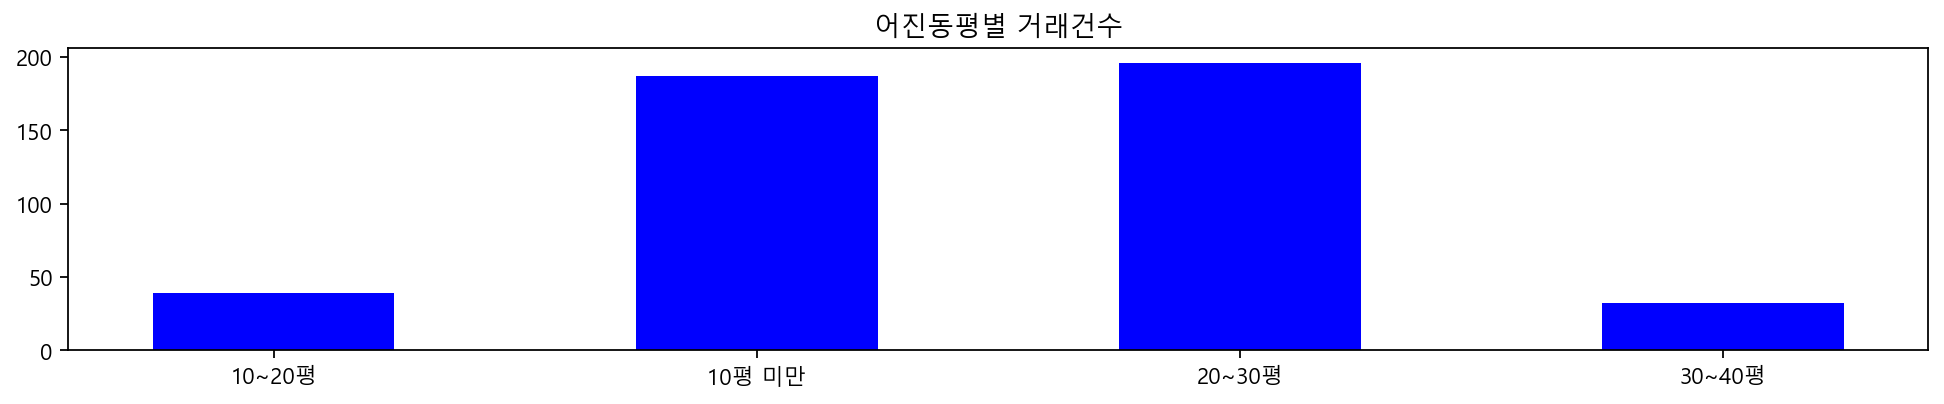

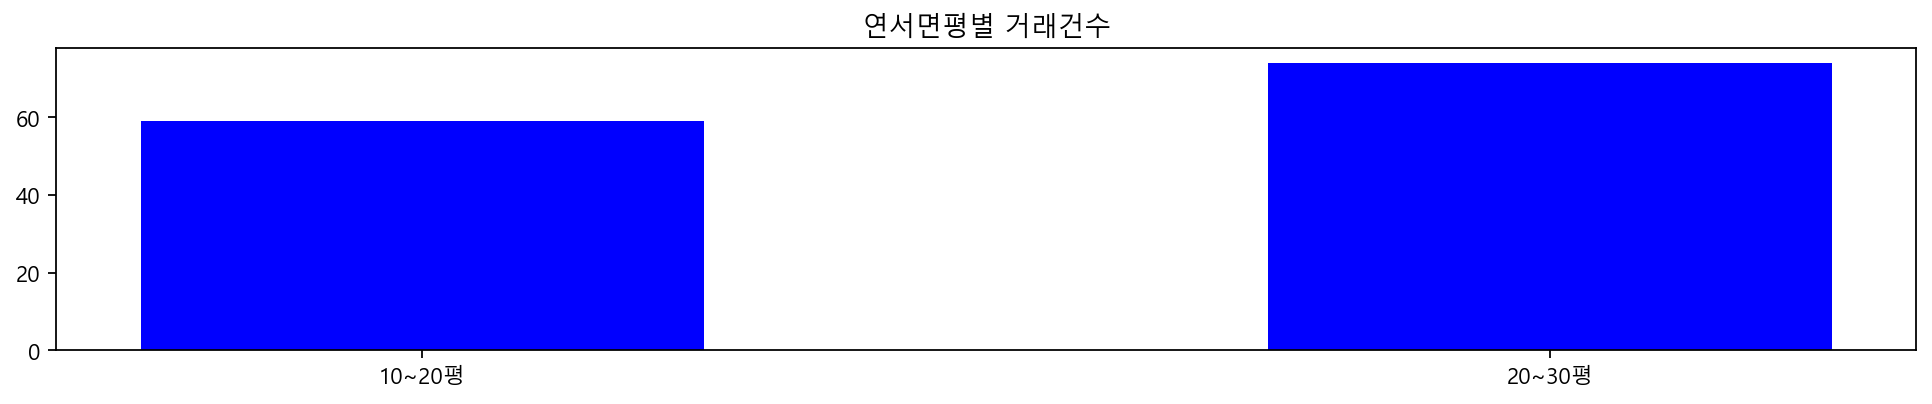

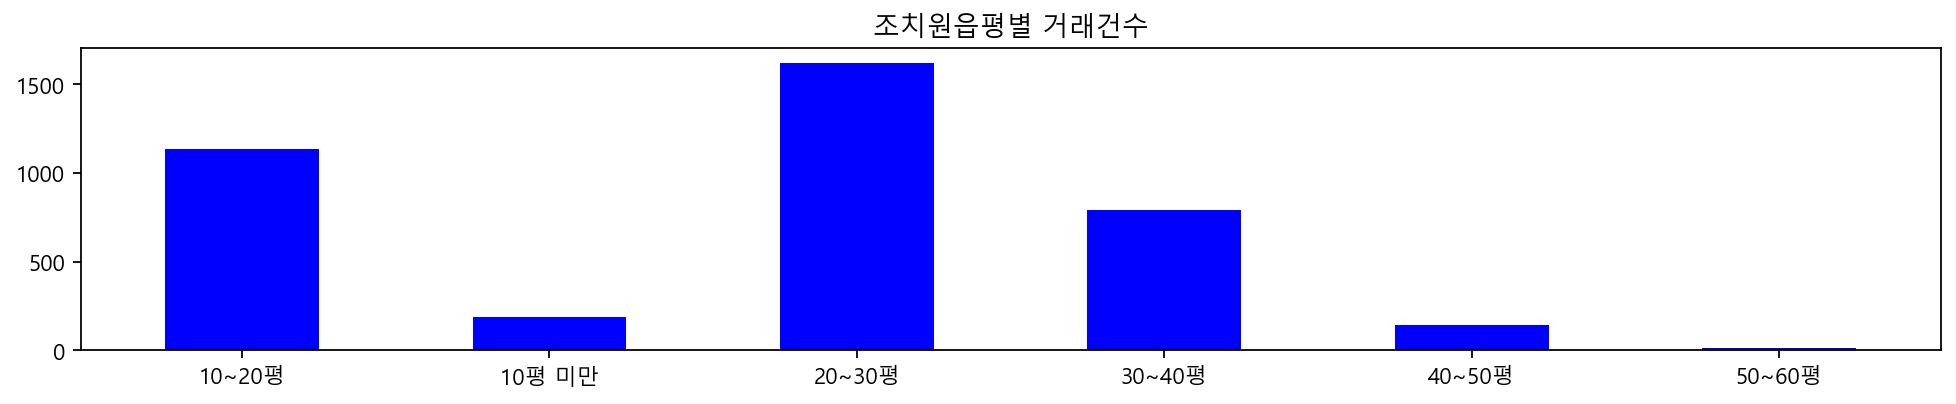

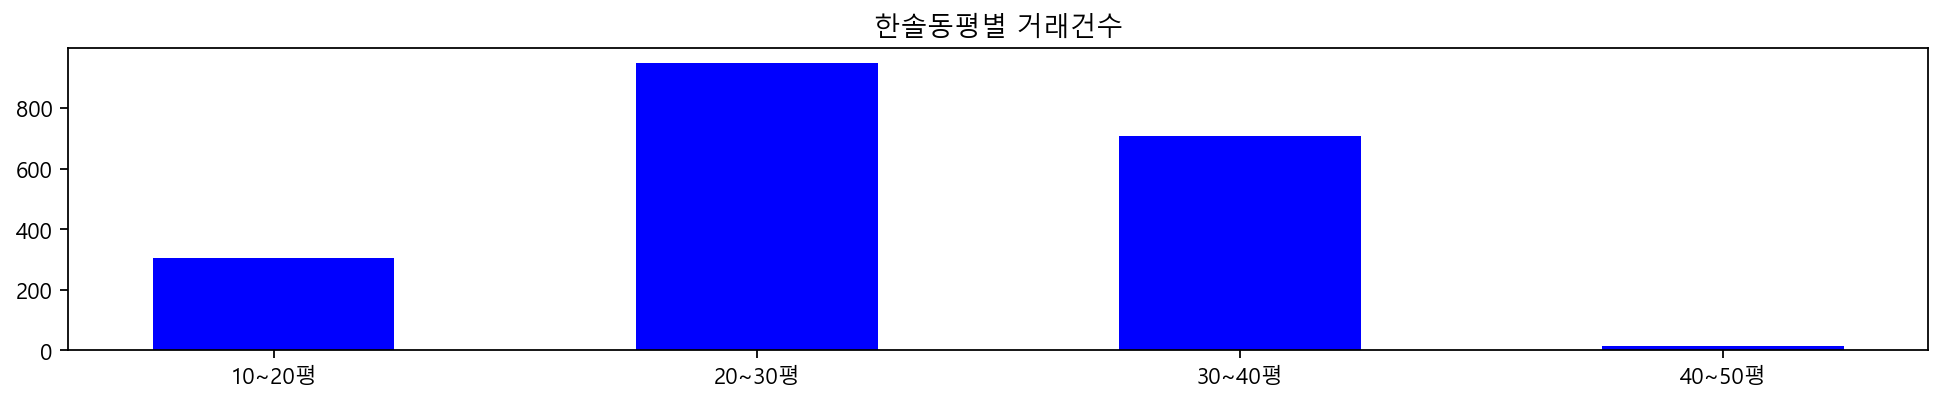

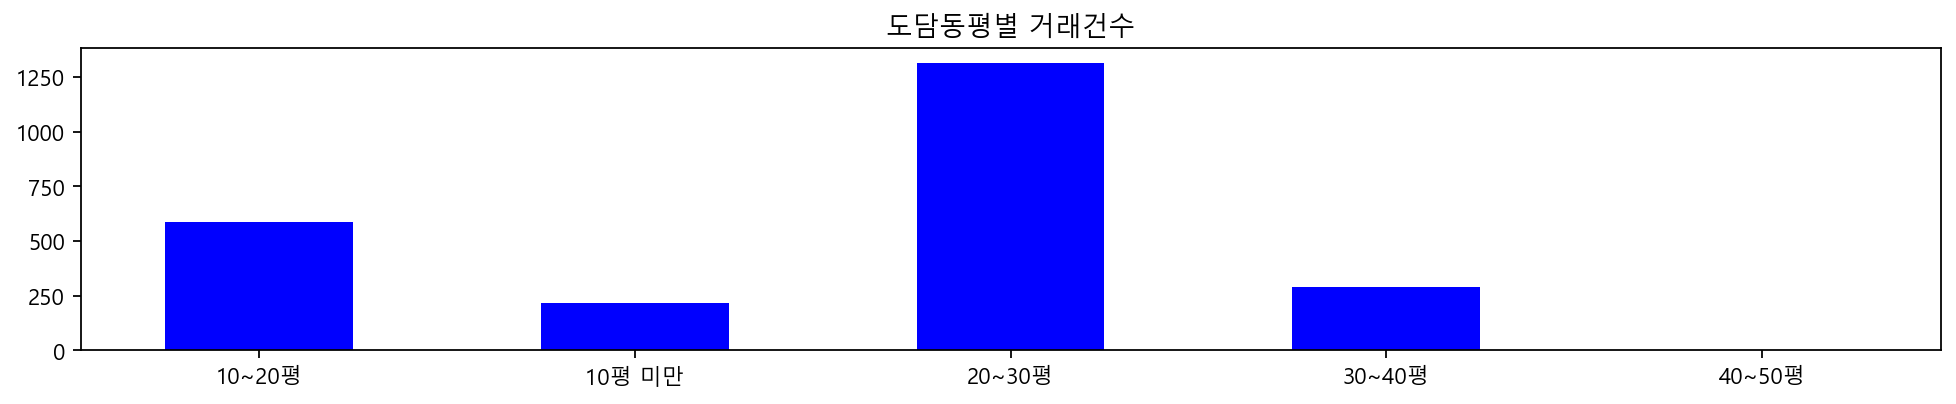

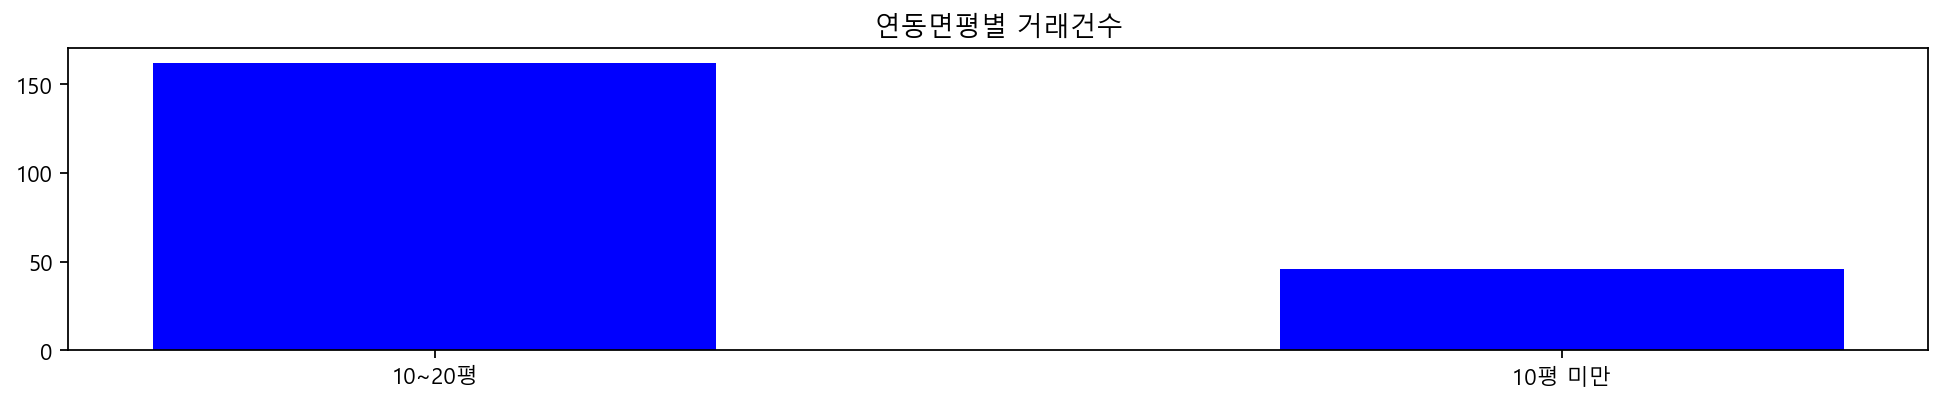

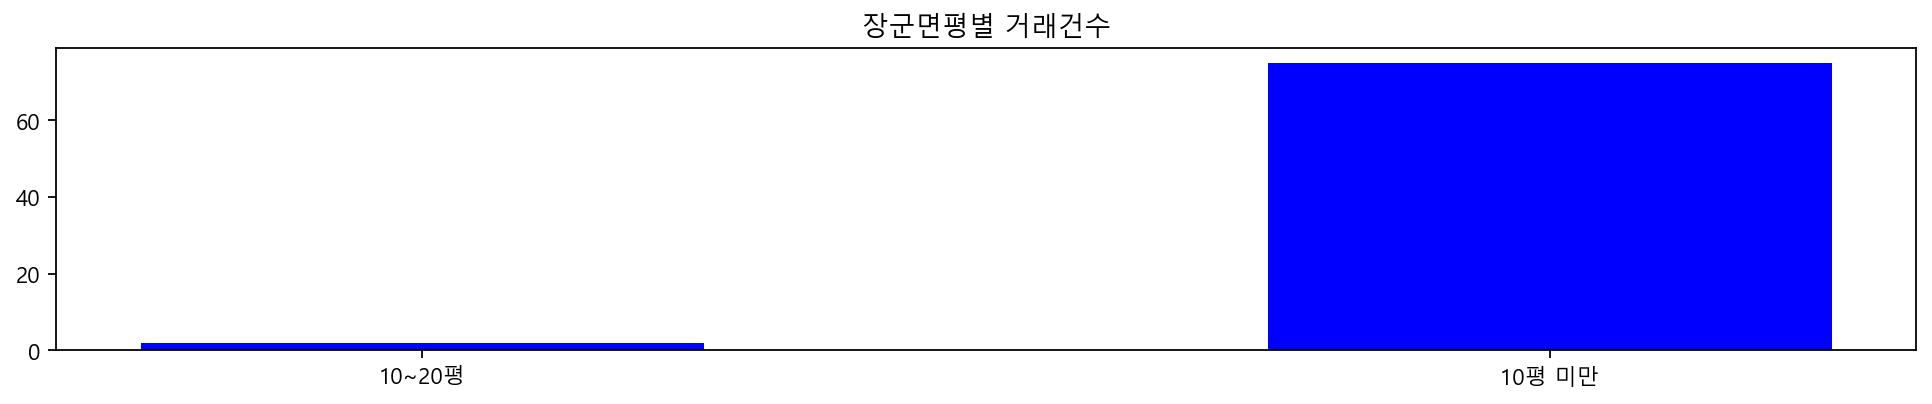

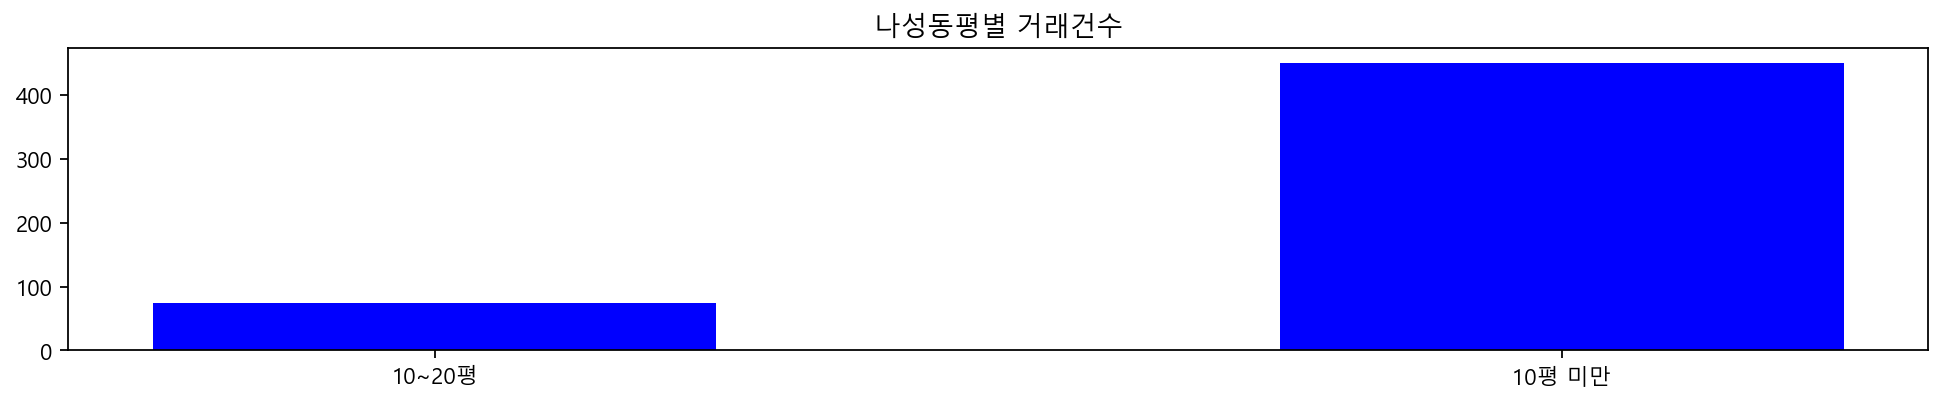

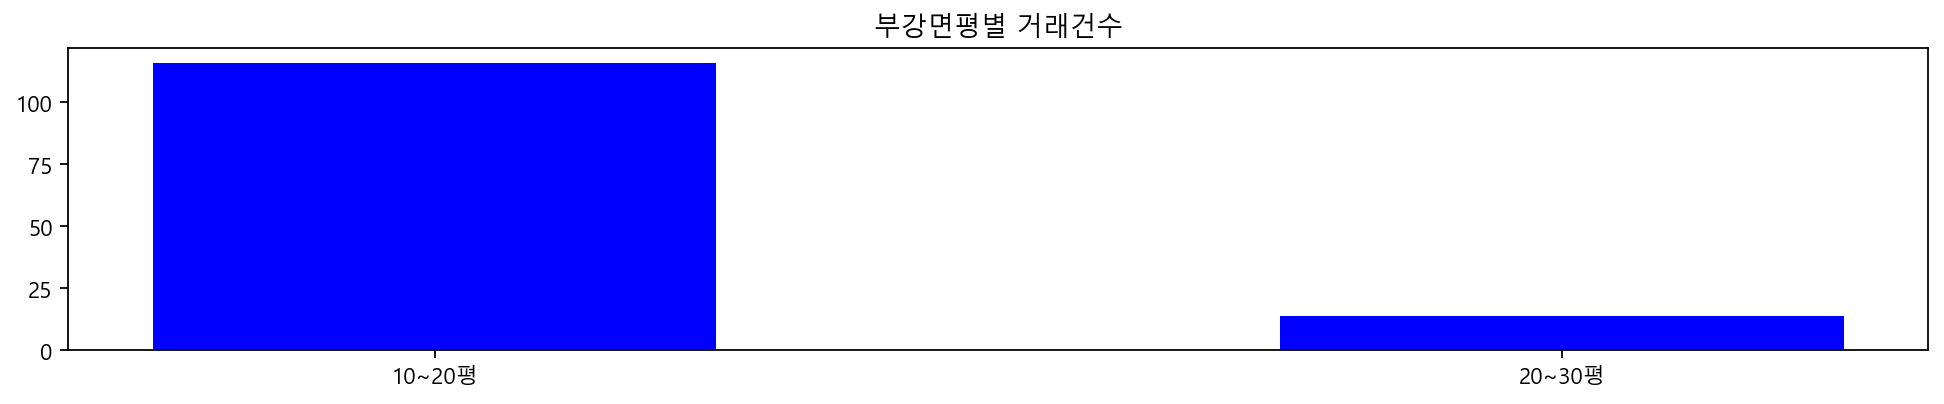

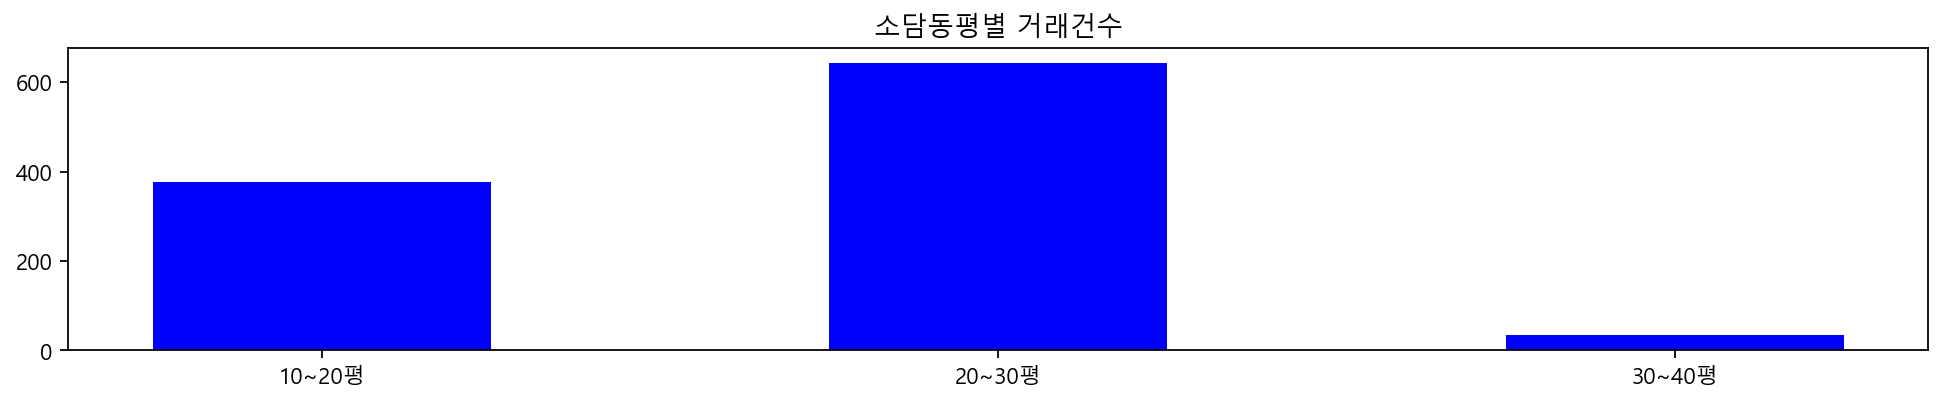

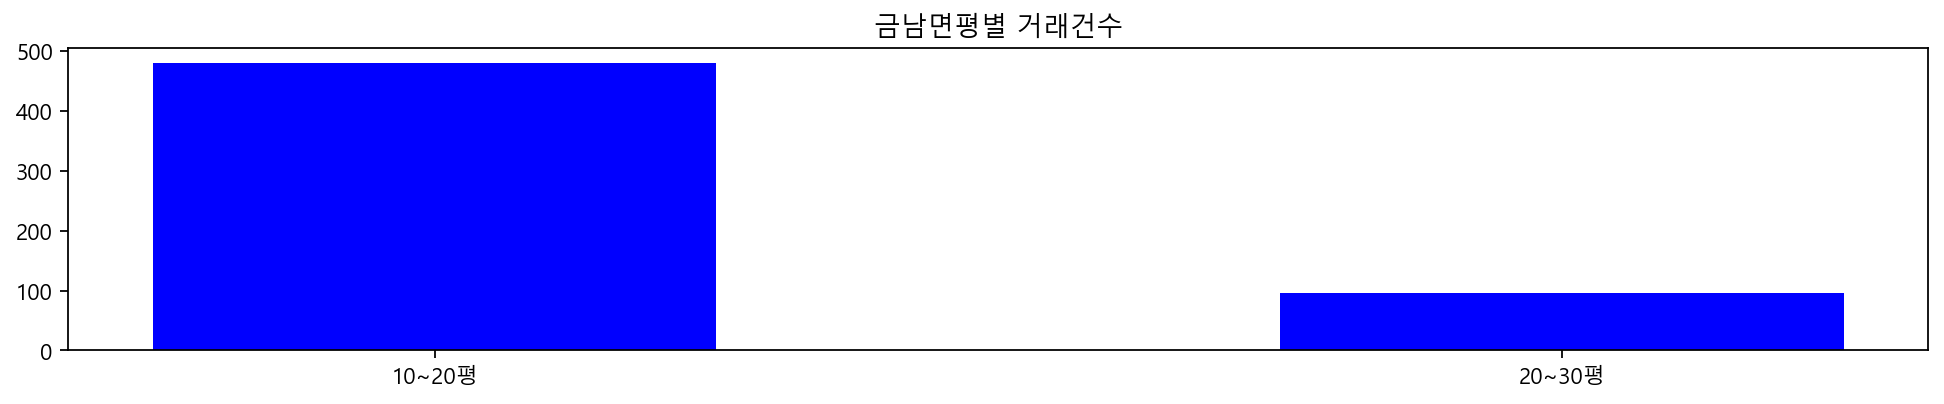

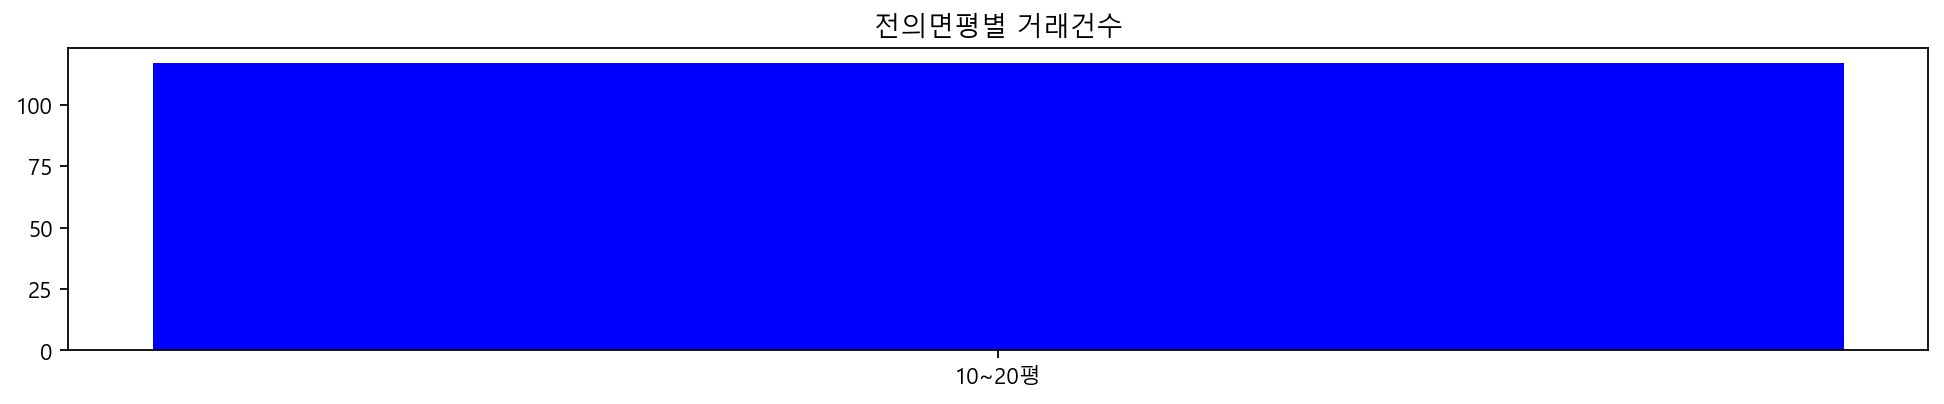

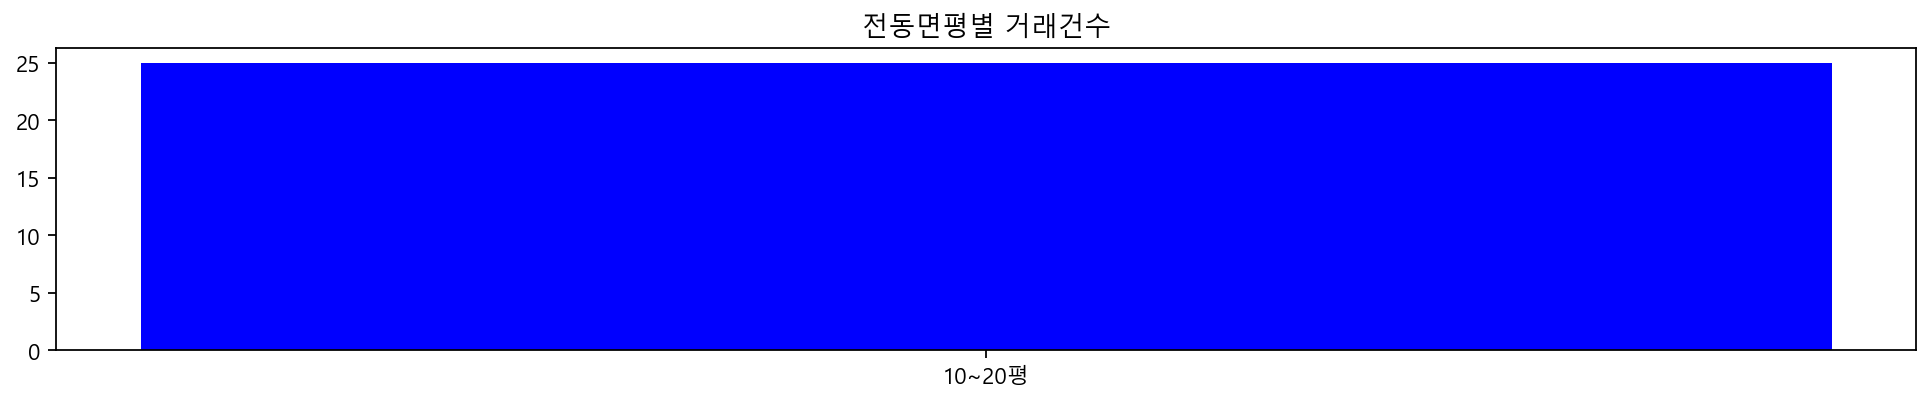

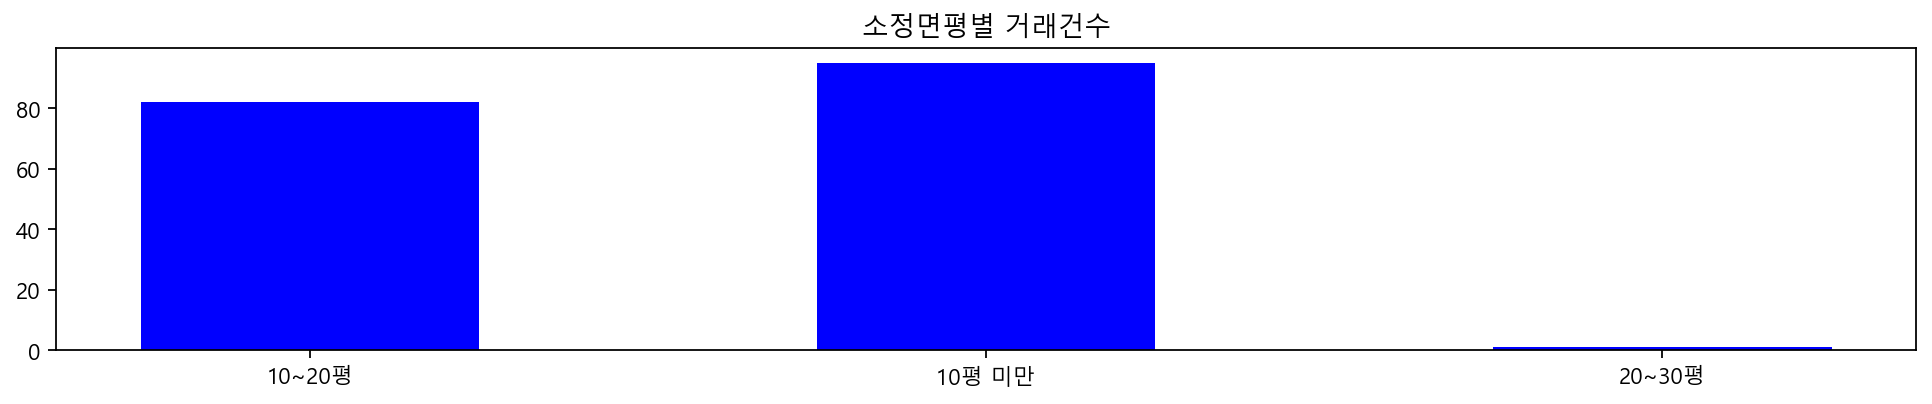

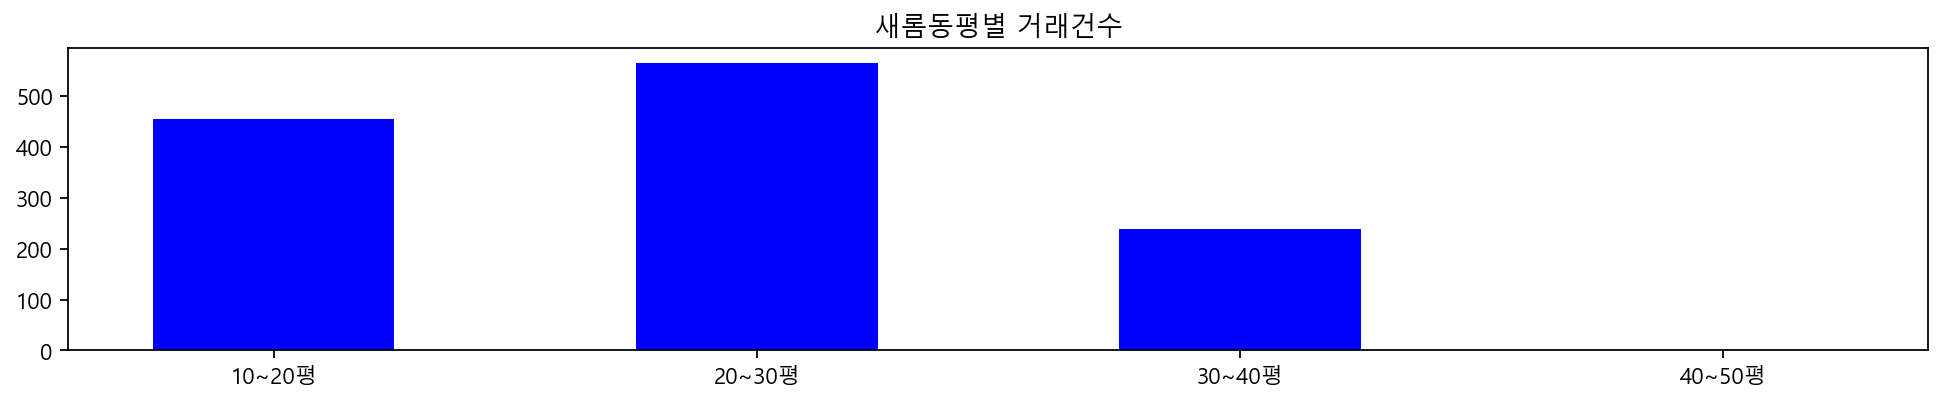

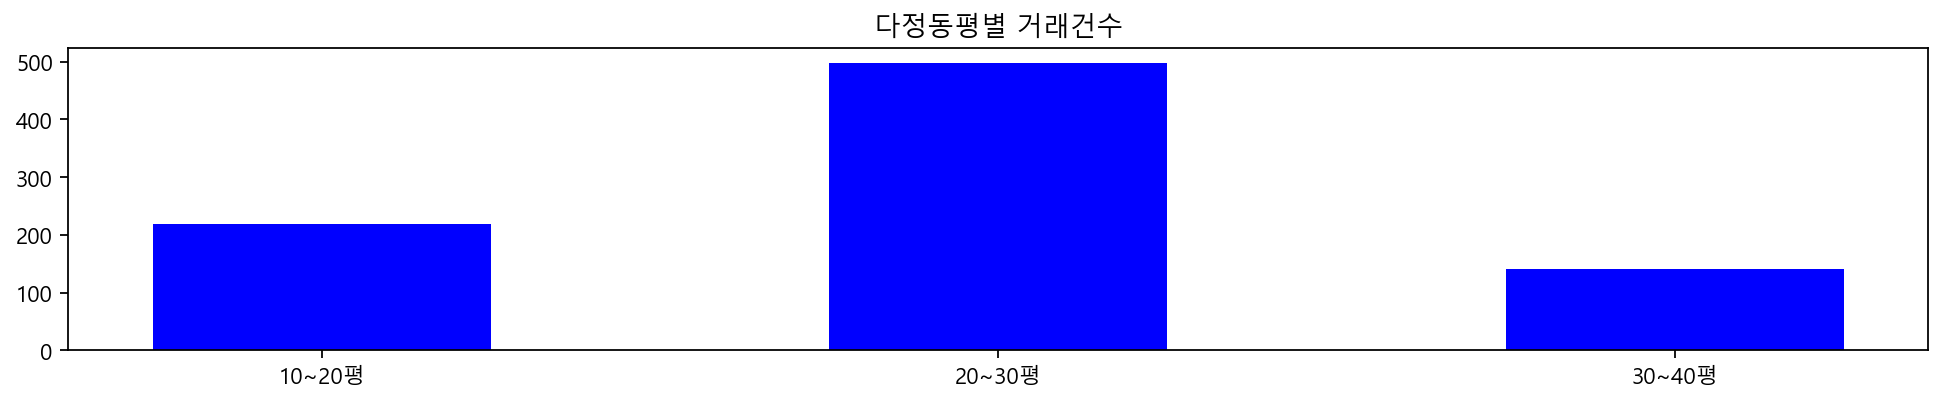

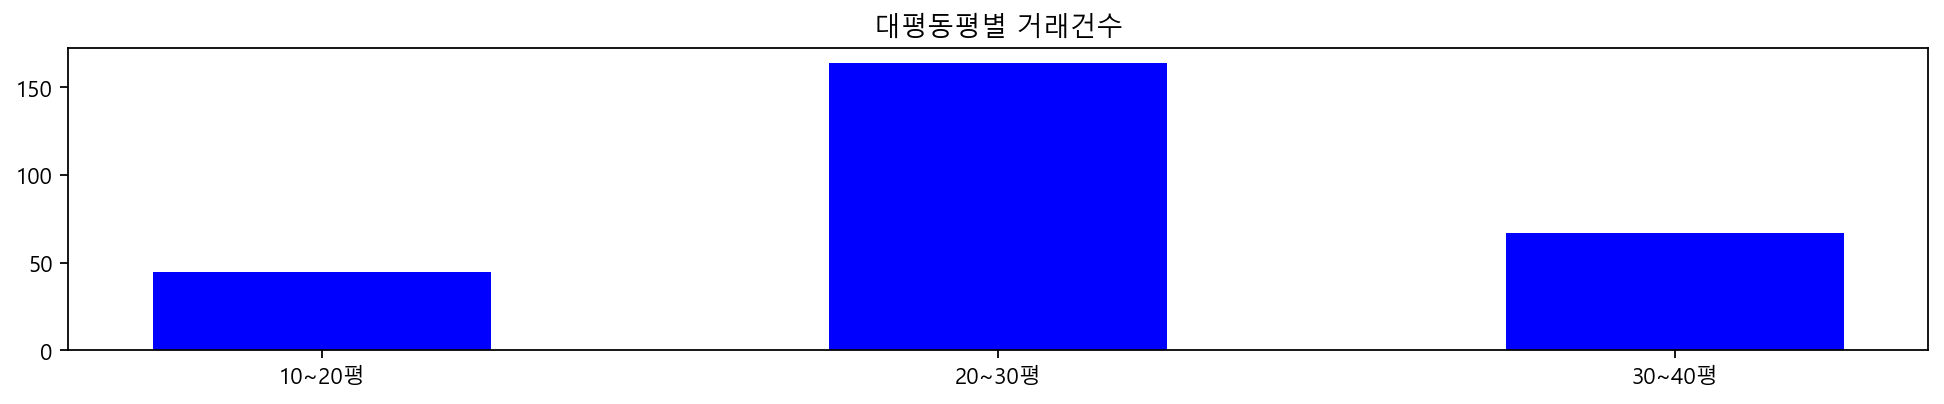

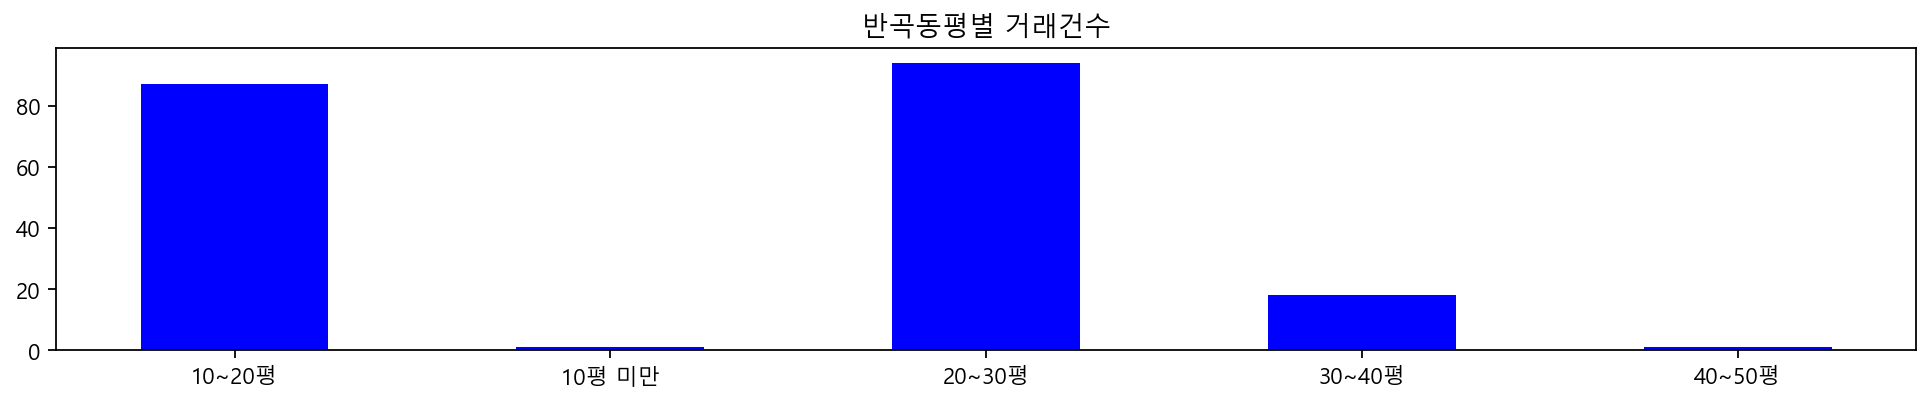

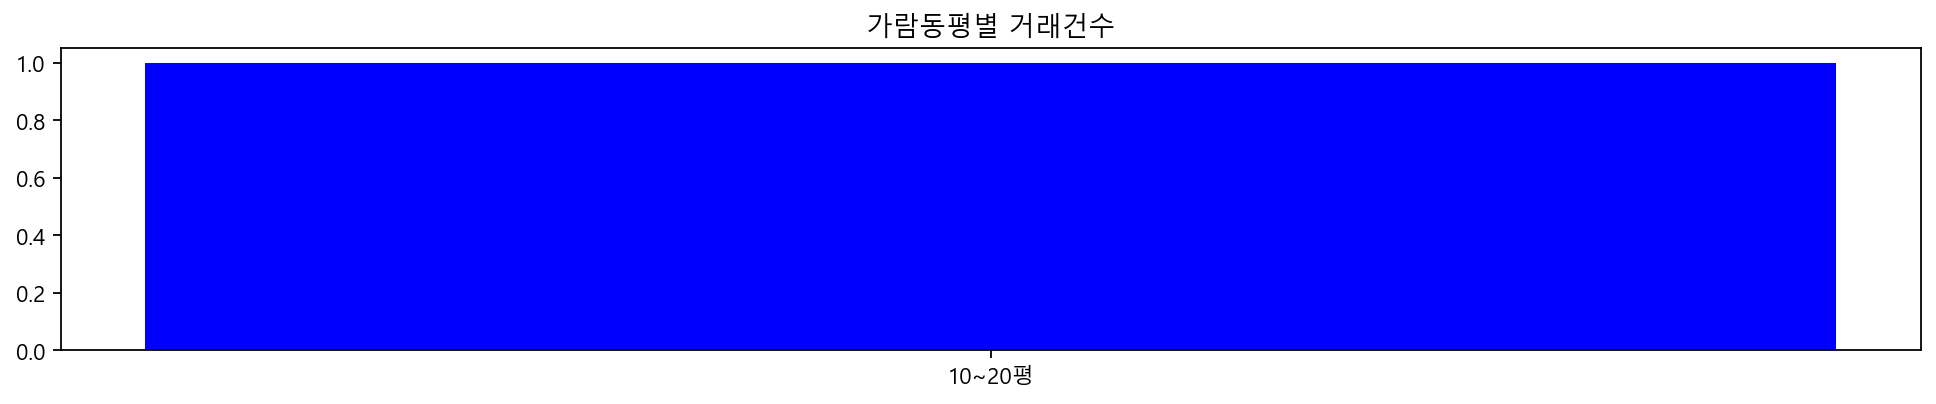

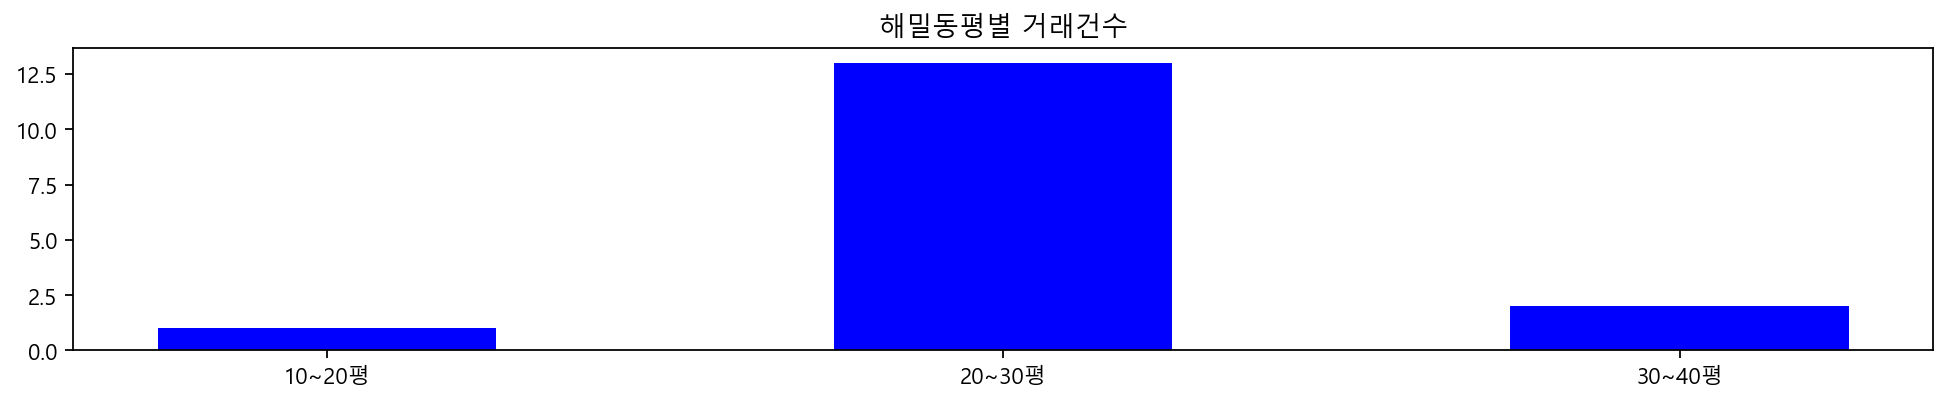

In [7]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [8]:
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

<ipython-input-9-ff348b9f4665>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


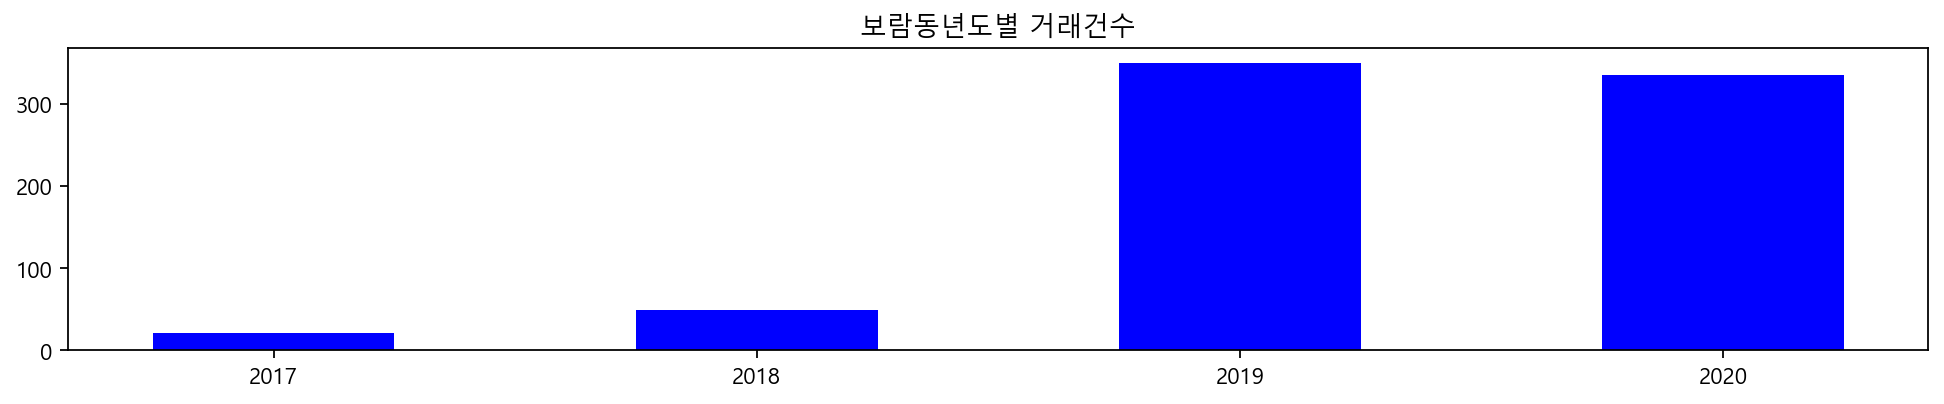

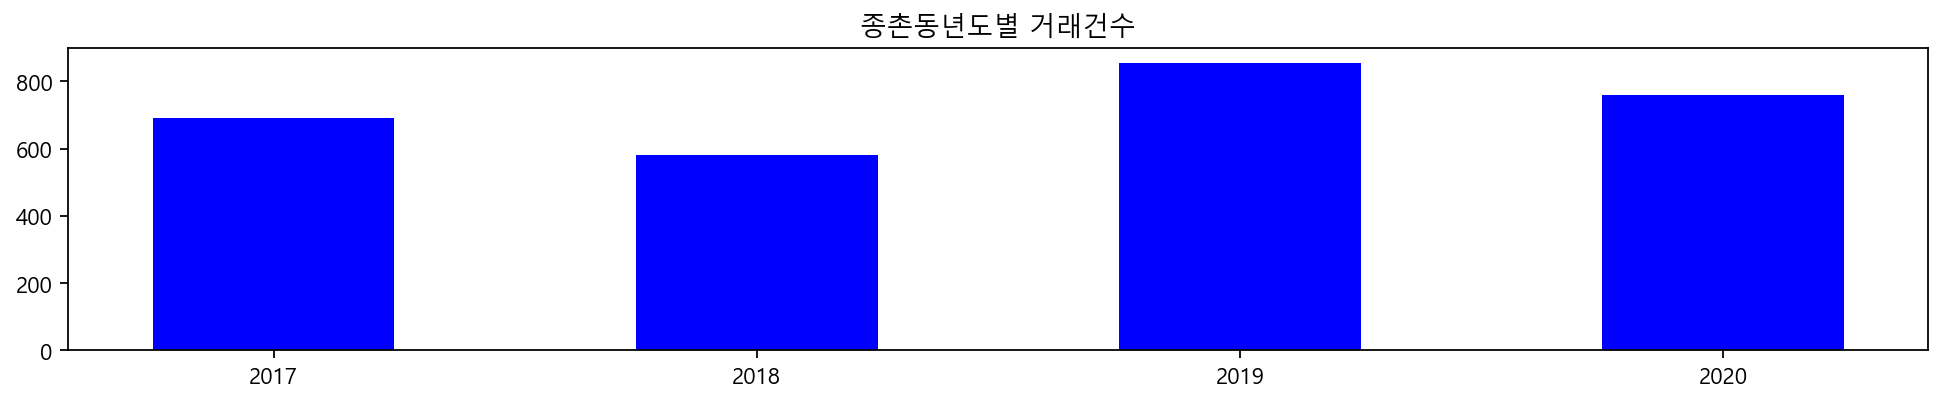

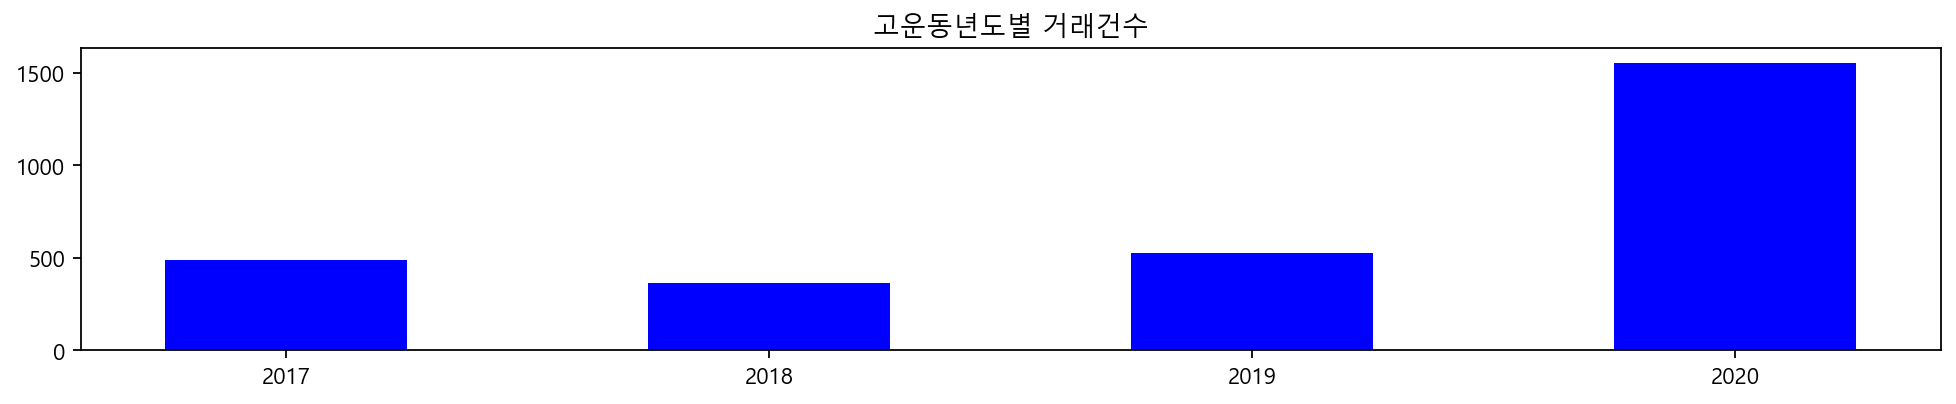

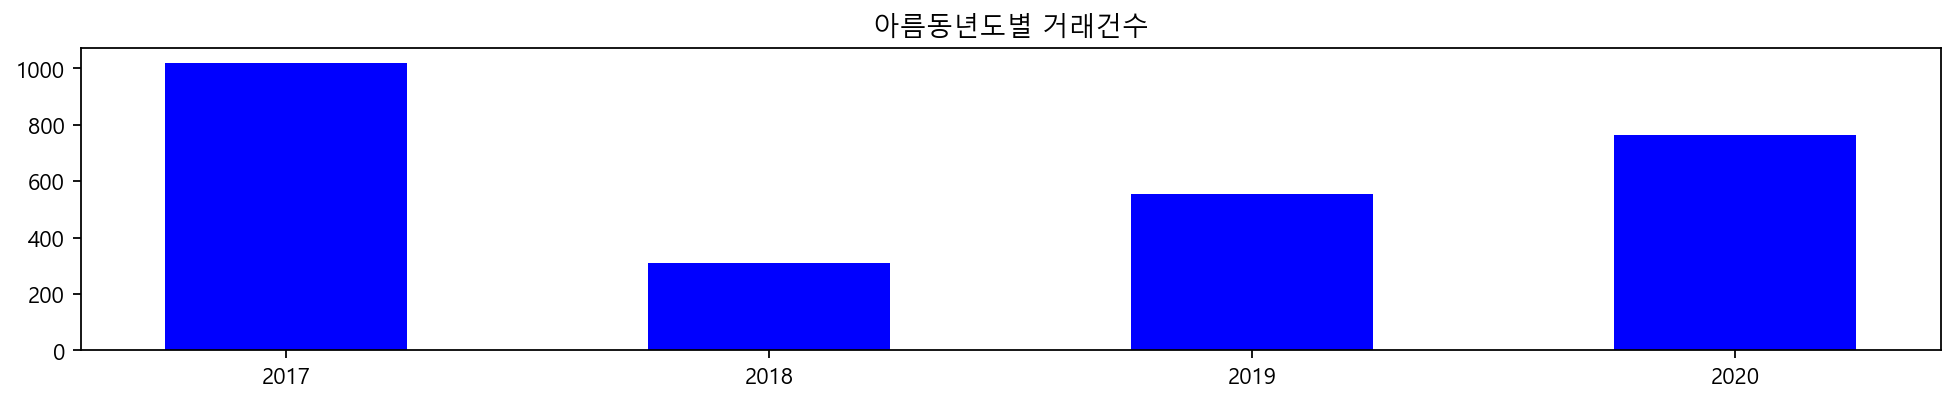

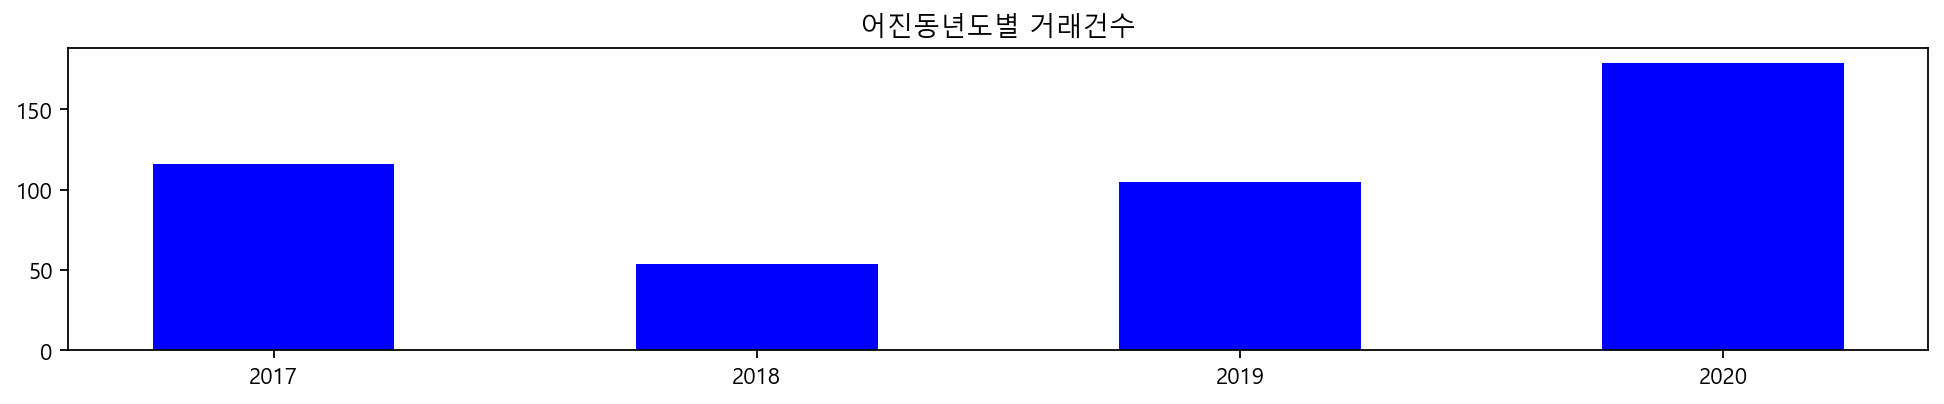

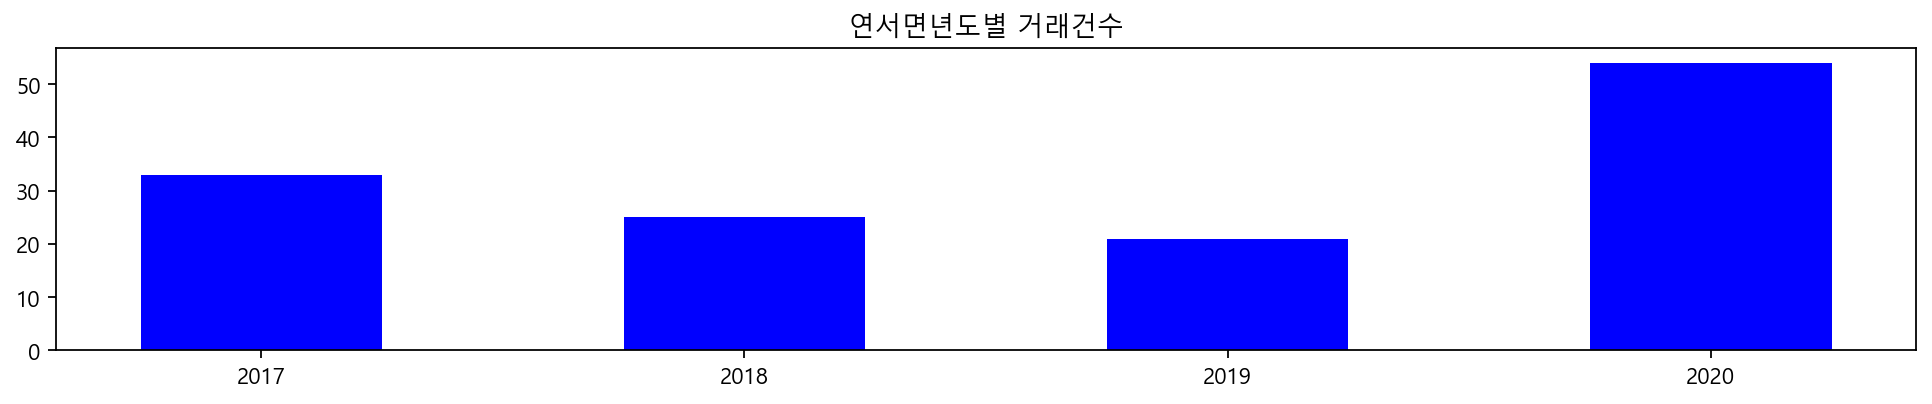

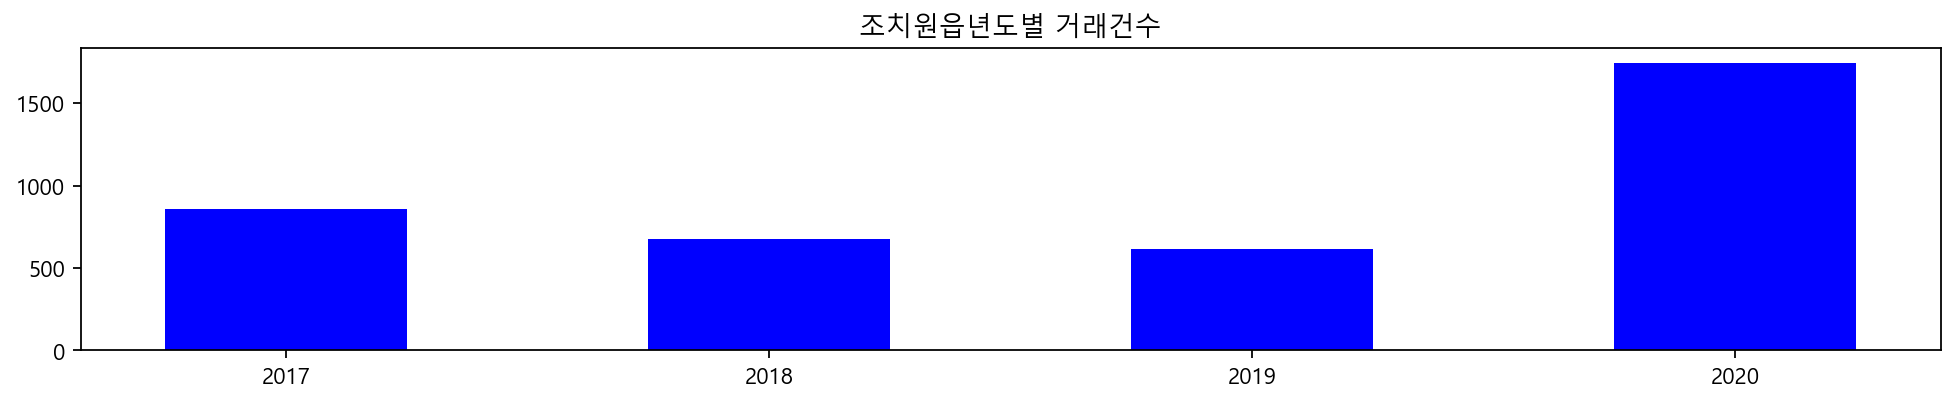

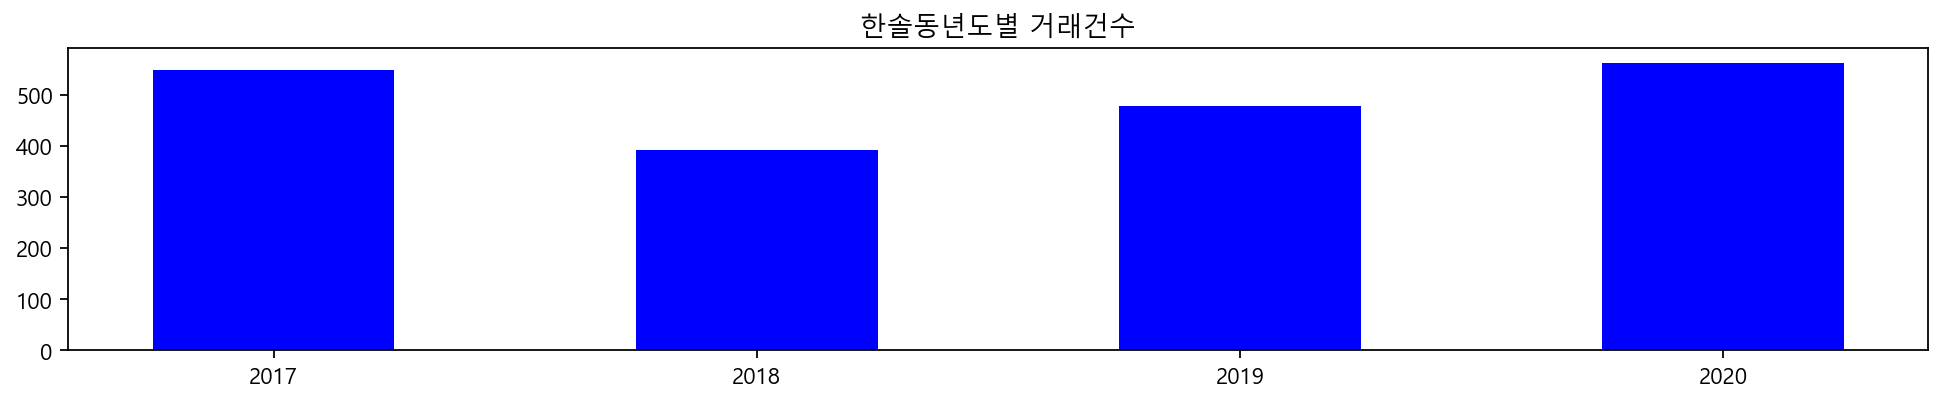

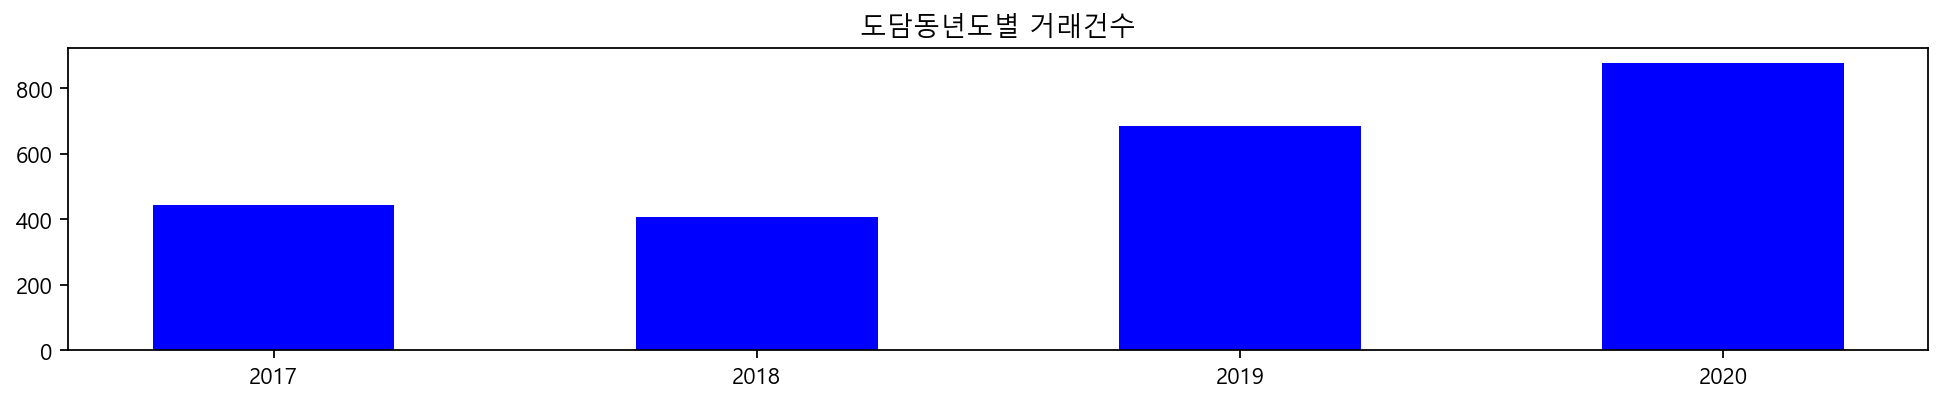

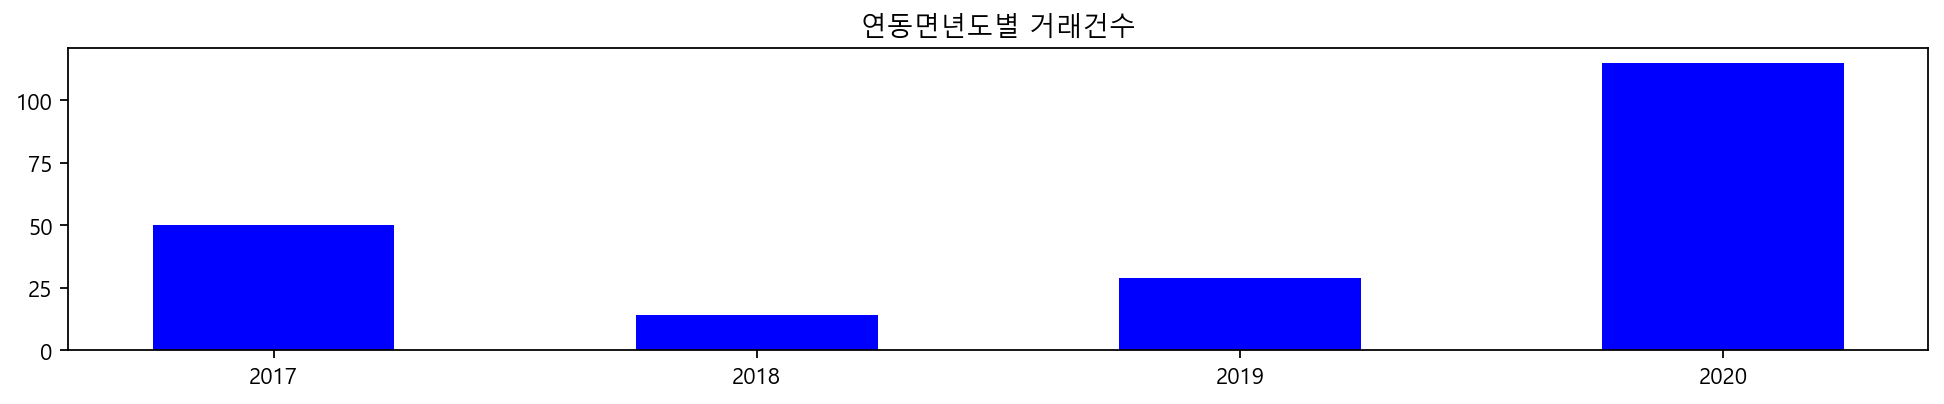

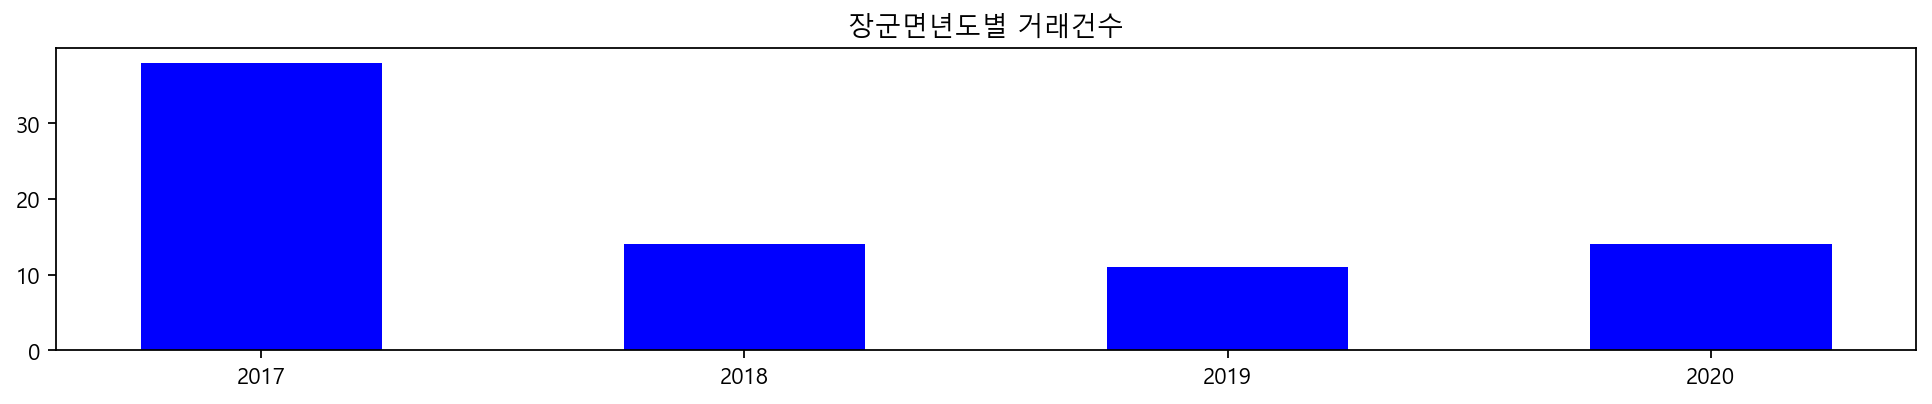

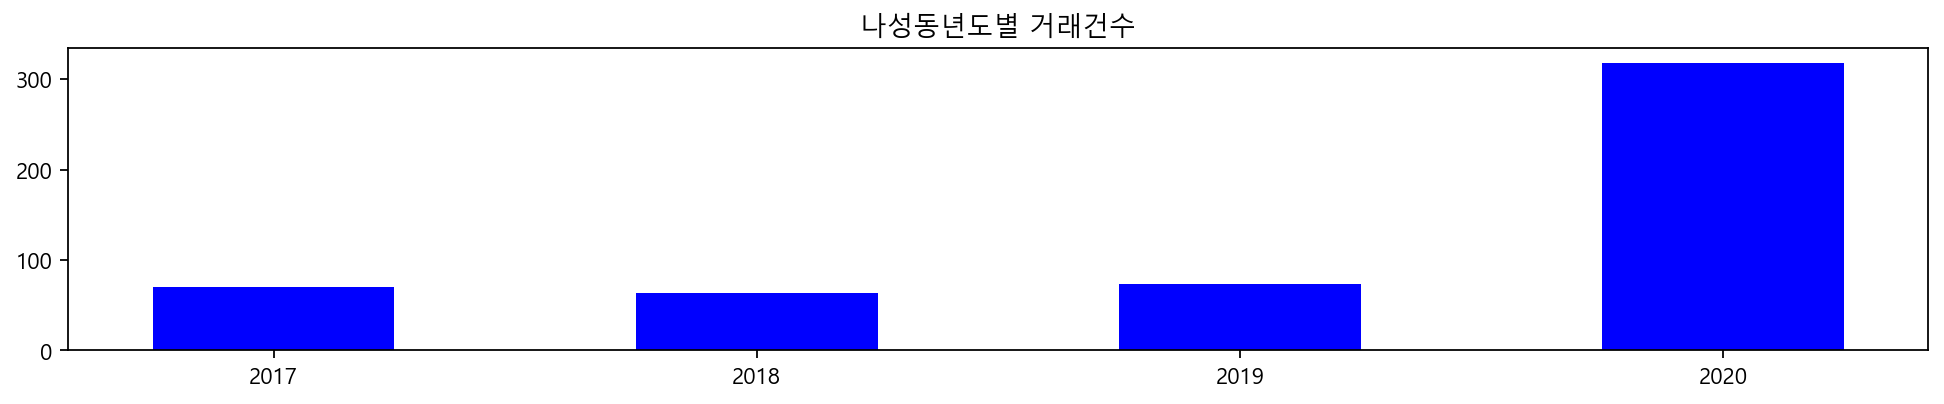

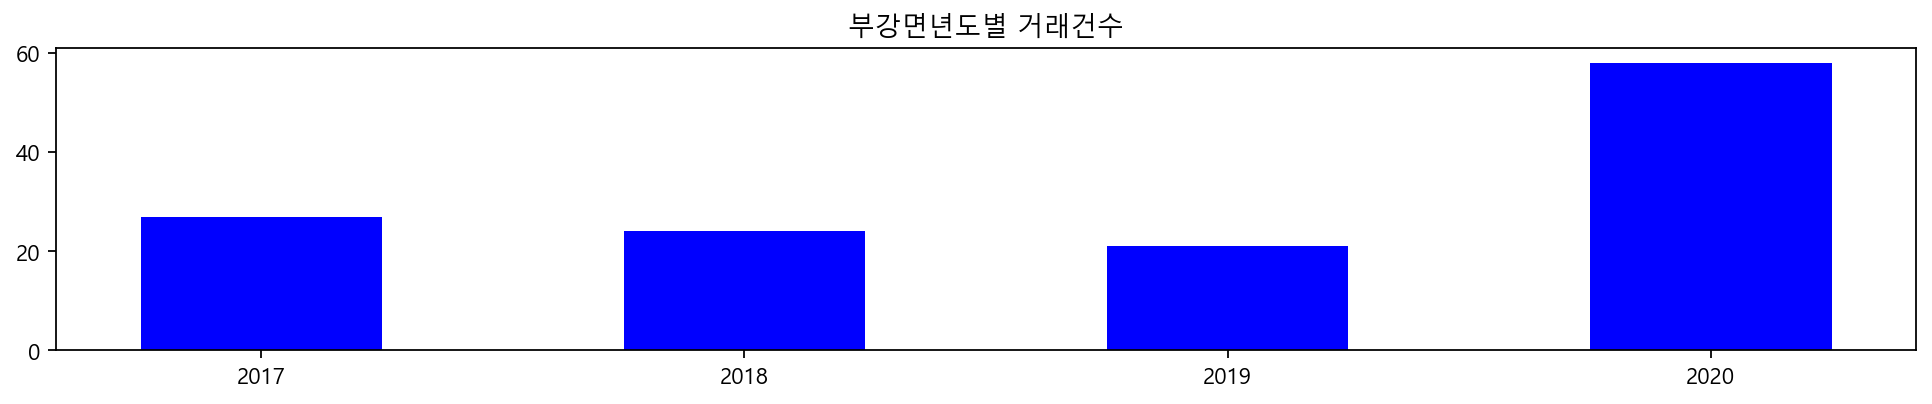

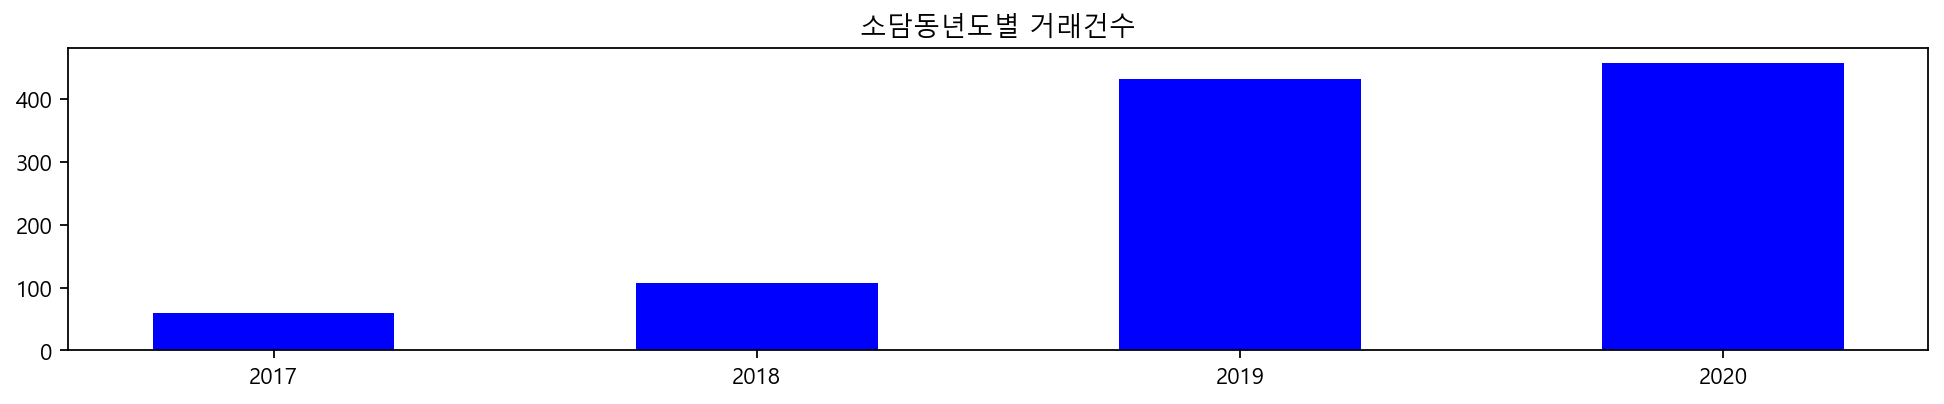

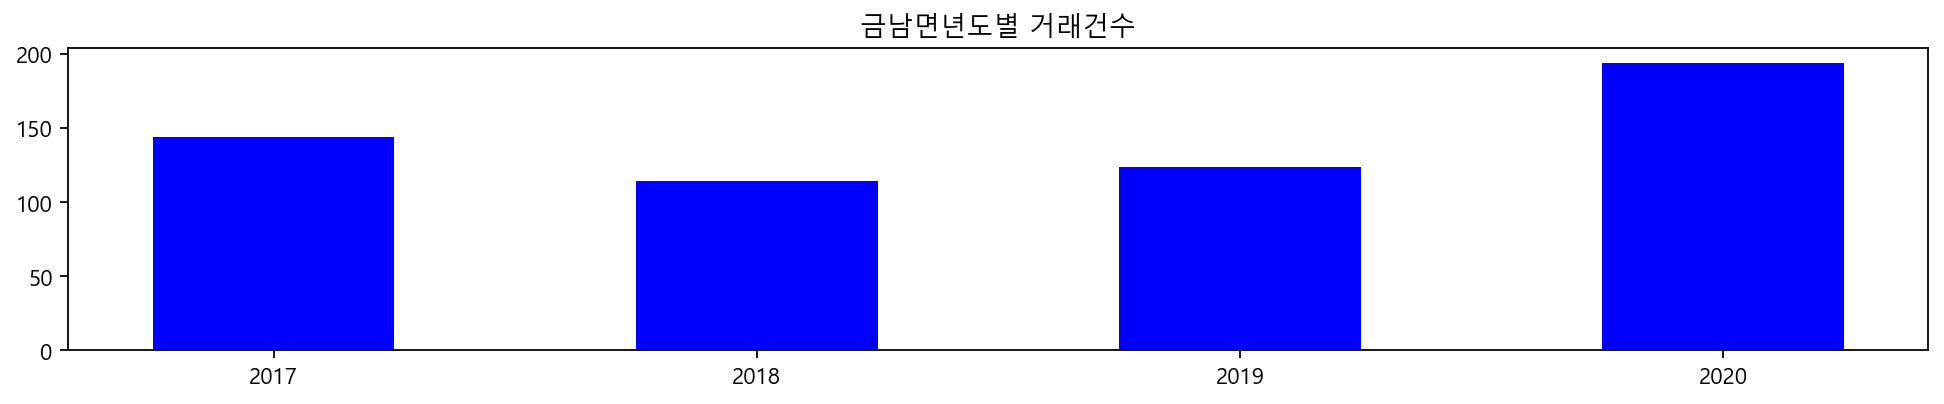

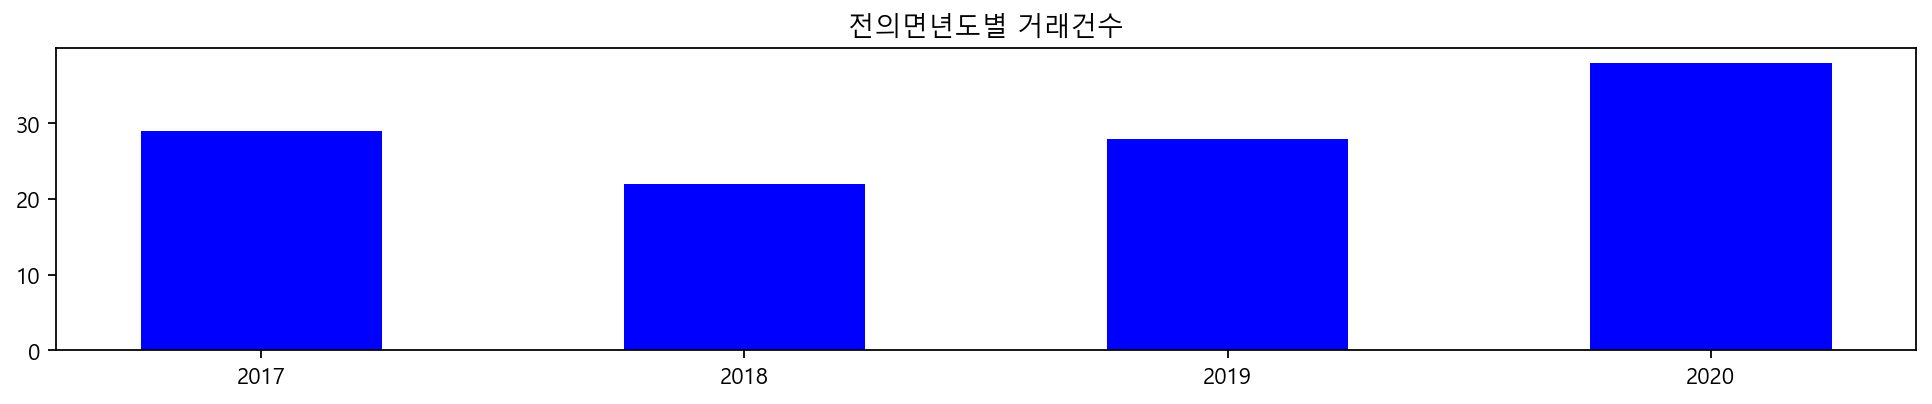

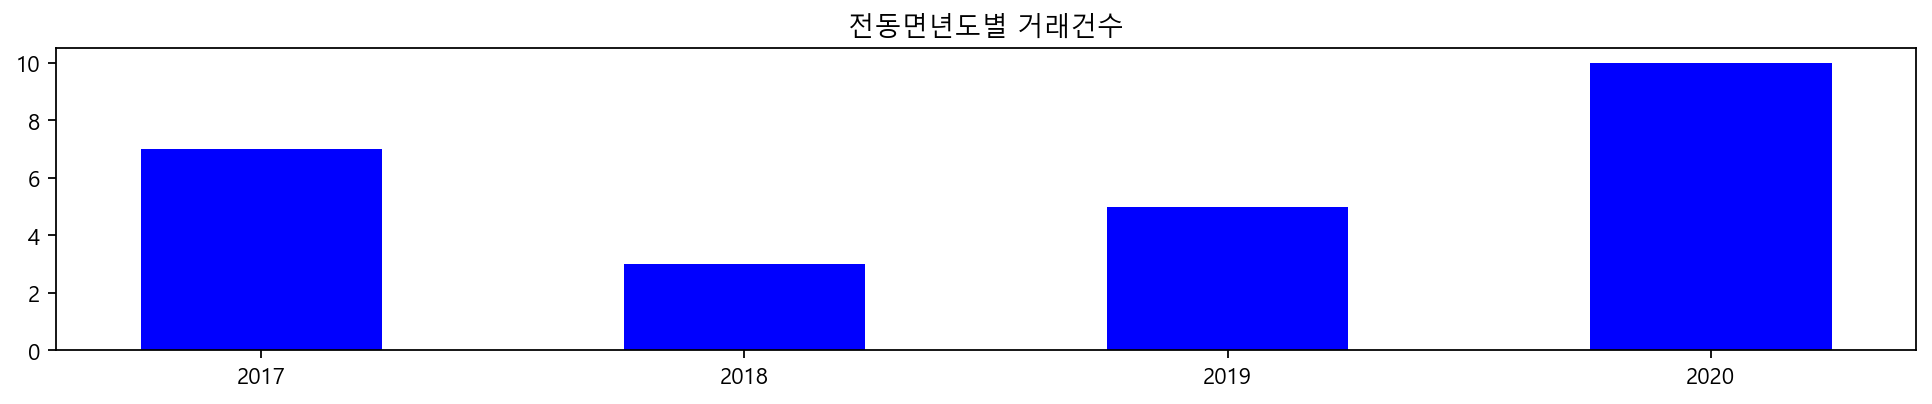

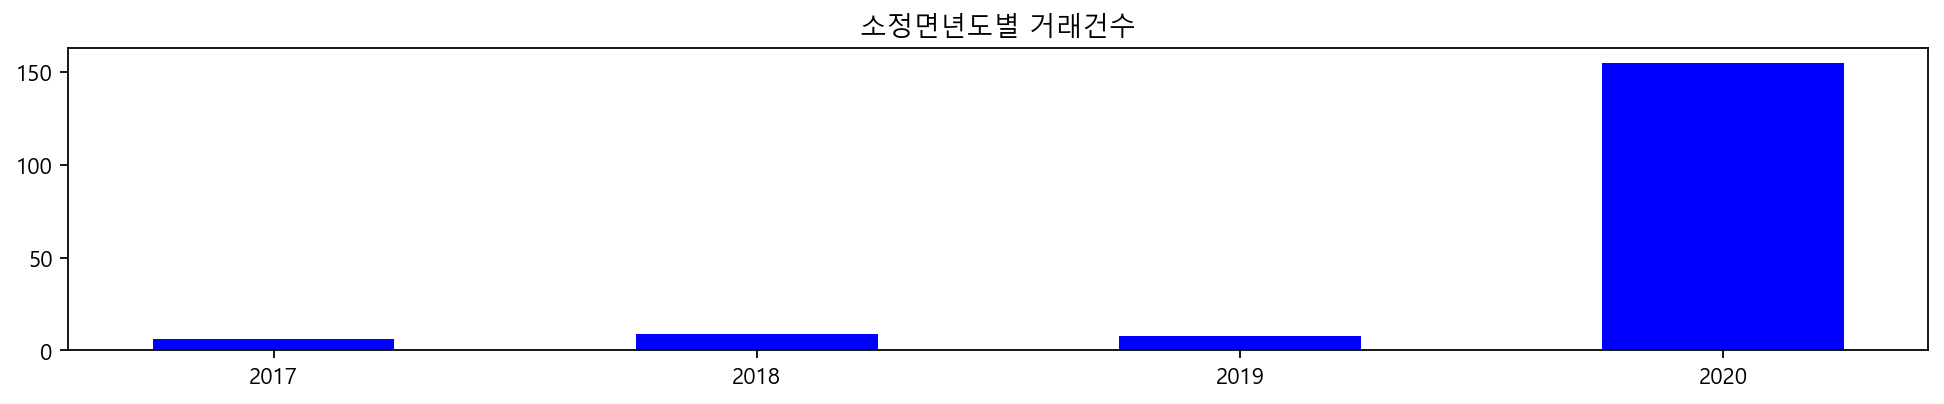

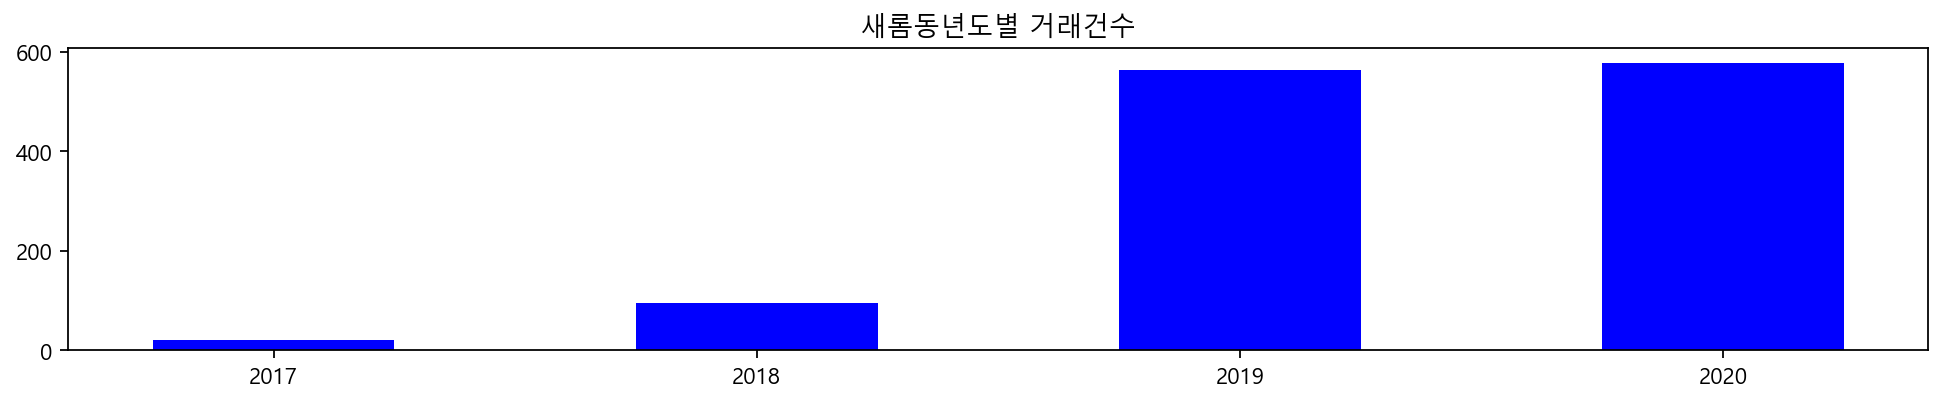

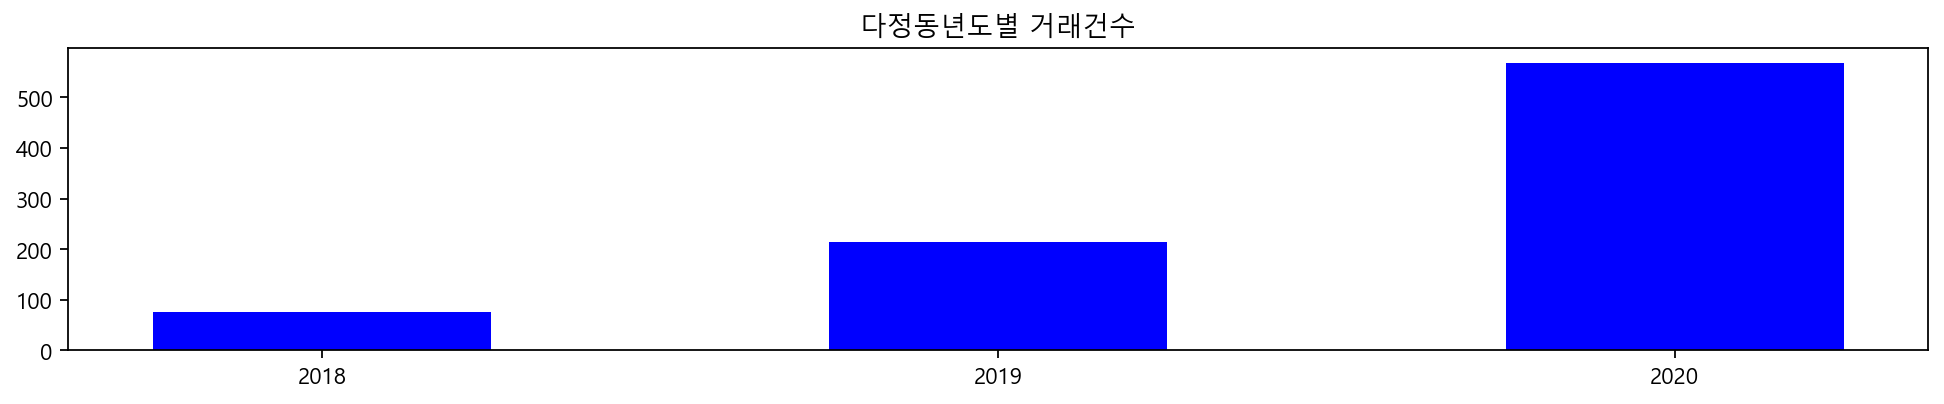

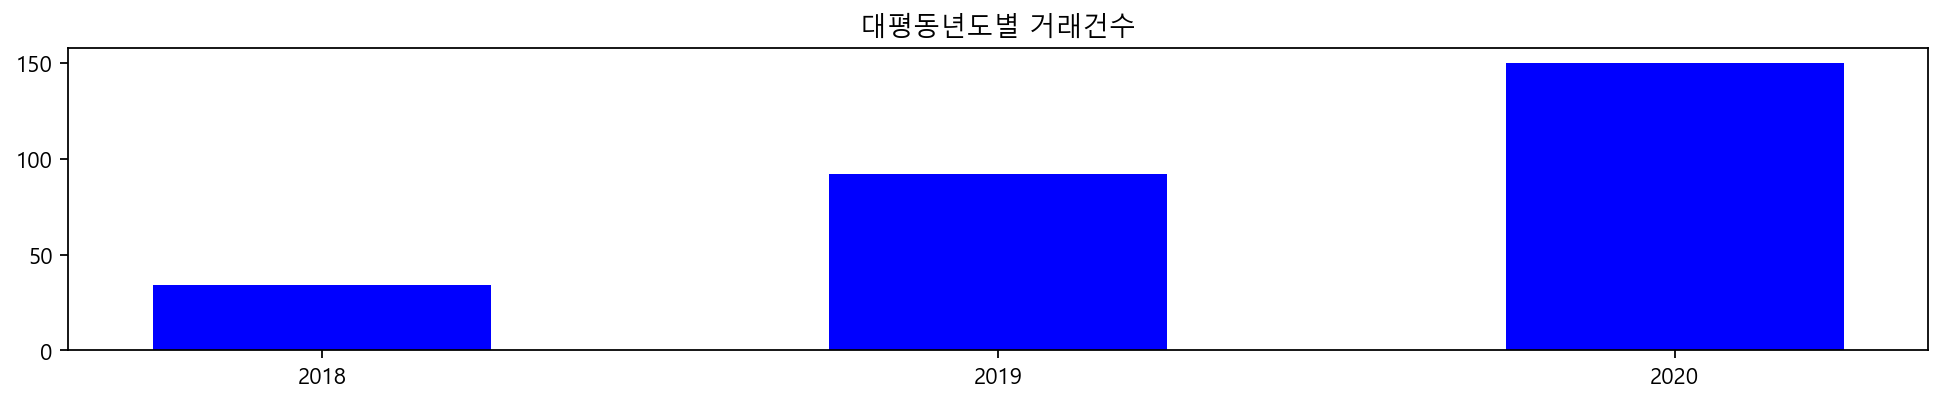

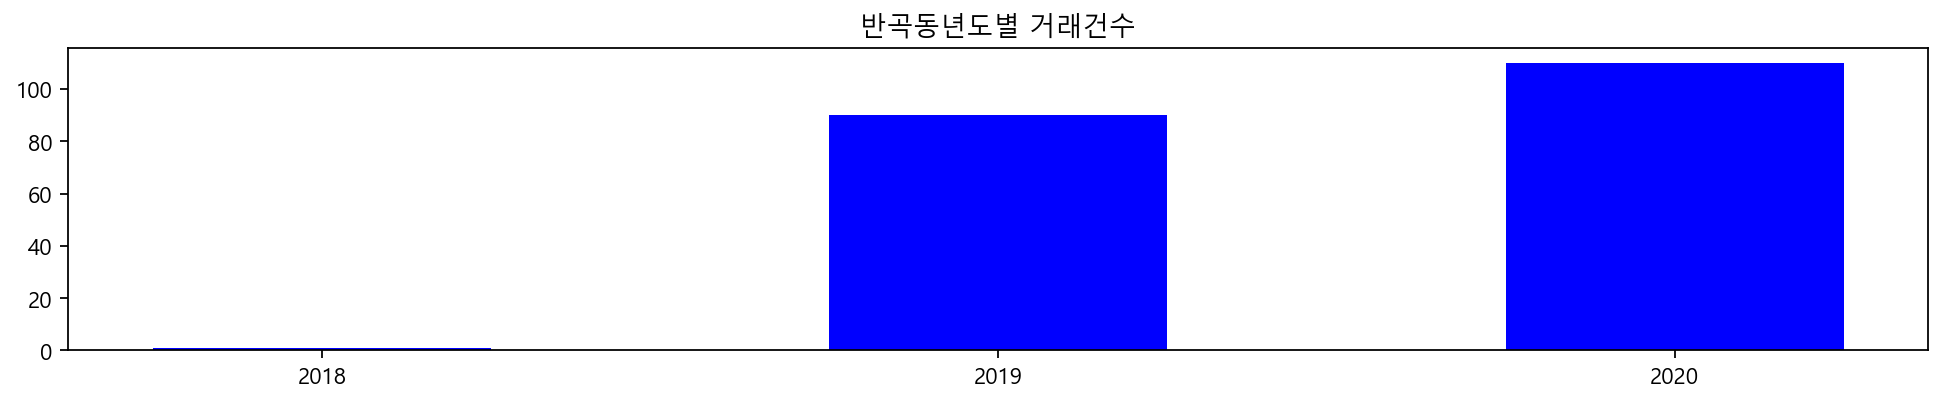

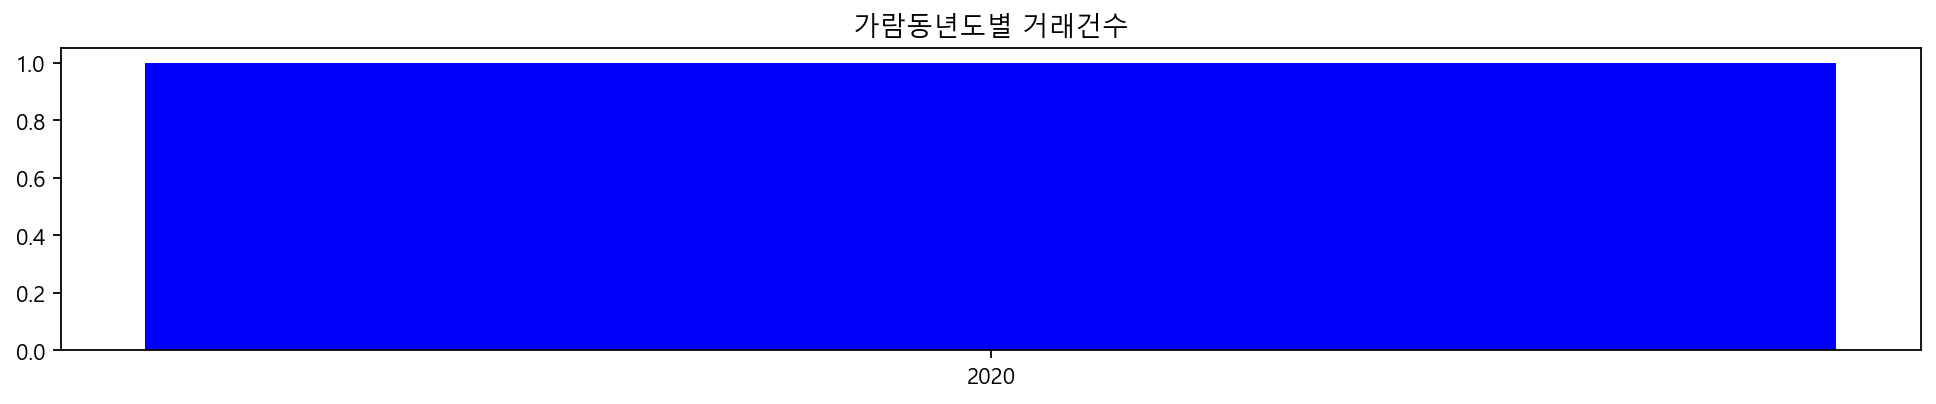

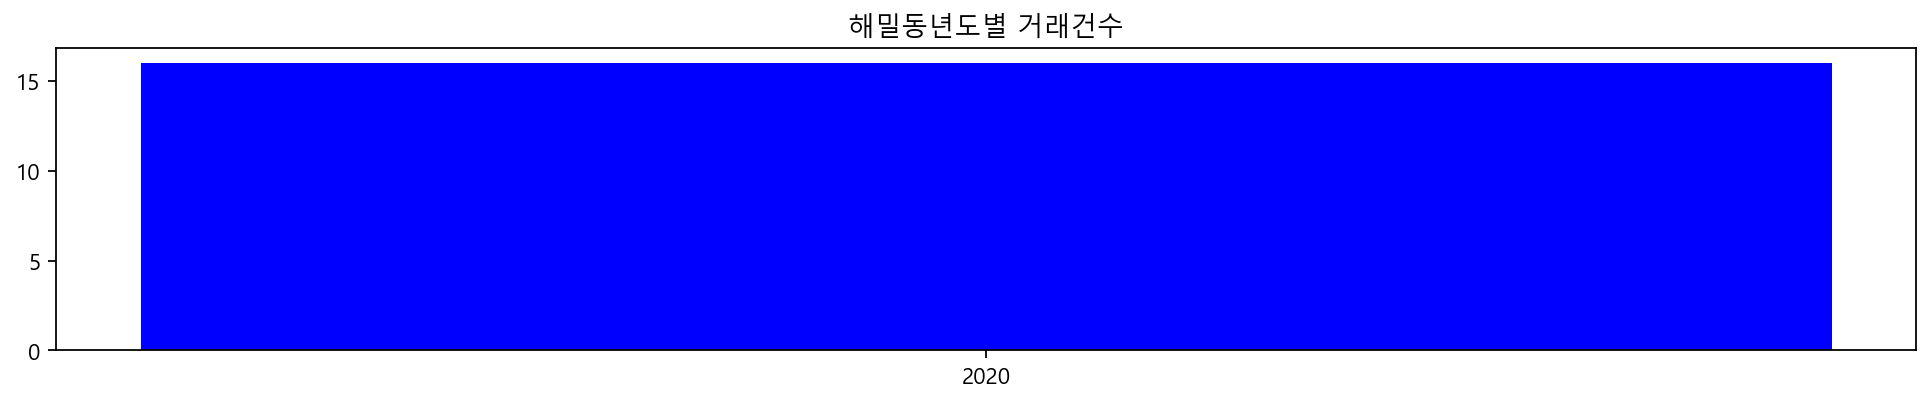

In [9]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'년도별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [10]:
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)

In [11]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

In [12]:
yata = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')
yata["평"]=yata["전용면적(㎡)"].apply(pyeong)

In [13]:
danta = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')
danta["평"]=danta["연면적(㎡)"].apply(pyeong)

In [14]:
oata = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')
oata["평"]=oata["전용면적(㎡)"].apply(pyeong)

In [15]:
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

In [16]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

In [17]:
yata_jeon = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
yata_jeon["평"]=yata_jeon["전용면적(㎡)"].apply(pyeong)

In [18]:
danta_jeon = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
danta_jeon["평"]=danta_jeon["계약면적(㎡)"].apply(pyeong)

In [19]:
oata_jeon = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')
oata_jeon["평"]=oata_jeon["전용면적(㎡)"].apply(pyeong)

In [20]:
data_all = pd.concat([data,yata,danta,oata,data_jeon,yata_jeon,danta_jeon,oata_jeon], ignore_index=True)

In [21]:
data_all["읍면동"]=data_all['시군구'].apply(sort_dong2)

<ipython-input-22-4a5f3cbffe2a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


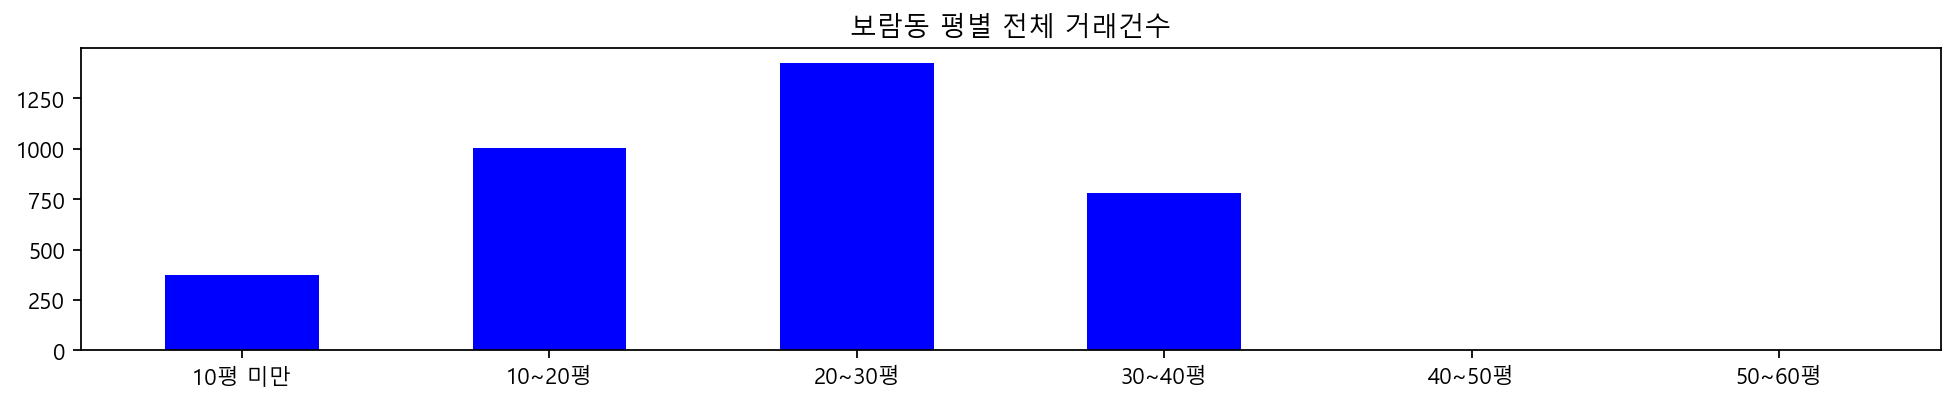

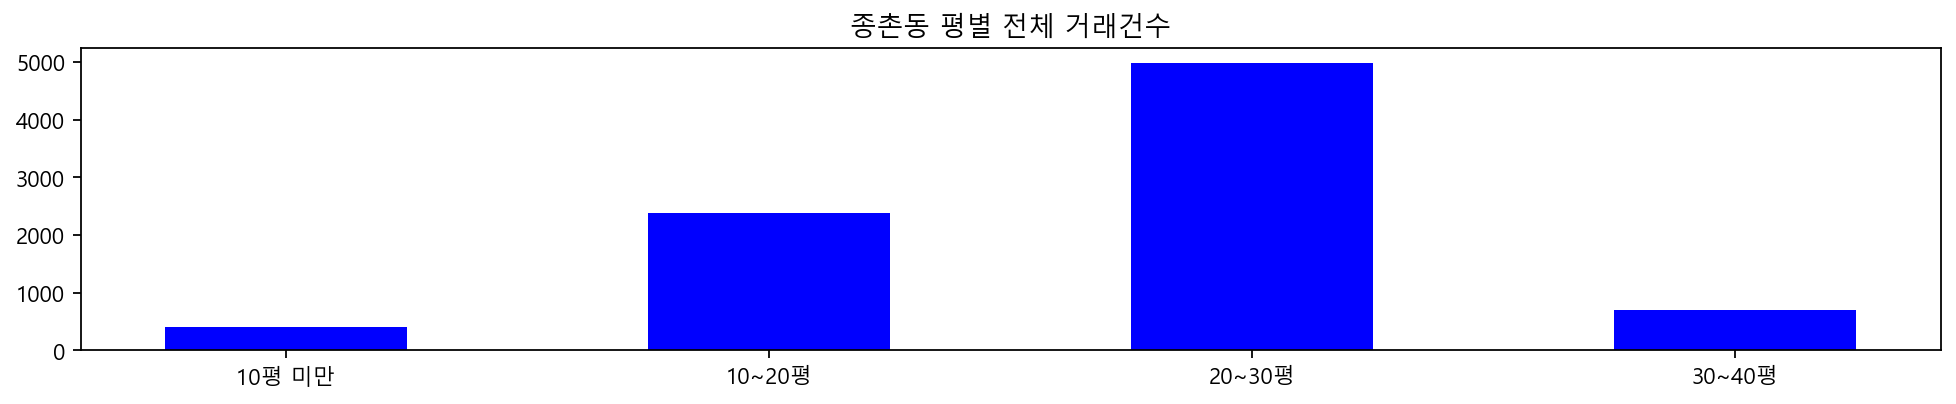

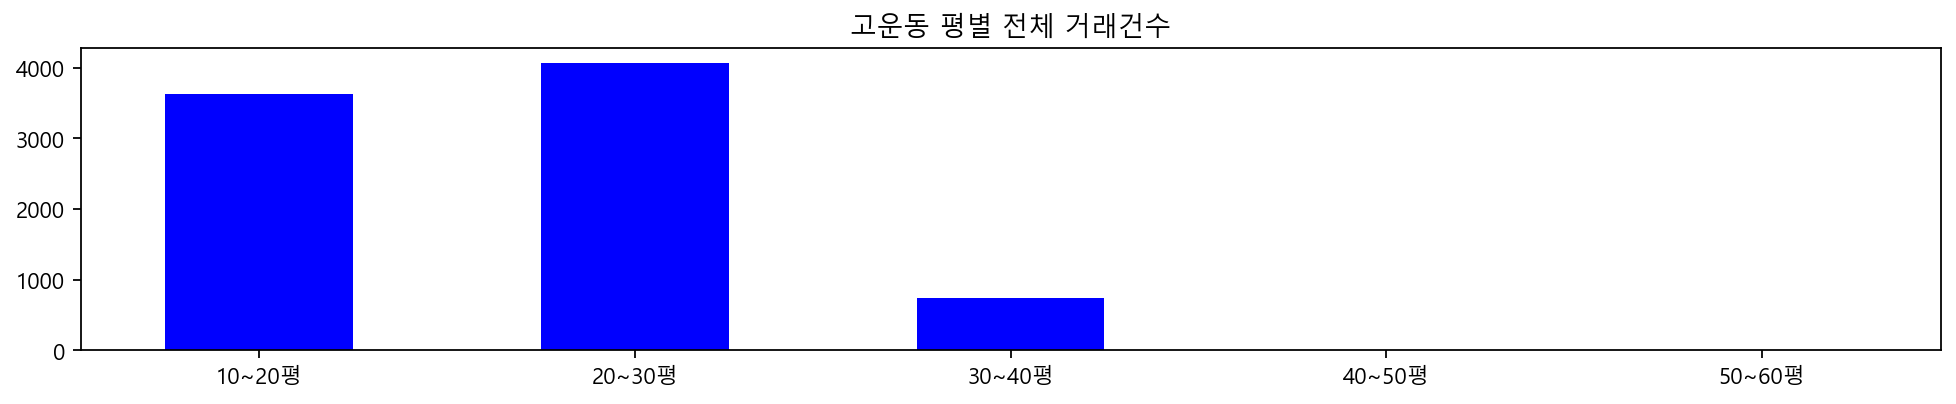

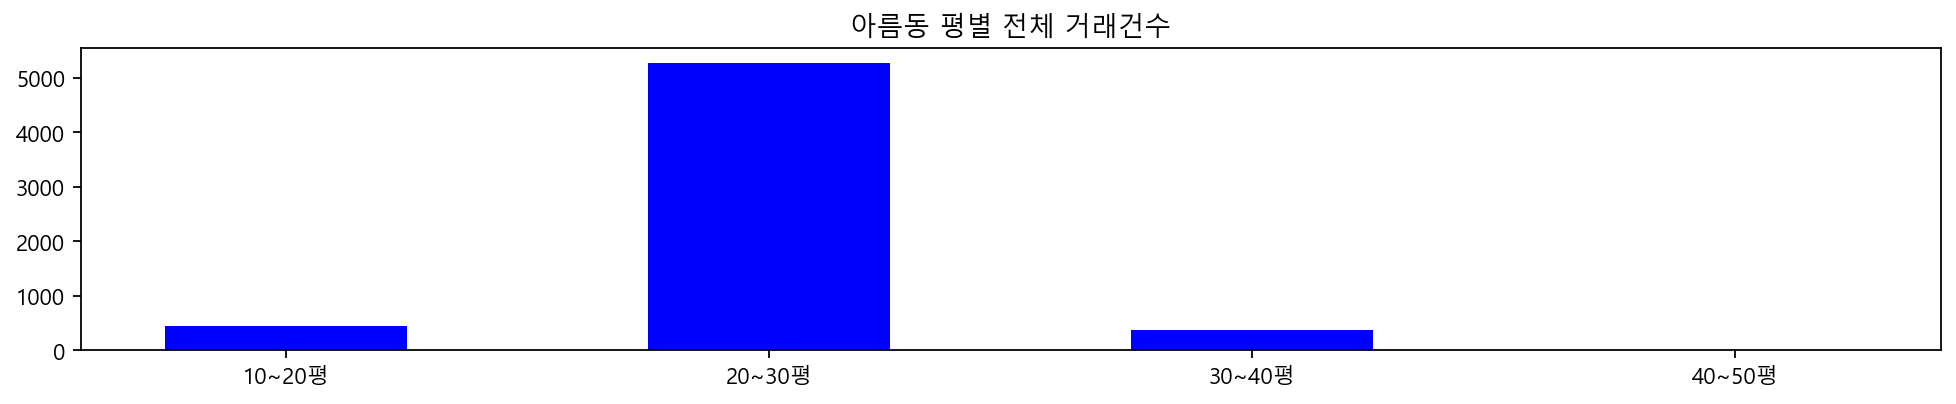

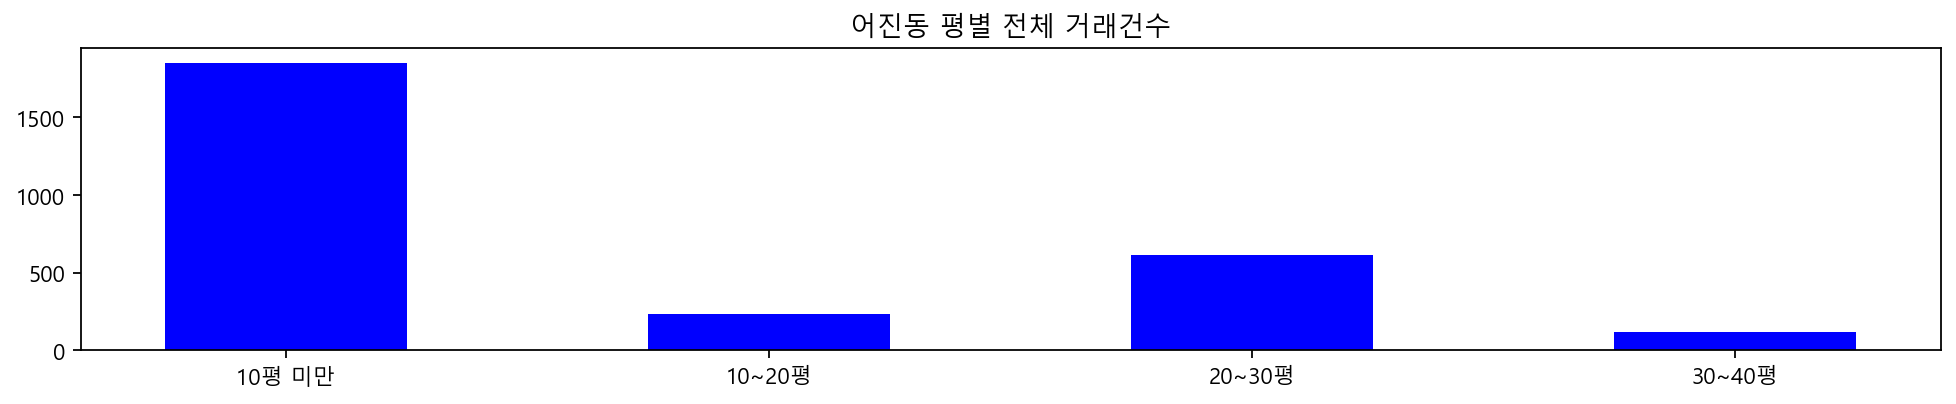

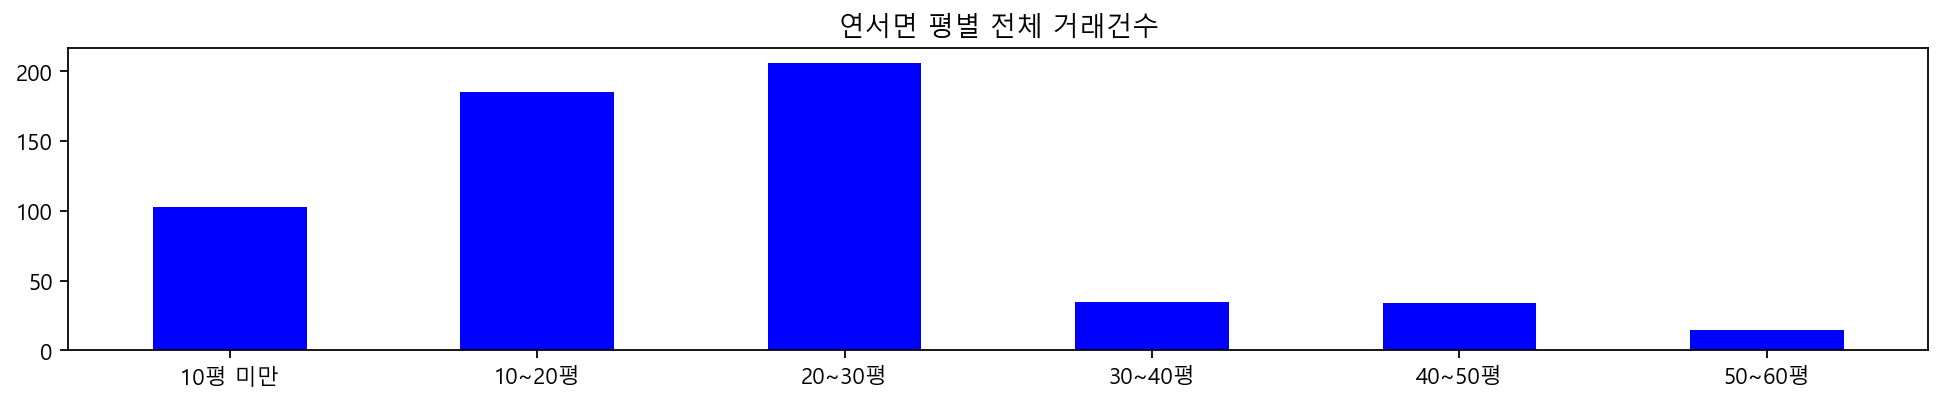

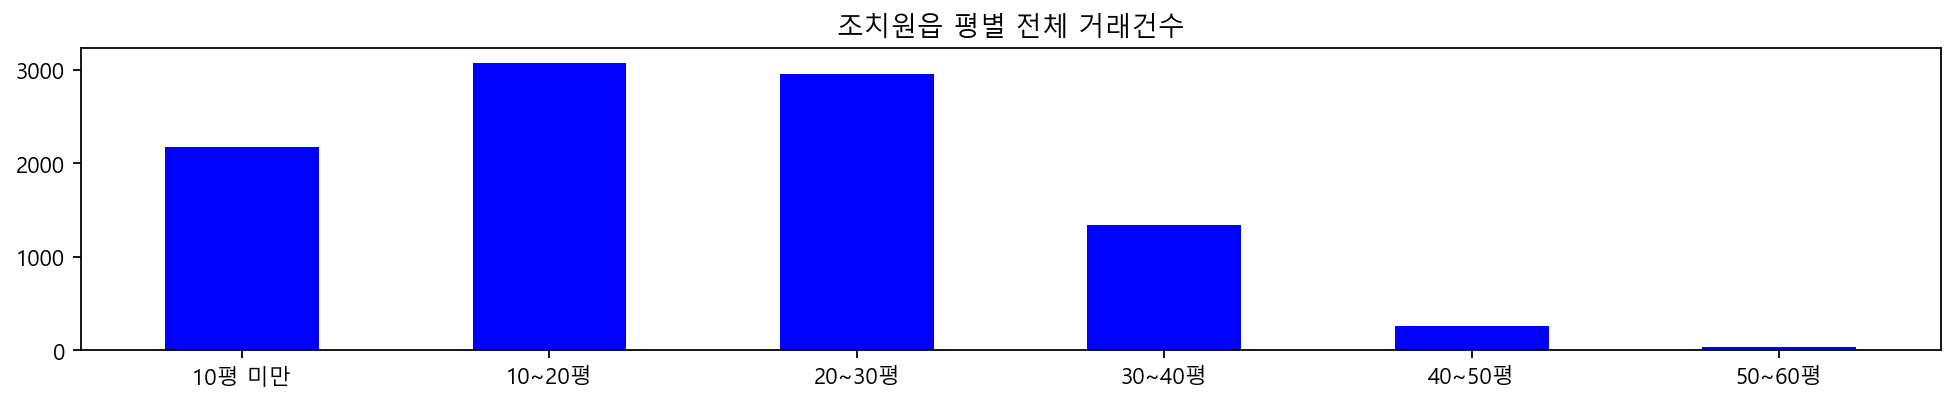

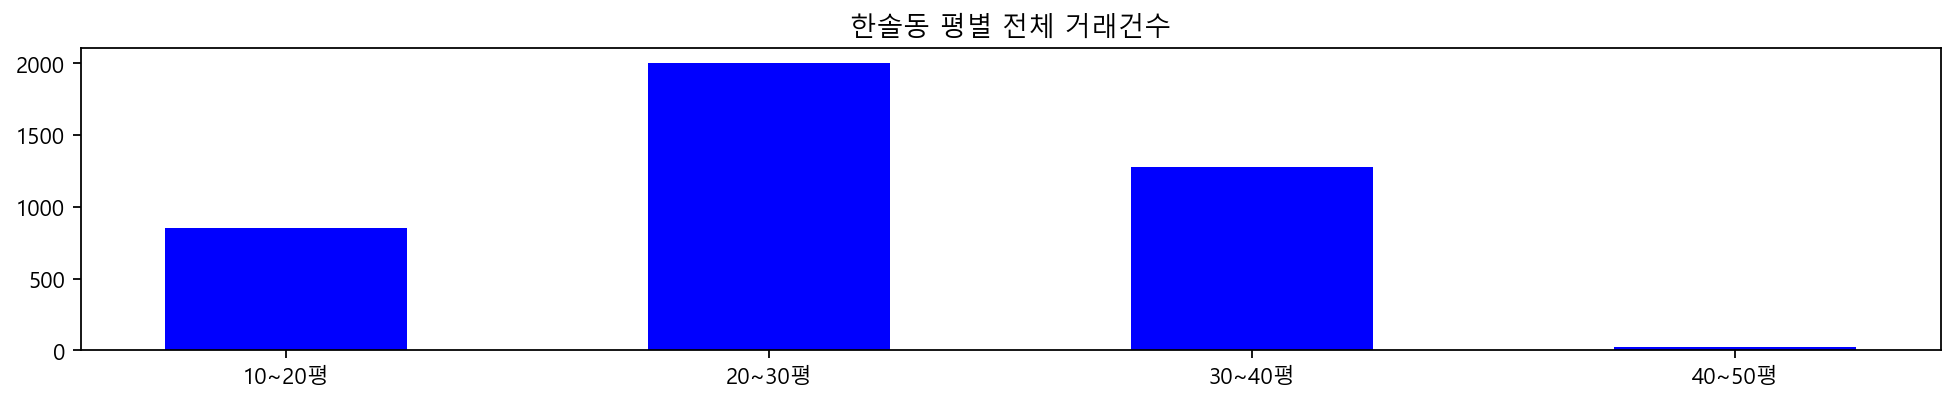

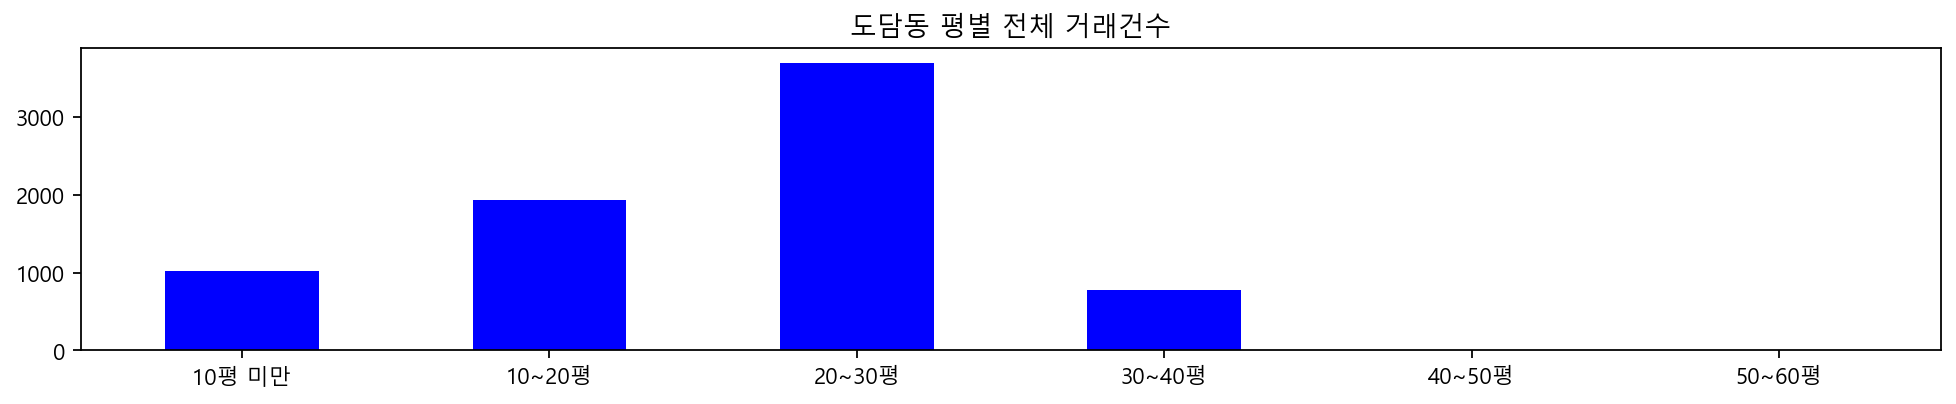

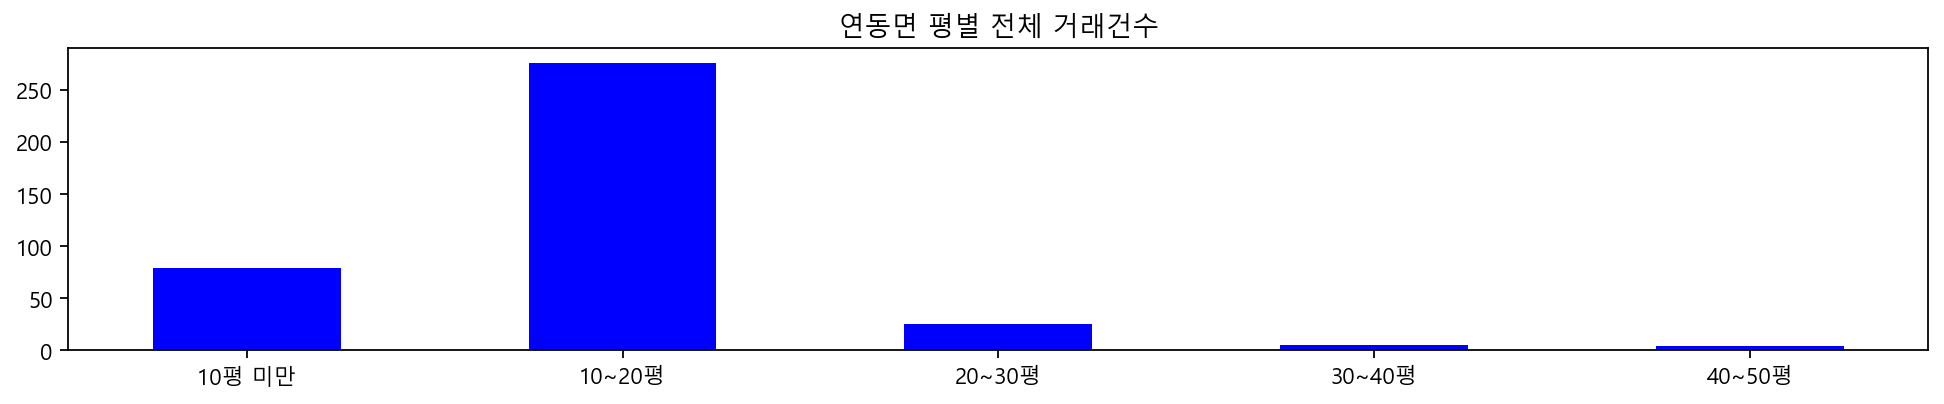

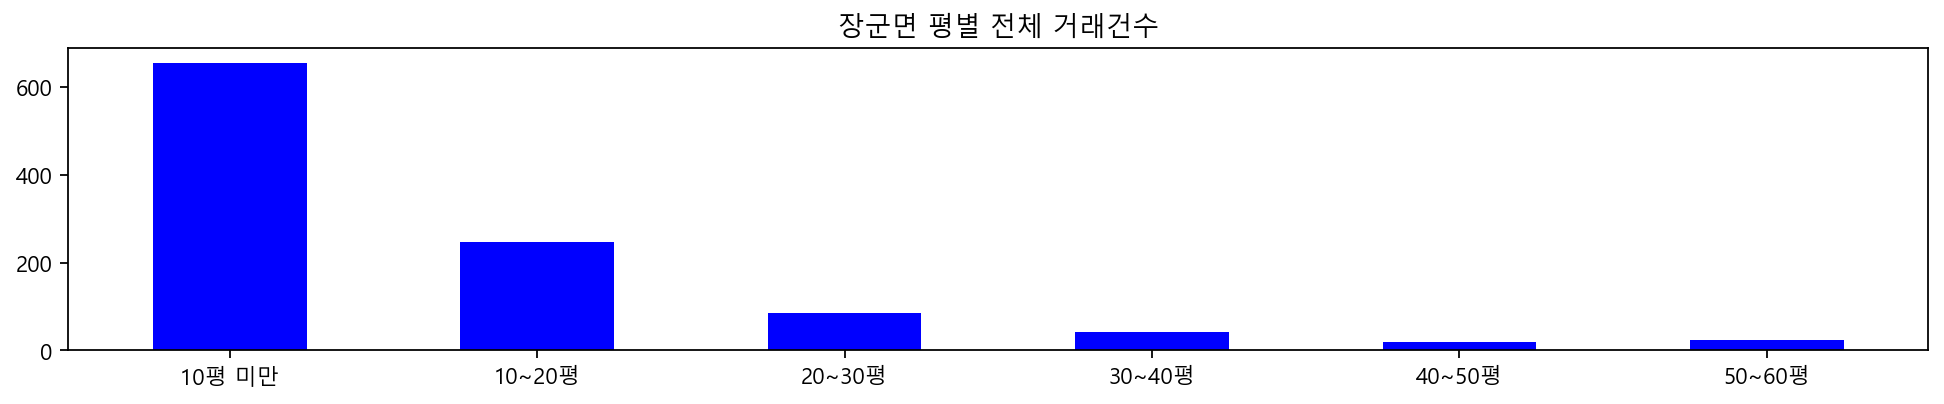

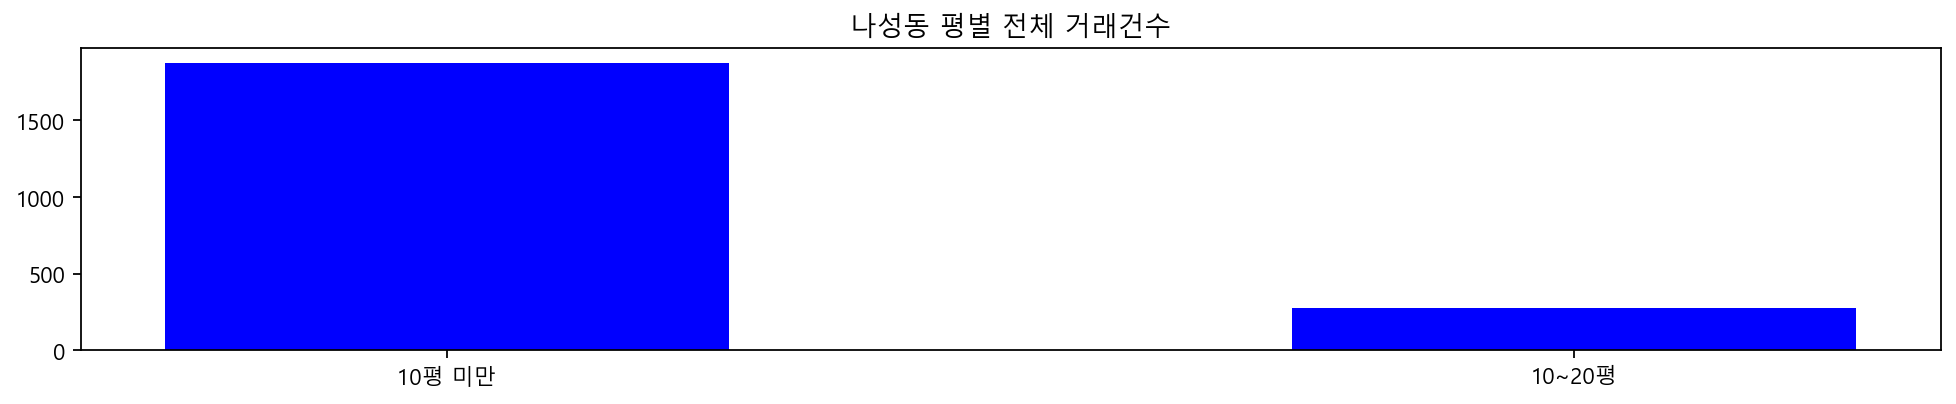

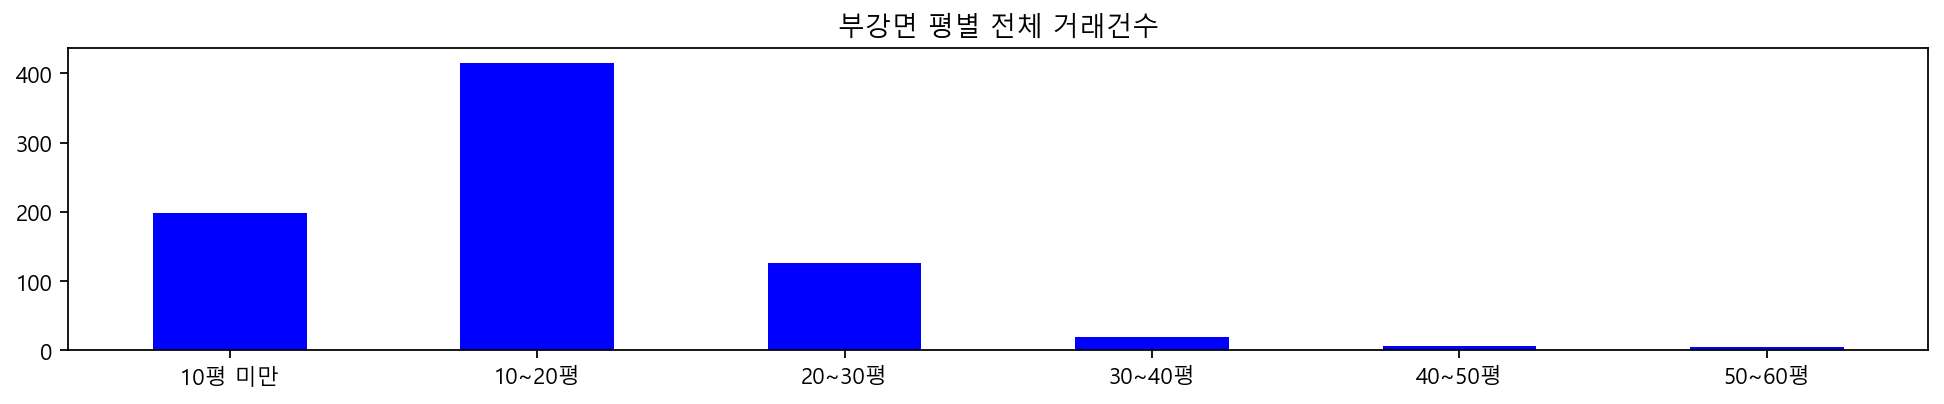

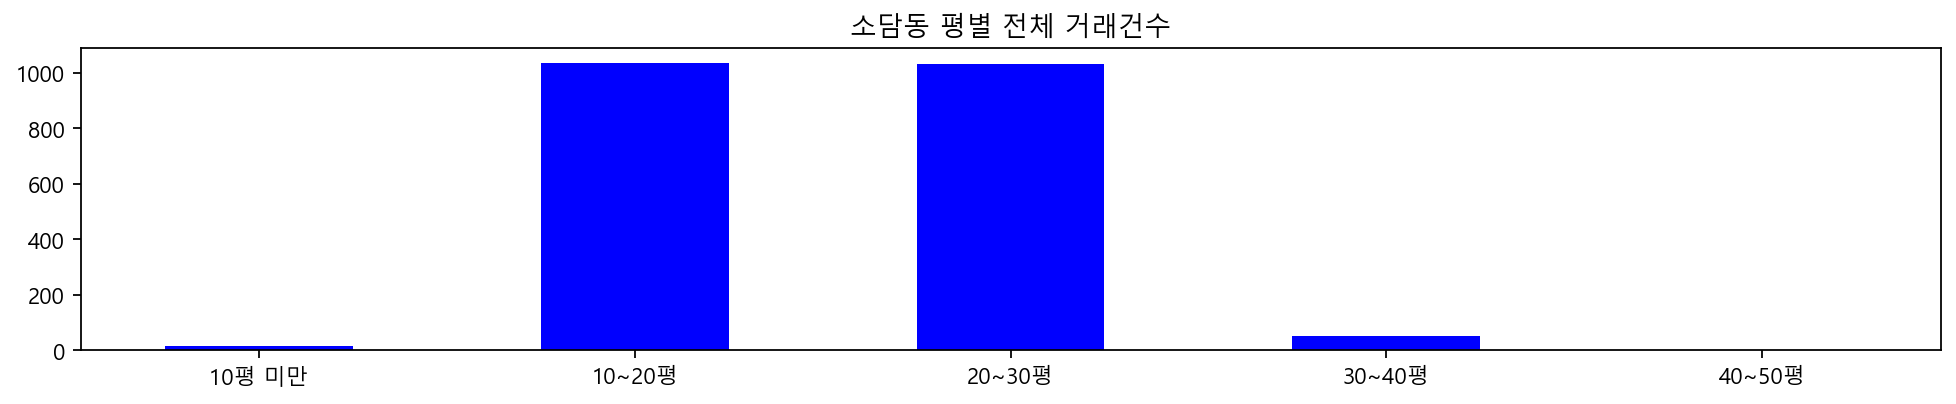

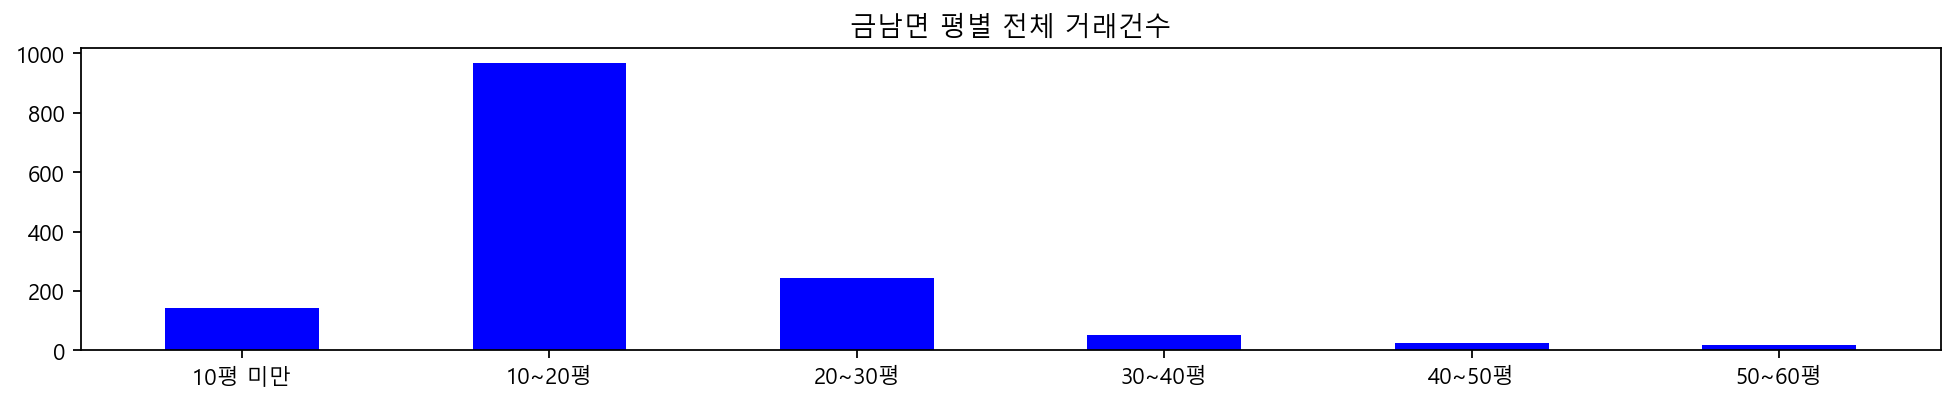

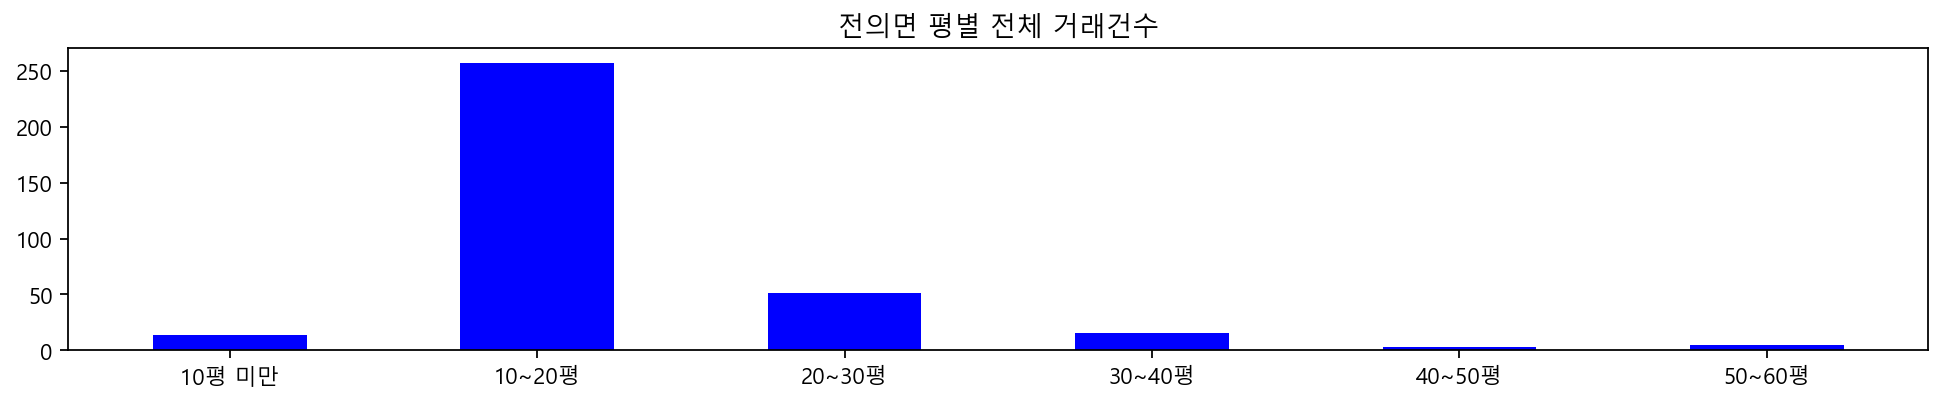

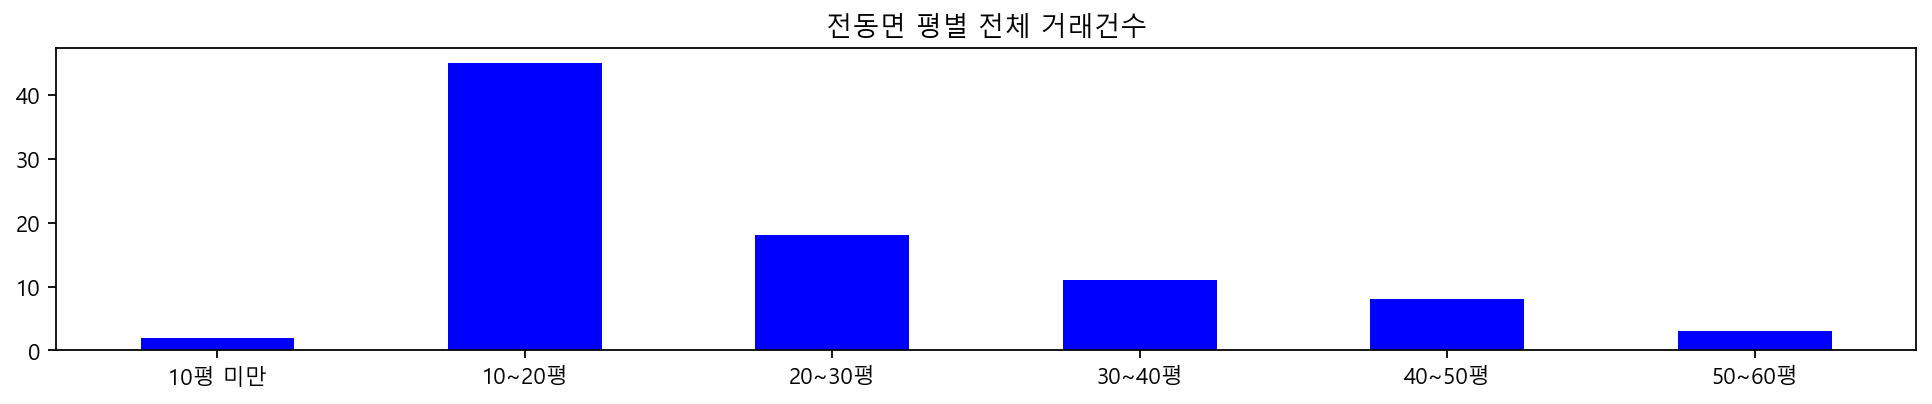

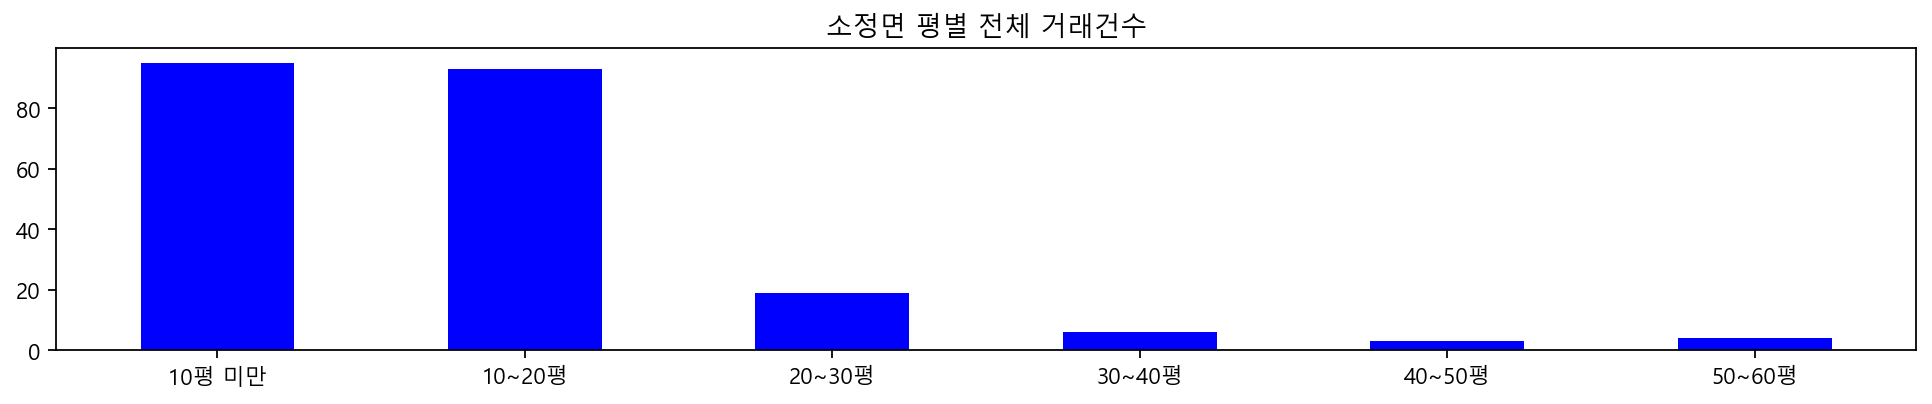

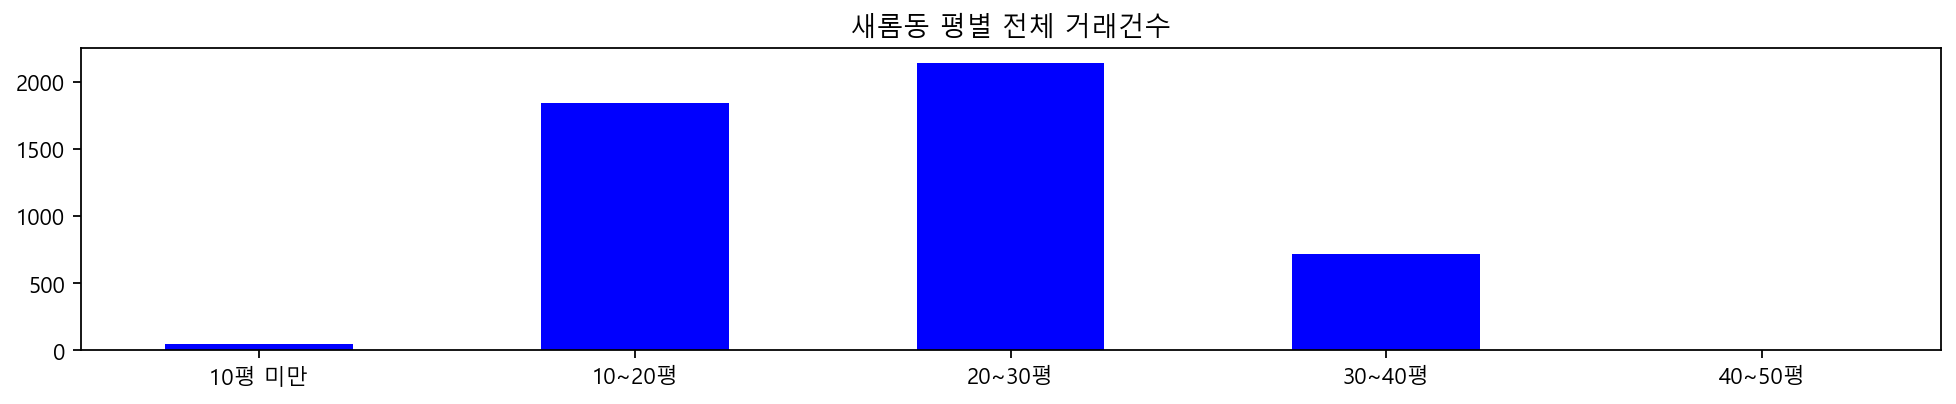

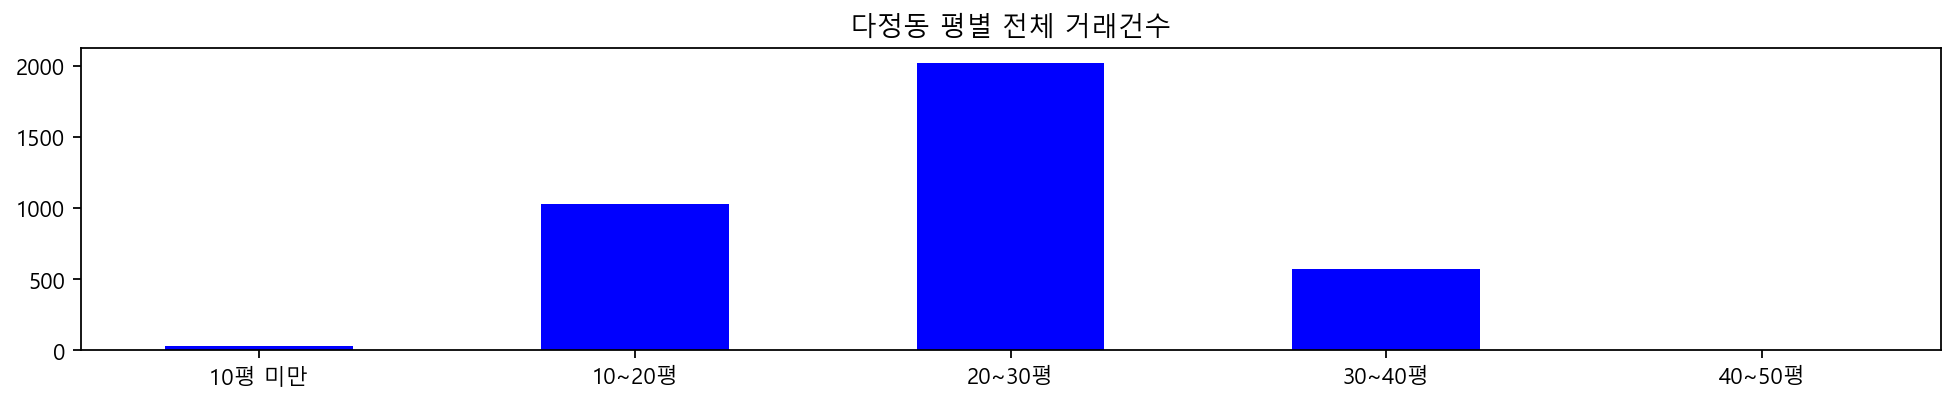

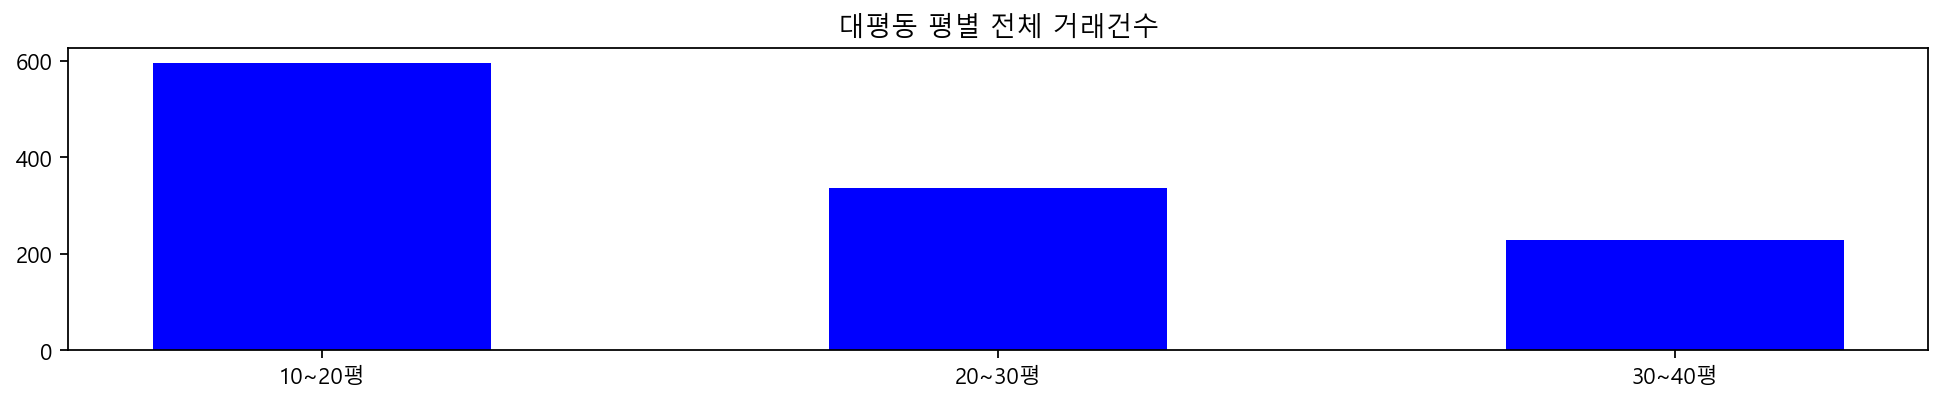

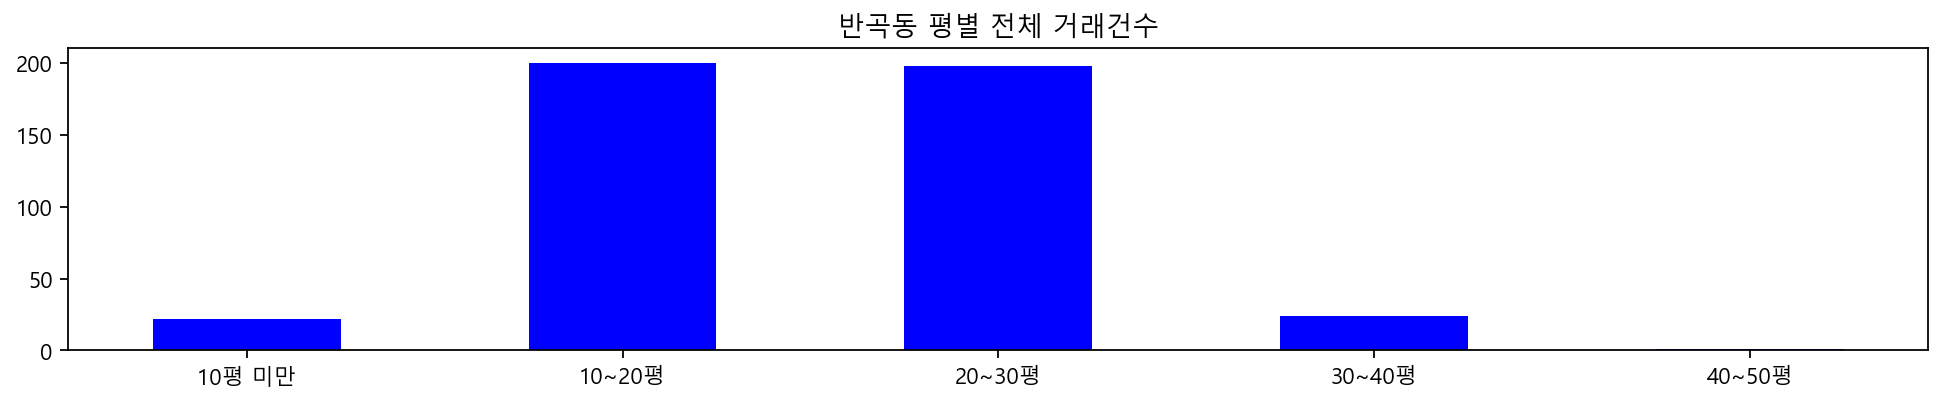

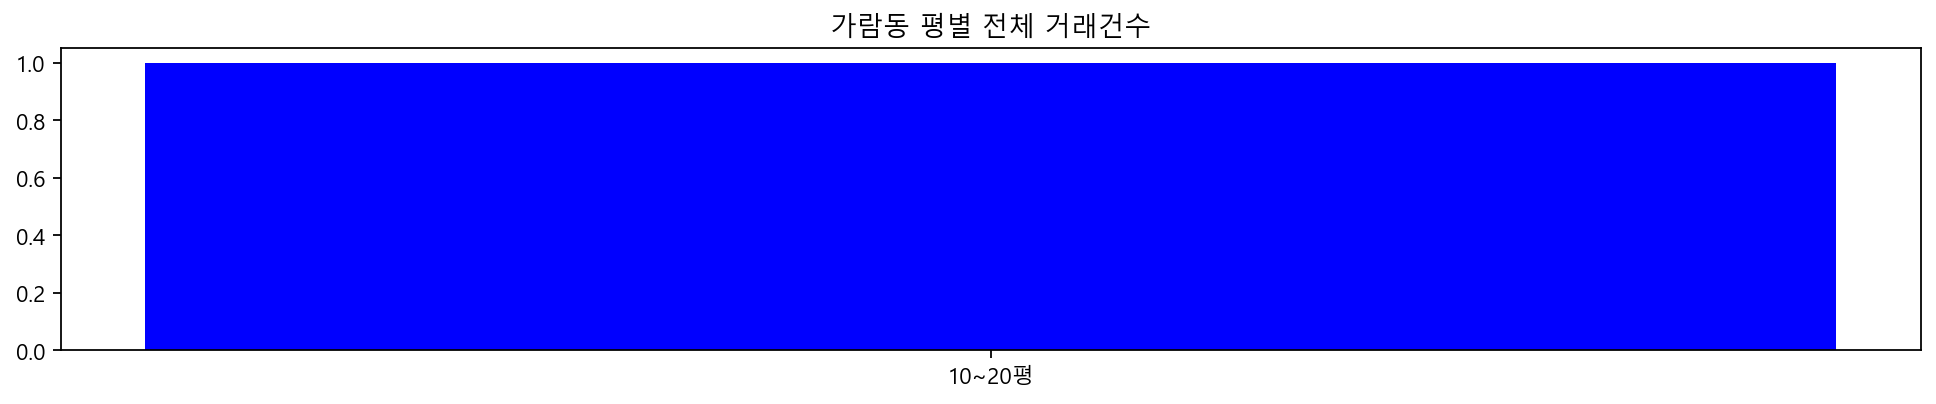

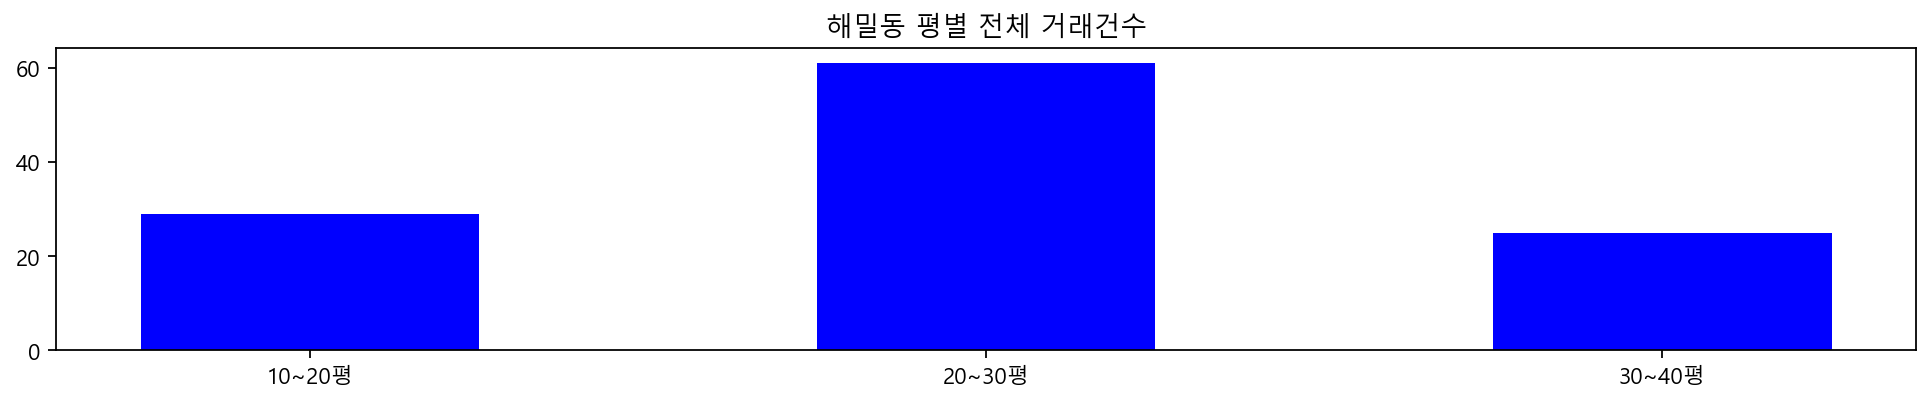

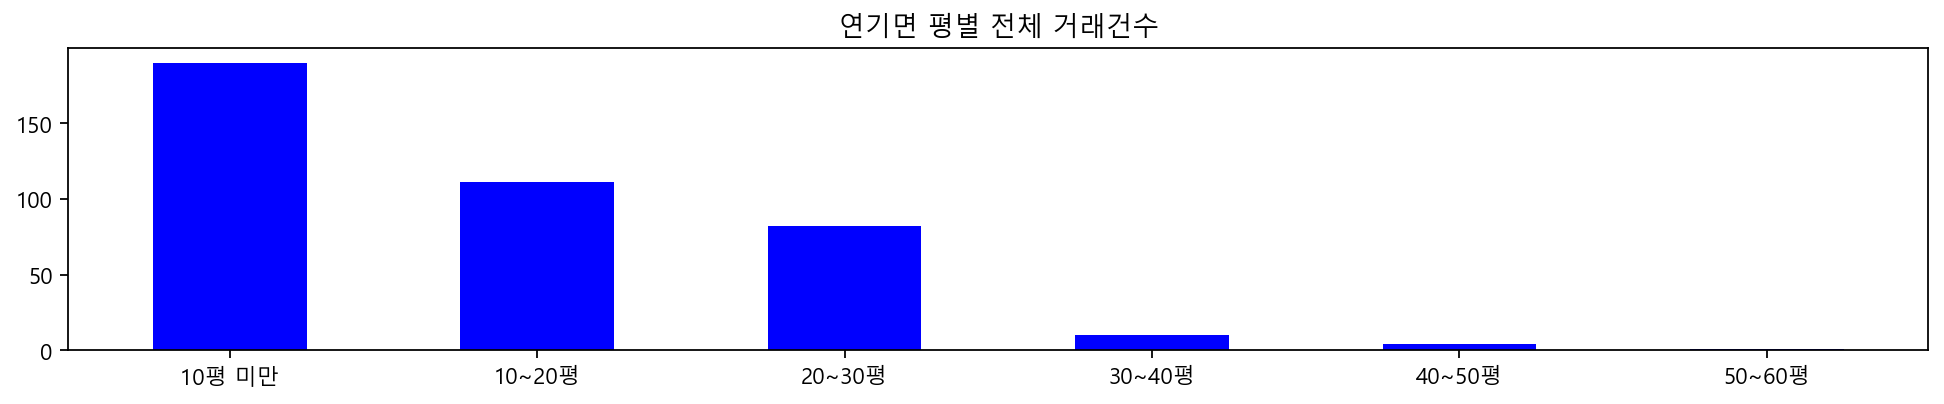

In [22]:
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data_all[data_all['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    group_new=group_new.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+' 평별 전체 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

<ipython-input-23-e62ab484c11b>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


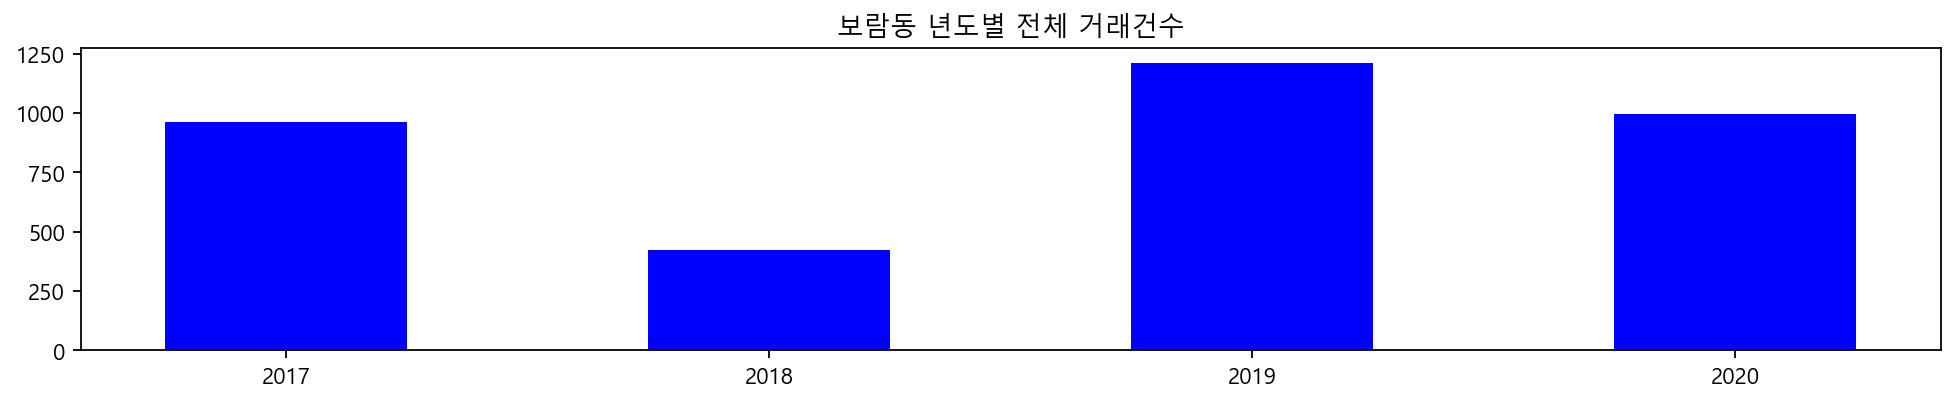

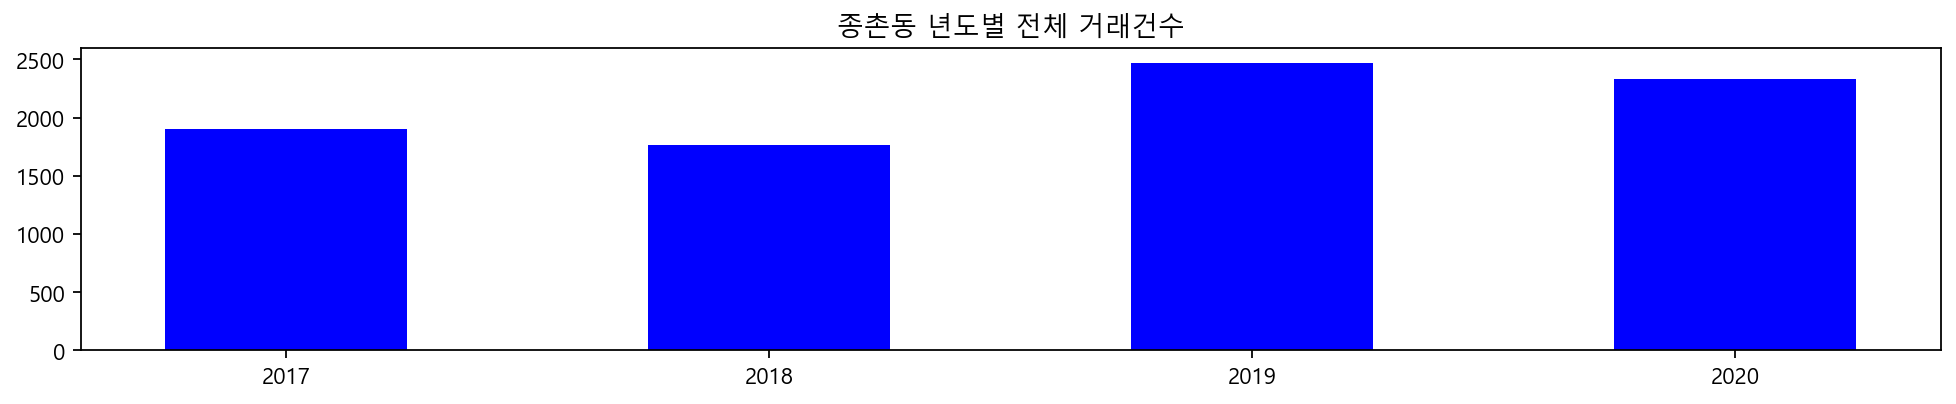

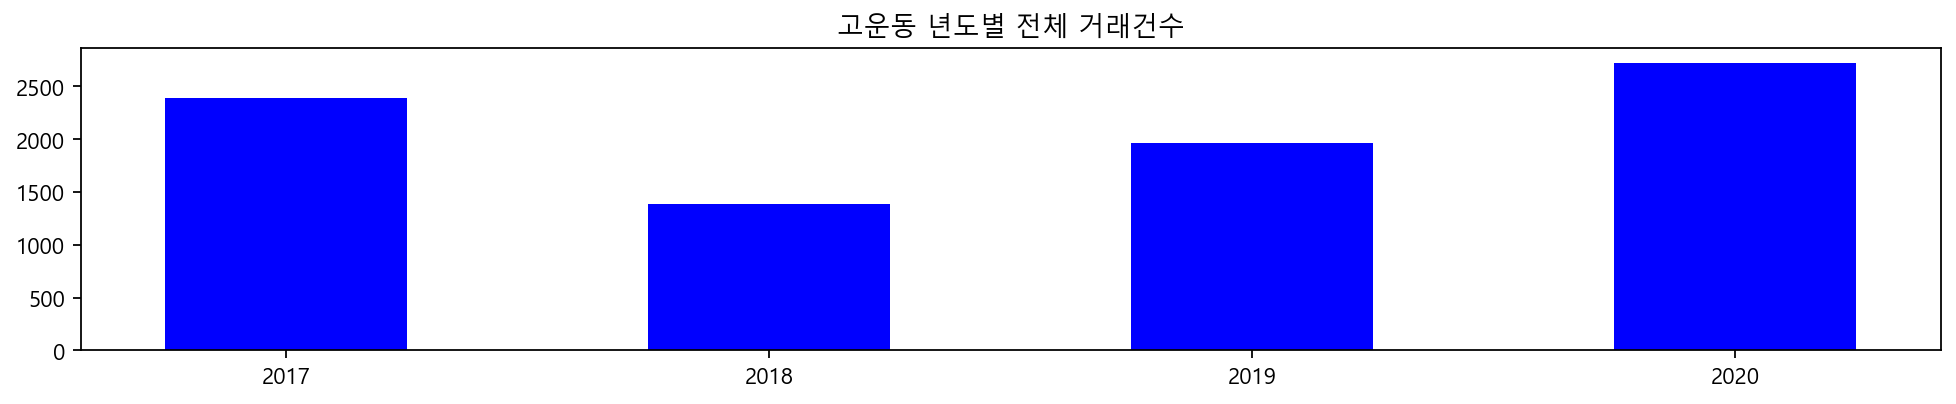

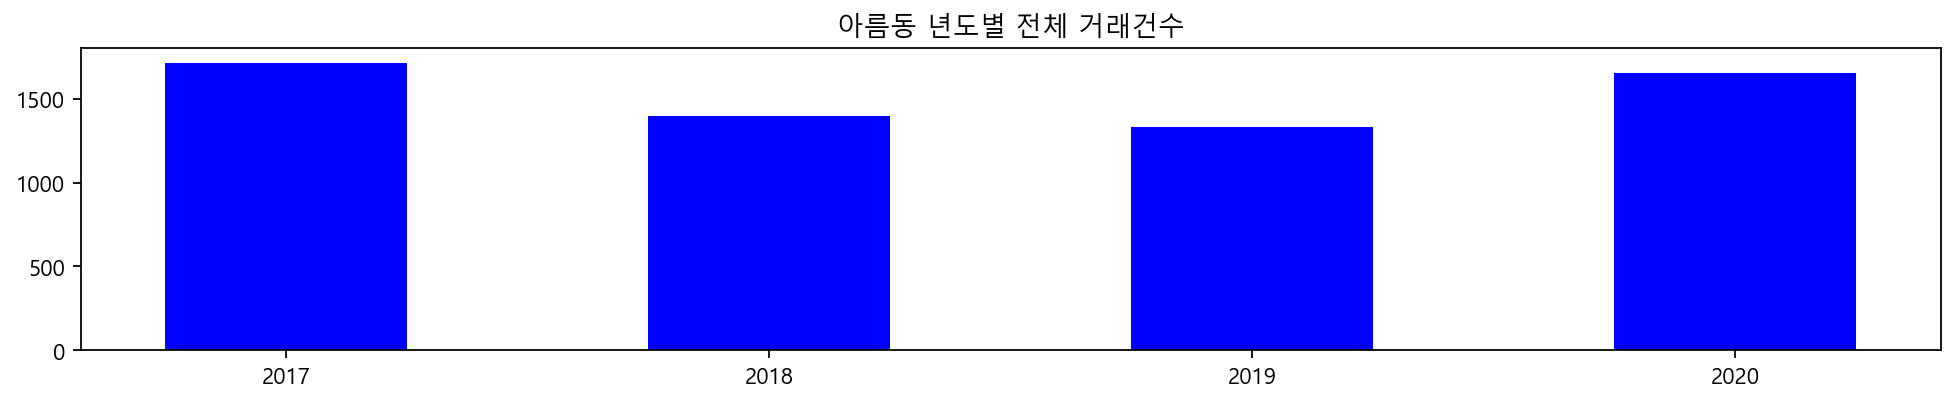

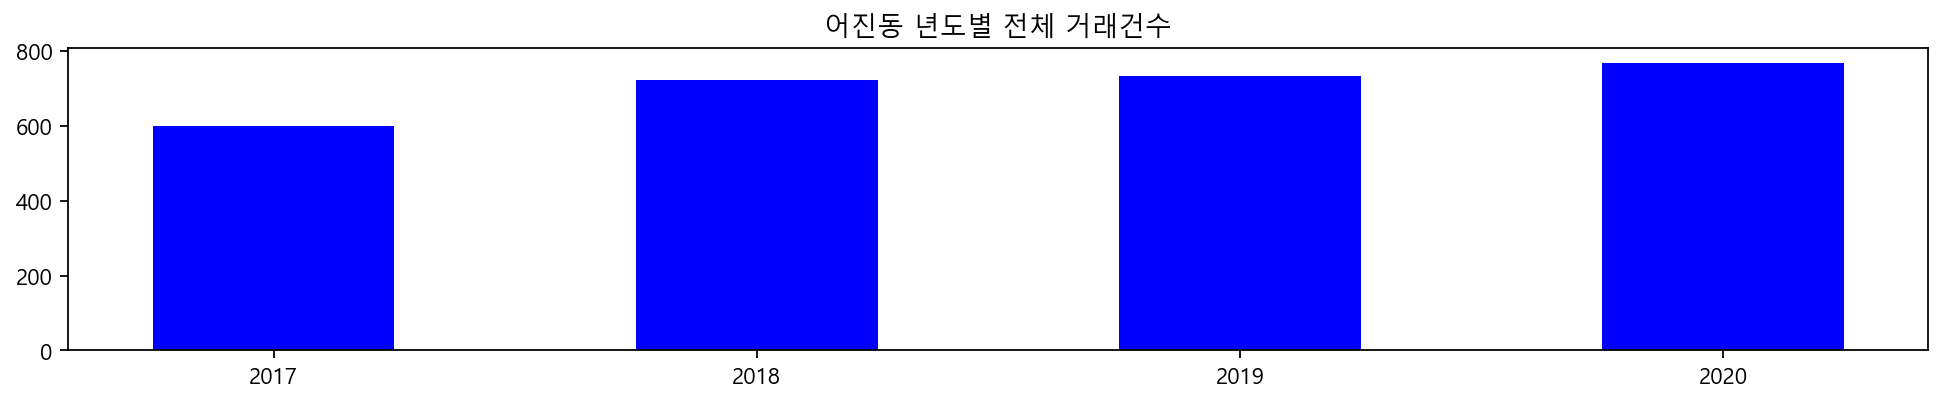

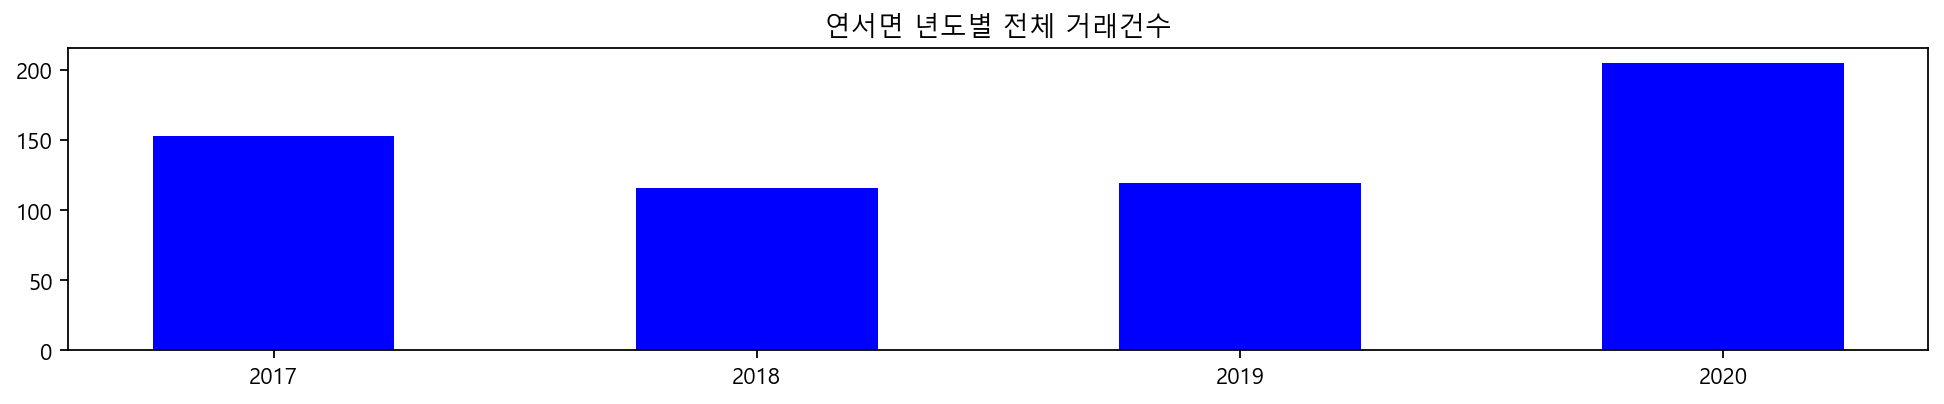

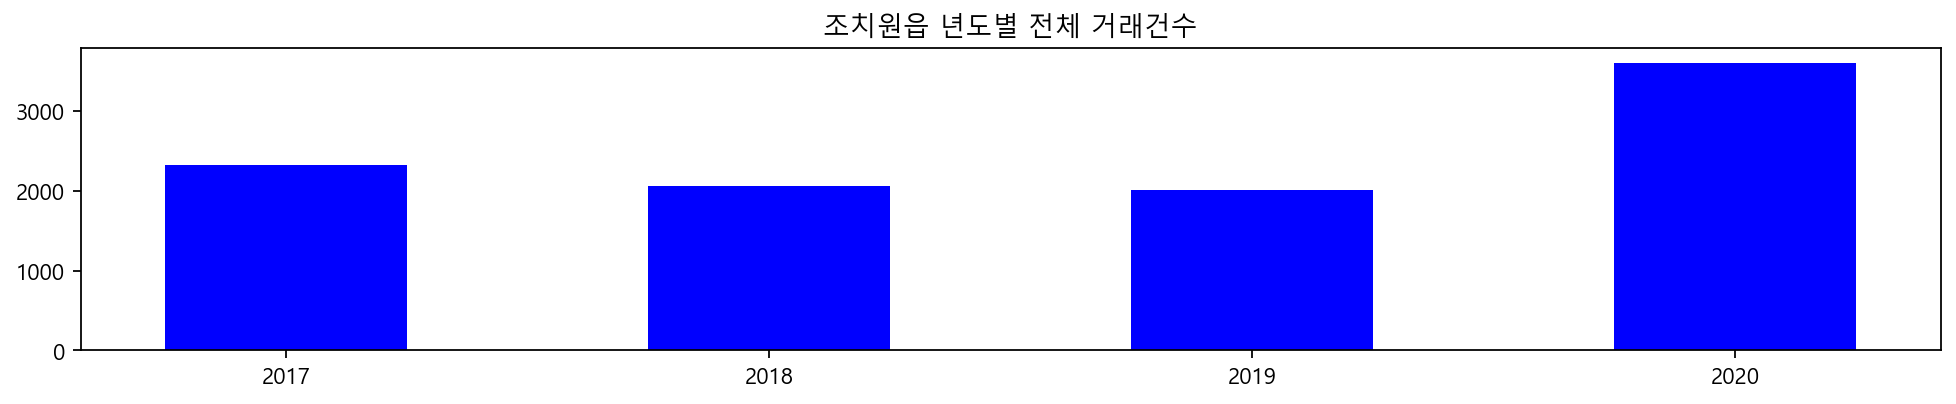

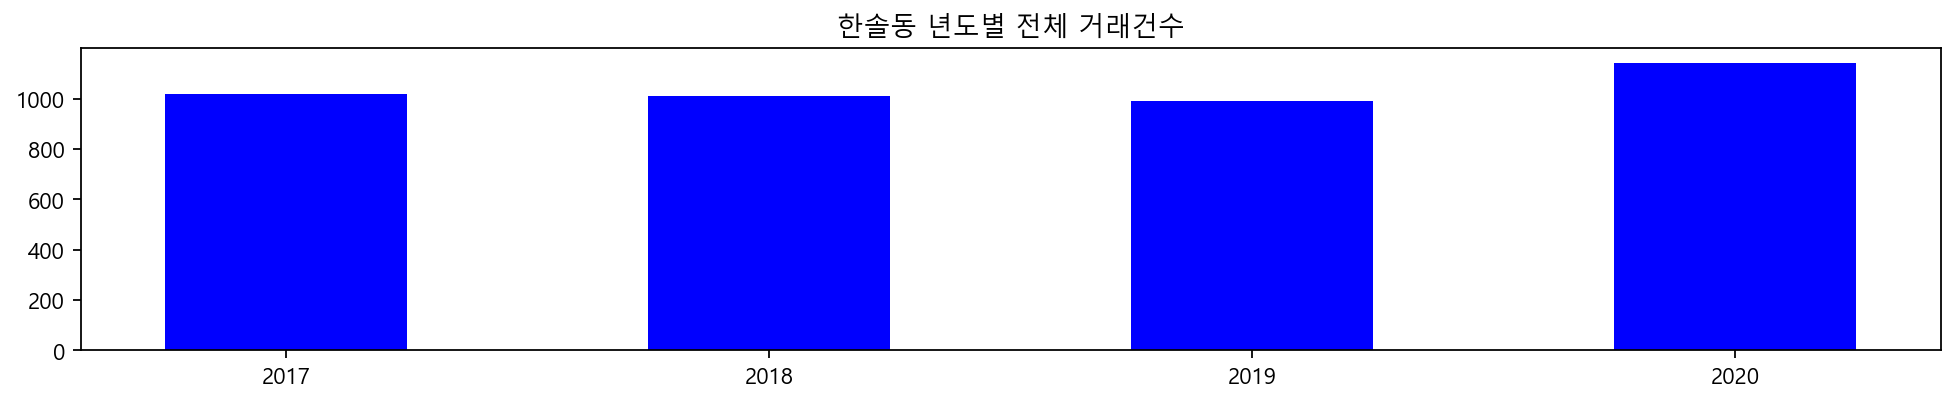

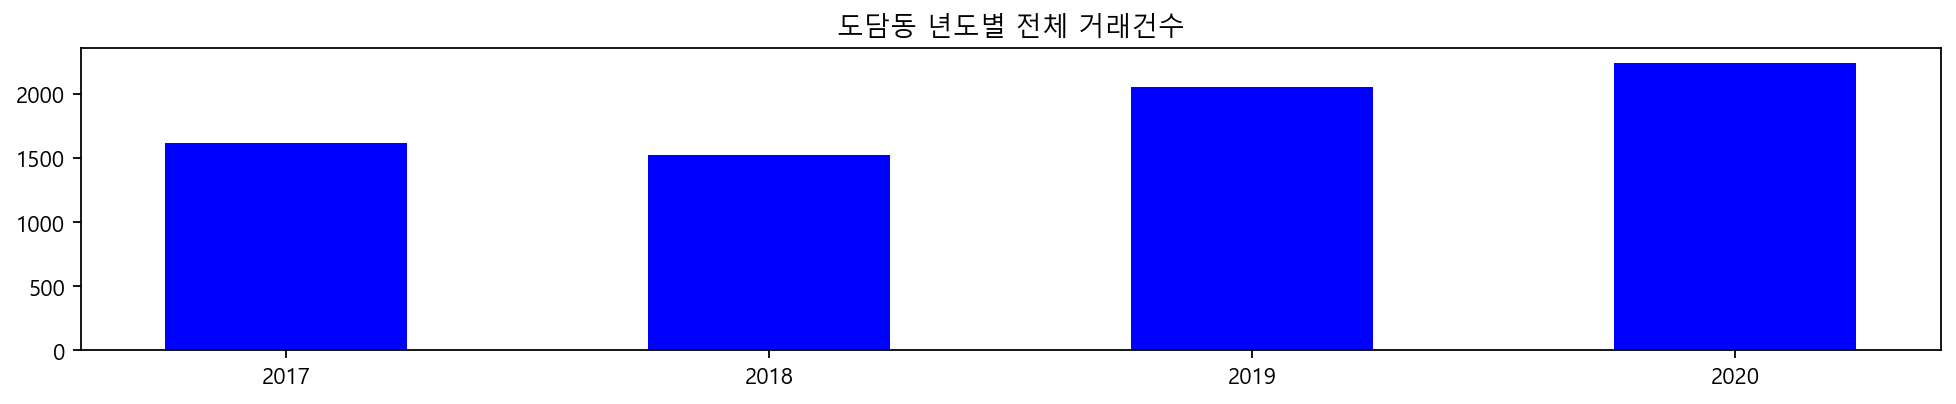

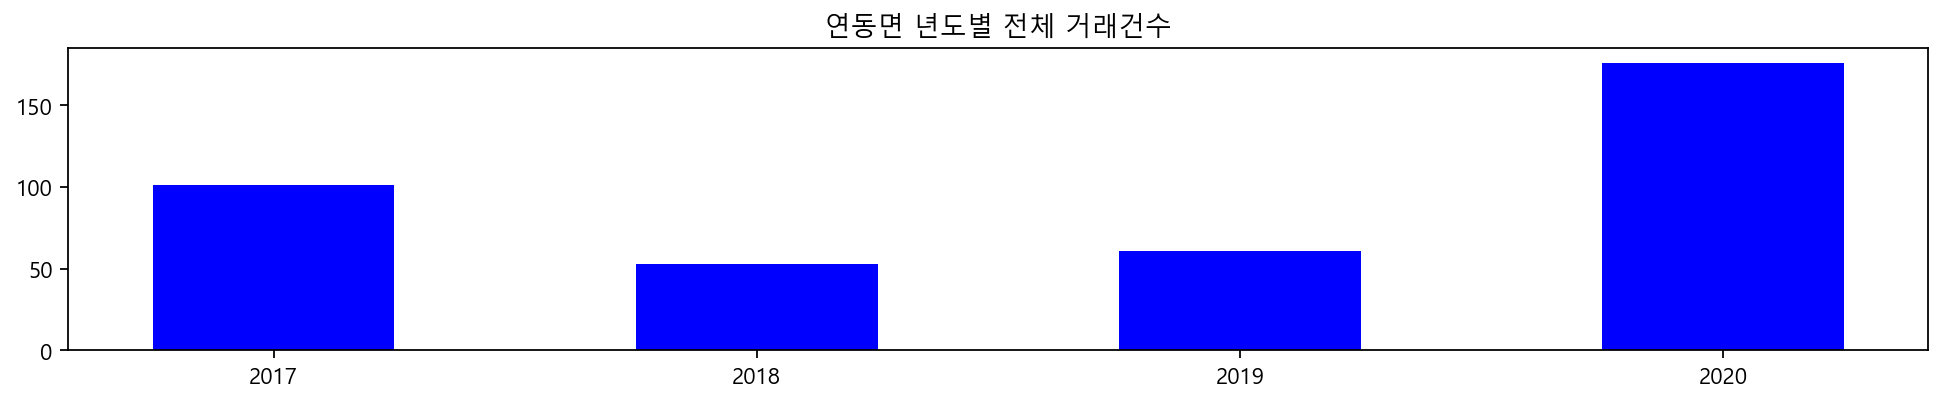

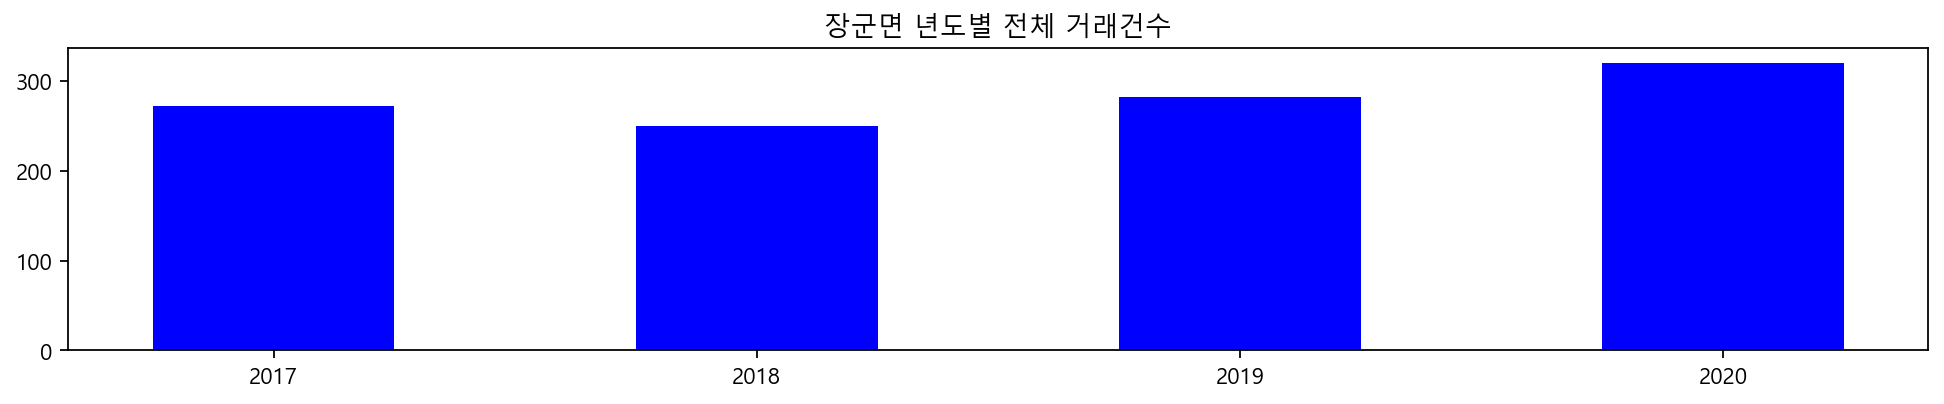

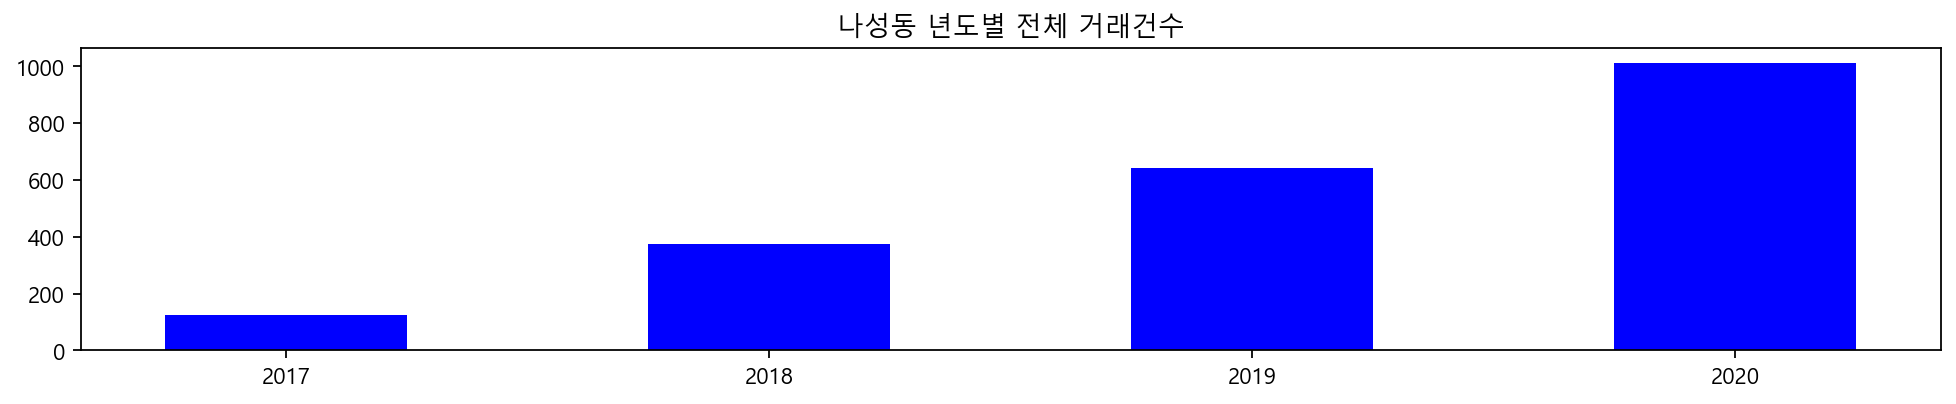

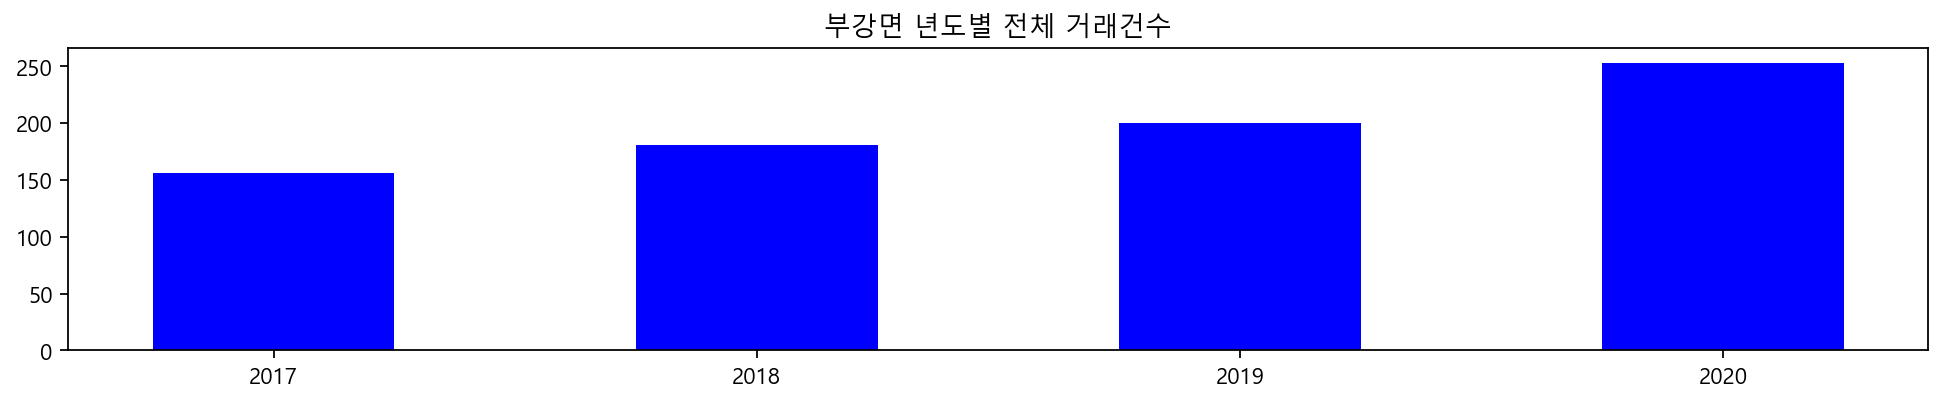

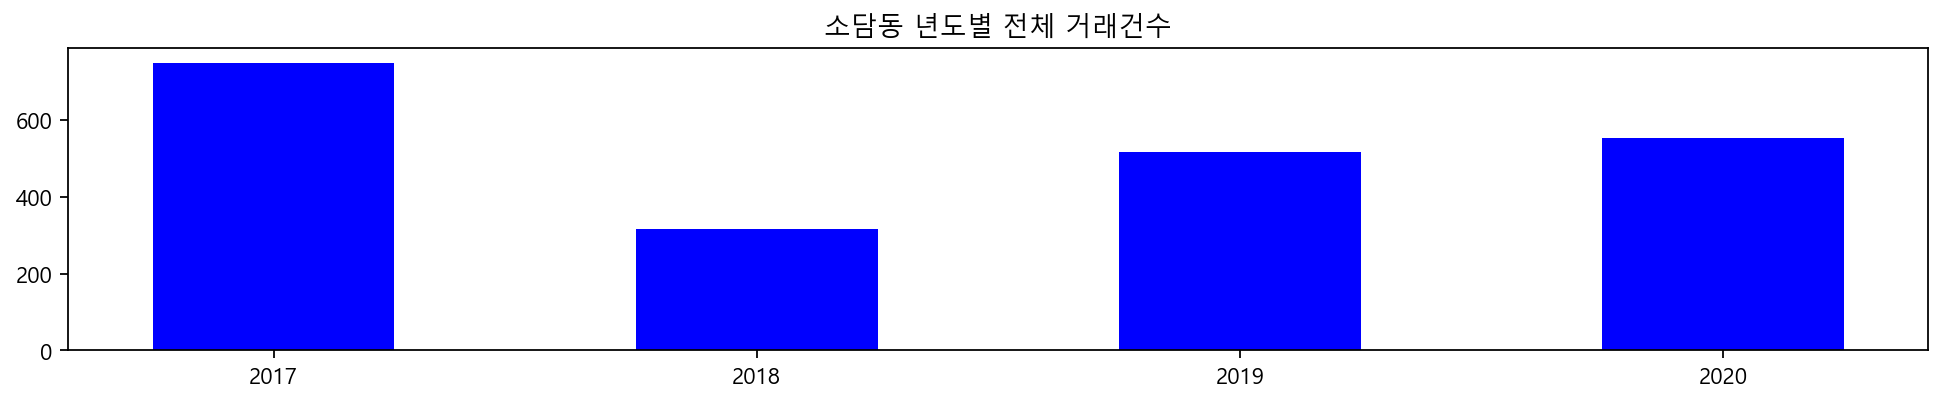

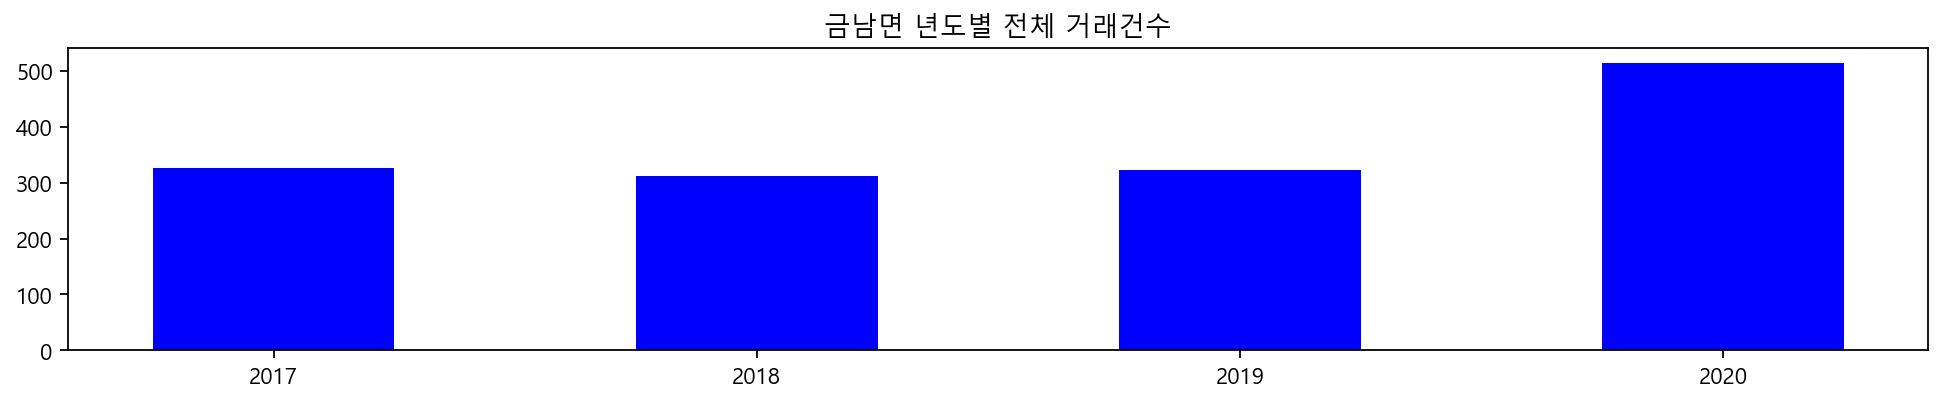

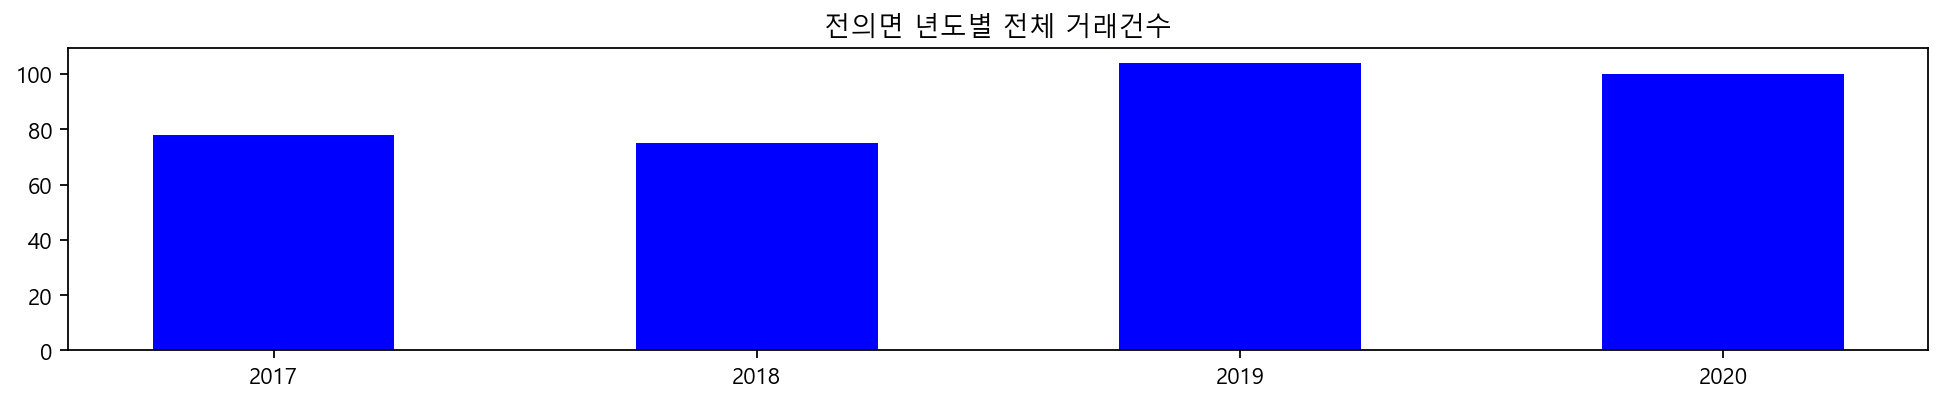

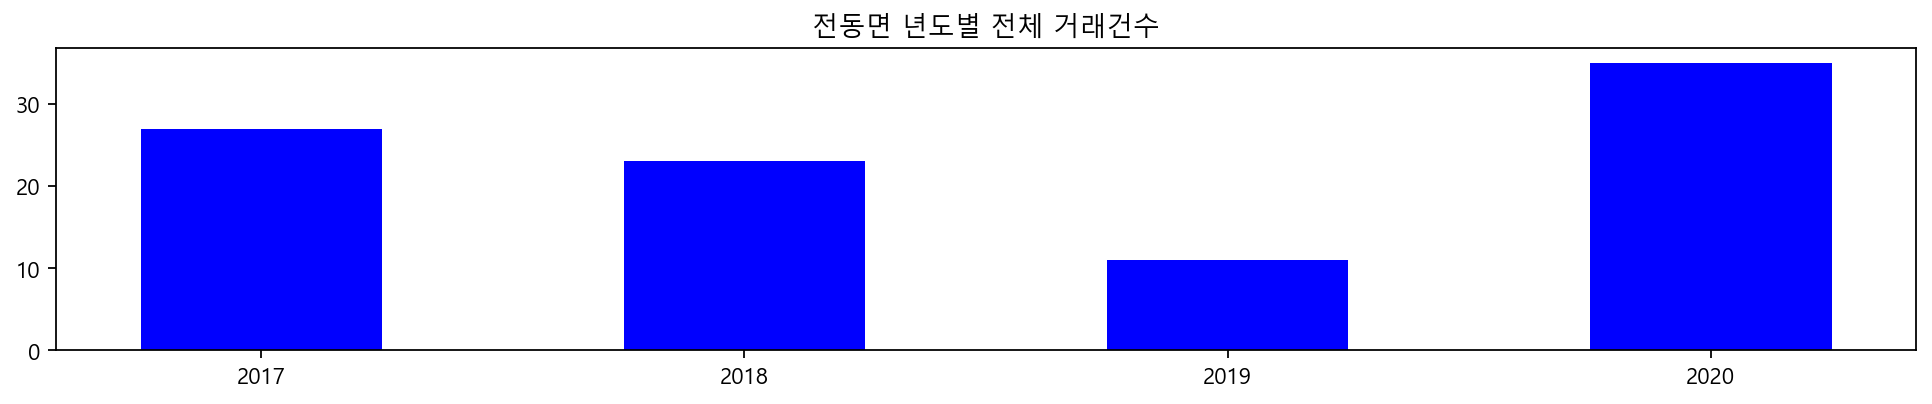

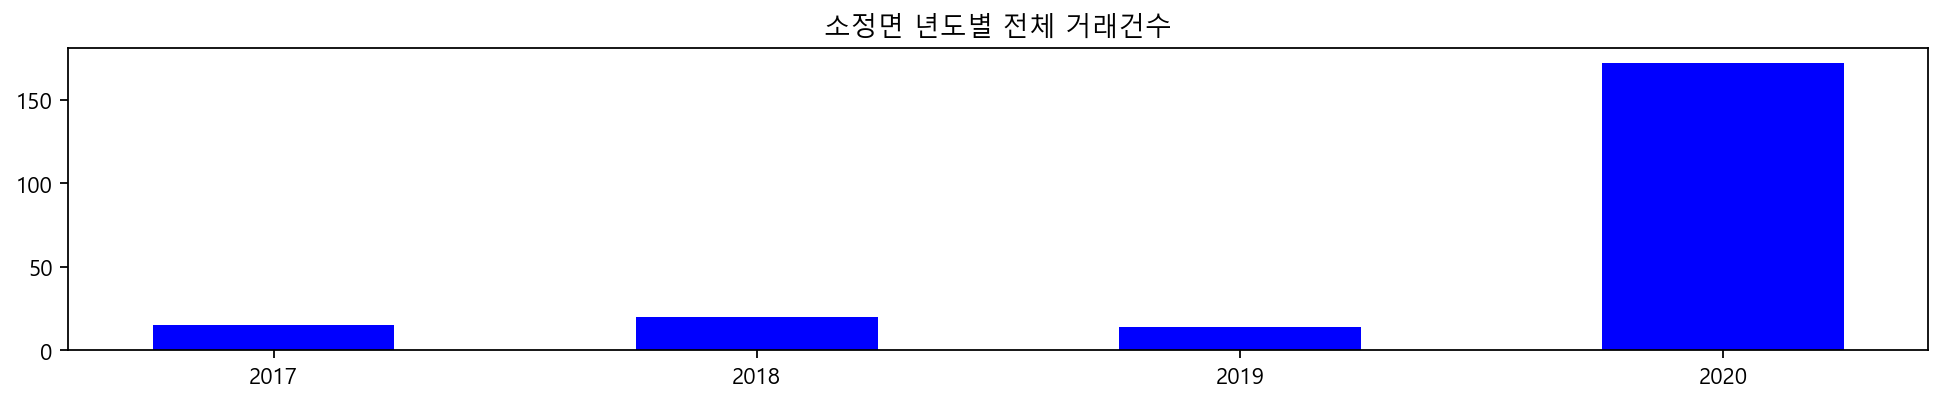

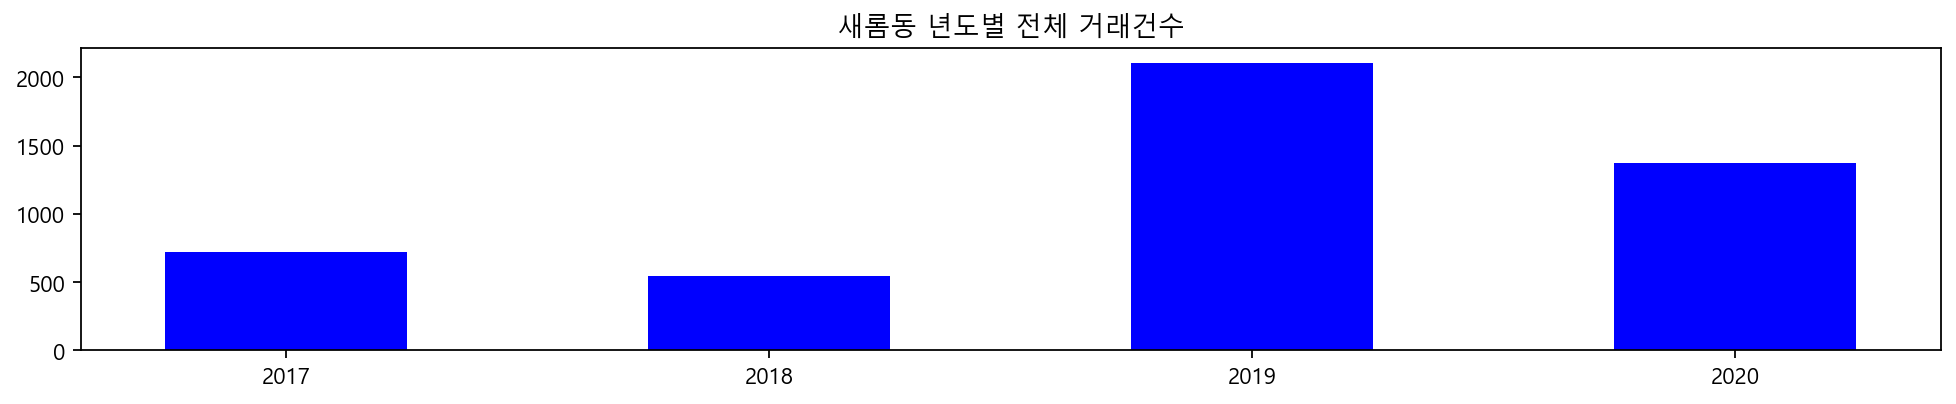

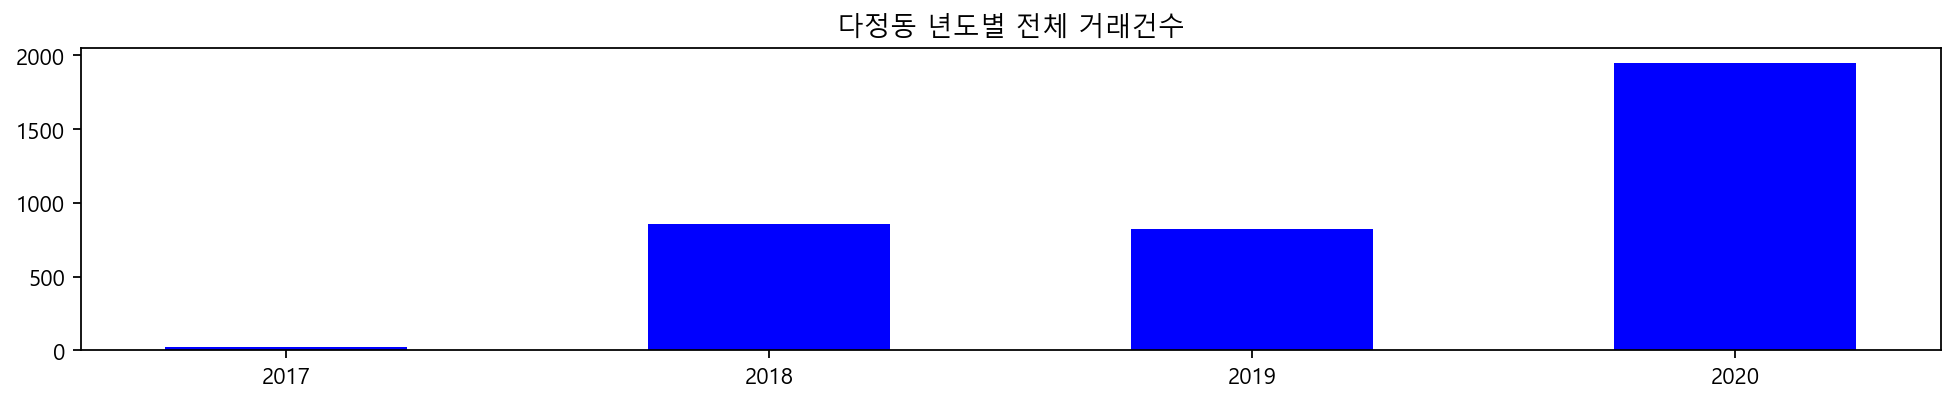

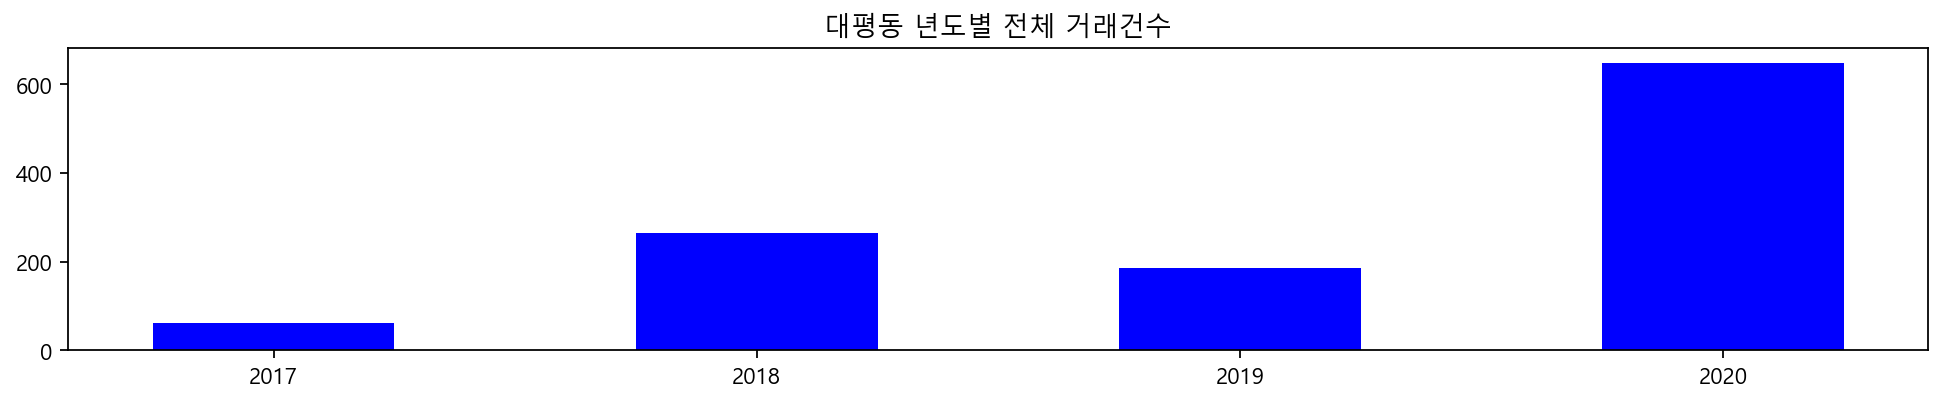

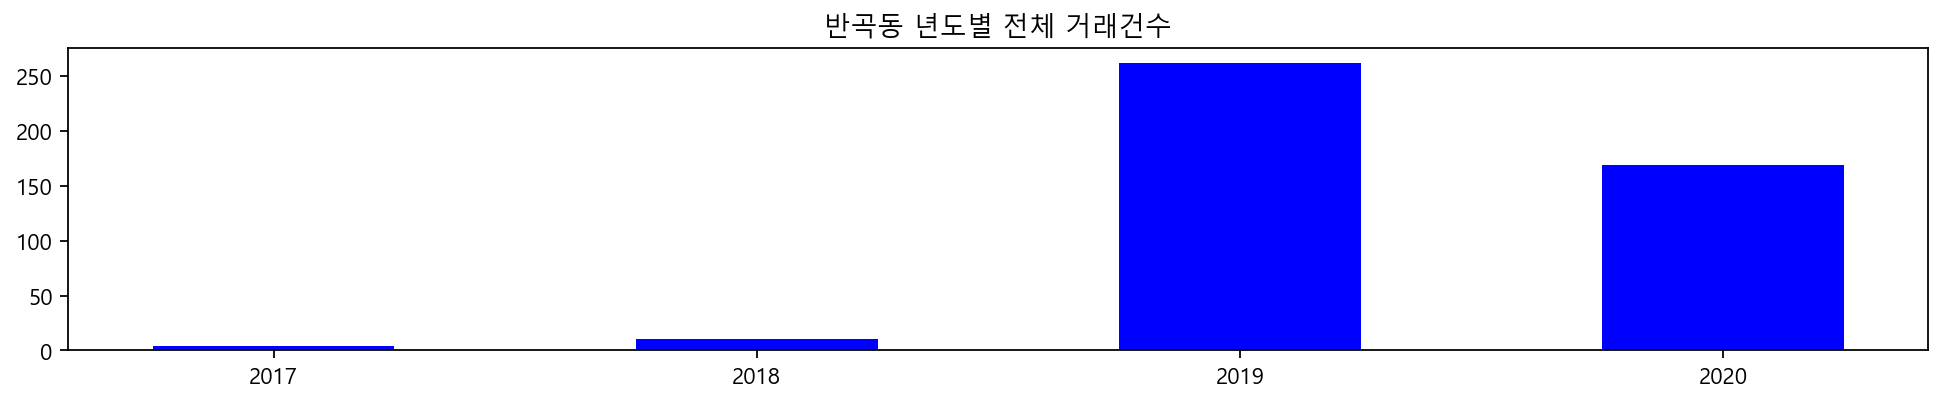

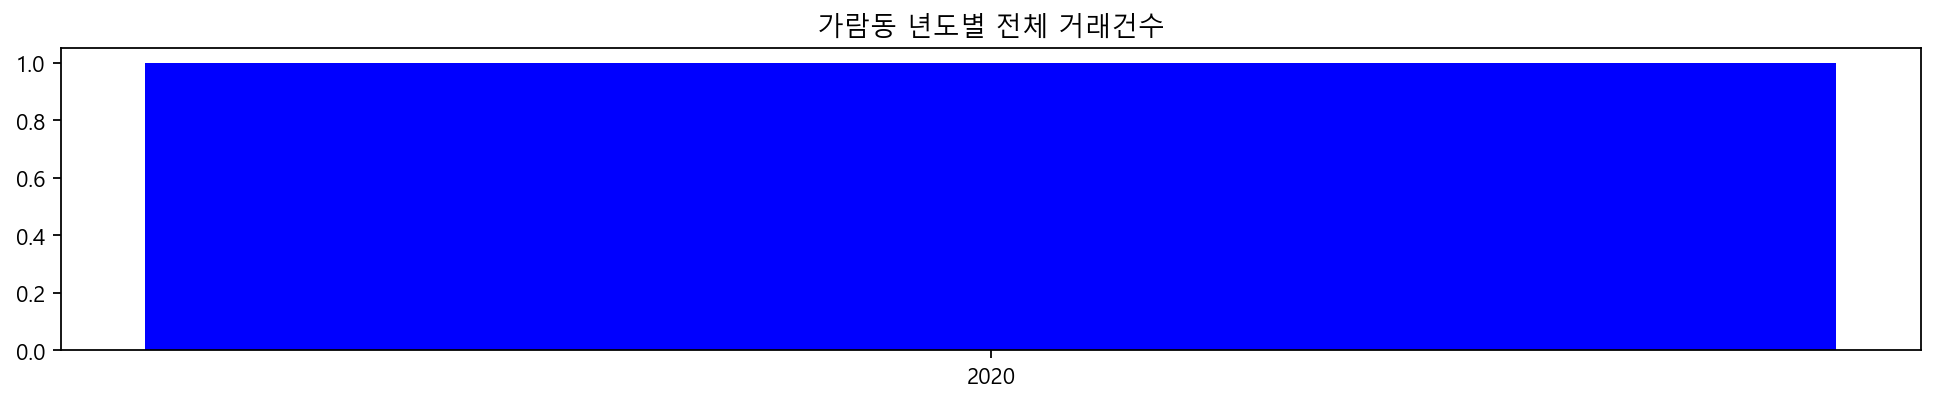

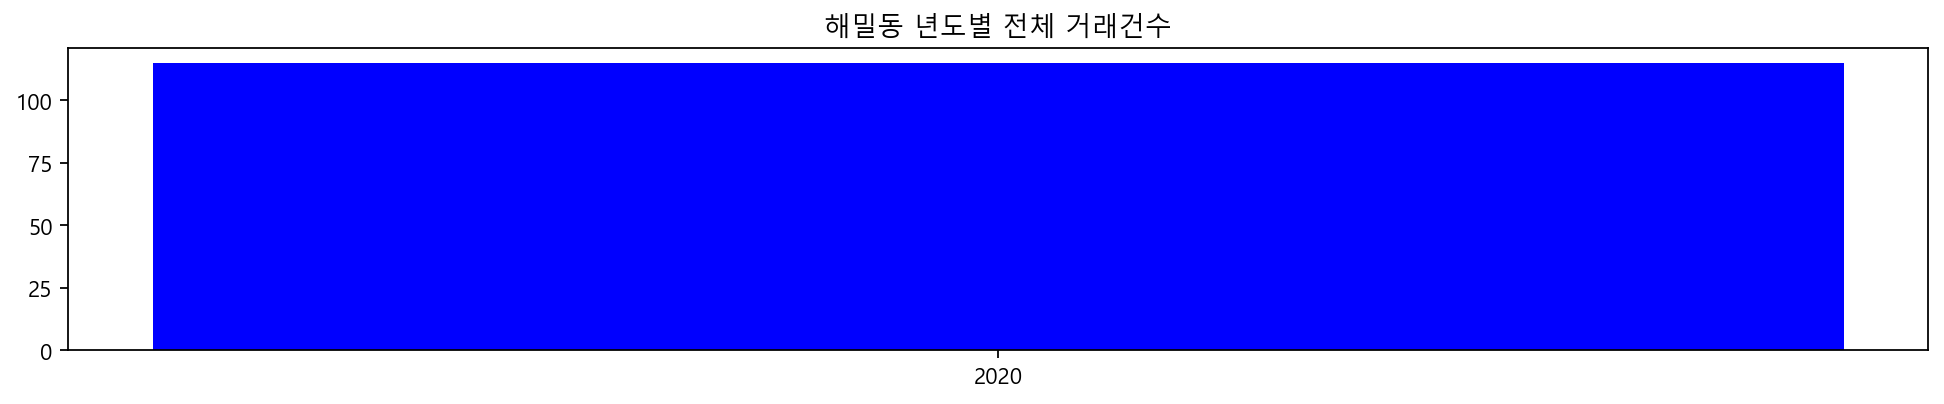

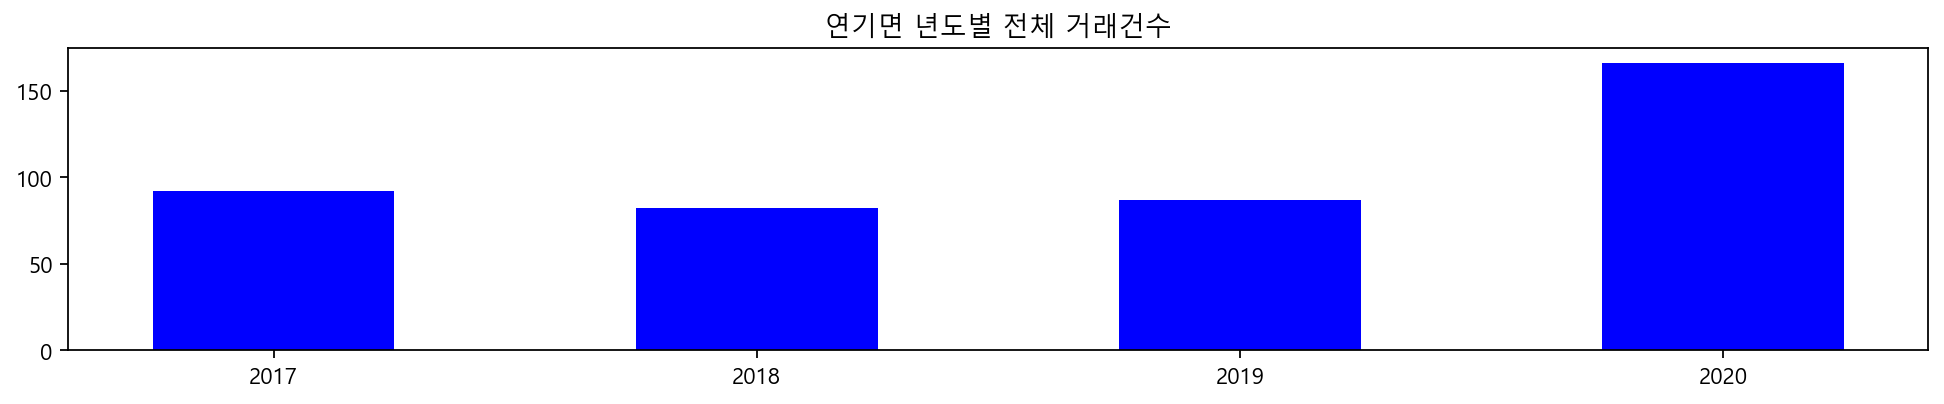

In [23]:
data_all['계약년월']=data_all['계약년월'].astype(str)
data_all['계약년']=data_all['계약년월'].apply(year)
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data_all[data_all['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    #group_new=group_new.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+' 년도별 전체 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [24]:
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
dong_all

['보람동',
 '종촌동',
 '고운동',
 '아름동',
 '어진동',
 '연서면',
 '조치원읍',
 '한솔동',
 '도담동',
 '연동면',
 '장군면',
 '나성동',
 '부강면',
 '소담동',
 '금남면',
 '전의면',
 '전동면',
 '소정면',
 '새롬동',
 '다정동',
 '대평동',
 '반곡동',
 '가람동',
 '해밀동',
 '연기면']